# Setup

In [2]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Run experiments

In [285]:
base_exp_info = {
    'EXPERIMENT_NAME': 'conf_matrix_feat_exp_72',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
#         'Acc',
#         'DemPar',
#         'EqOpp',
        'TPR_Z0',
        'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
        'FPR_Z0',
        'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
    ],
    
    # Expert demo parameters
    'DATASET': 'COMPAS',
    'TARGET_DATASET': 'Adult',
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 10_000,
    'MIN_FREQ_FILL_PCT': .01,
    # IRL Loop parameters
    'N_TRIALS': 50,
    'IRL_METHOD': None,
    'EPSILON': .02,
    'IGNORE_RESULTS_EPSILON': .03,
    'MAX_ITER': 20,
    'METHOD': 'highs',
    'IRL_ERROR_ENCOURAGE_SMALL_WEIGHTS': True,
    'IRL_ERROR_ENCOURAGE_LARGE_WEIGHTS': False,
    'ALLOW_NEG_WEIGHTS': True,
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
        'HardtDemParNoisy',
        'HardtEqOppNoisy',
#             'Dummy',
#         'DummyNoisy',
    ],
}

In [286]:
experiments = [
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
    },
]

In [287]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [288]:
exp_info = dict(base_exp_info)

source_X, source_y, source_feature_types = generate_dataset(
    exp_info['DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)
    
target_X, target_y, target_feature_types = generate_dataset(
    exp_info['TARGET_DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)

for f in source_feature_types['categoric']:
    source_X[f] = source_X[f].astype(str)
    
for f in target_feature_types['categoric']:
    target_X[f] = target_X[f].astype(str)

for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(
        exp_info,
        source_X=source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_72', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 10000, 'MIN_FREQ_FILL_PCT': 0.01, 'N_TRIALS': 50, 'IRL_METHOD': 'FairIRL', 'EPSILON': 0.02, 'IGNORE_RESULTS_EPSILON': 0.03, 'MAX_ITER': 20, 'METHOD': 'highs', 'IRL_ERROR_ENCOURAGE_SMALL_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_LARGE_WEIGHTS': False, 'ALLOW_NEG_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAccNoisy', 'HardtDemParNoisy', 'HardtEqOppNoisy']}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.73015873 0.30434783 0.45368171 0.21491228]
 [0.75       0.3220339  0.46564885 0.15254237]
 [0.70246085 0.5030303  0.49643705 0.3       ]]
INFO:root:muE_hold:
[[0.63297872 0.31313131 0.46606335 0.2558139

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.730,0.304,0.454,0.215,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.750,0.322,0.466,0.153,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.702,0.503,0.496,0.300,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.702,0.305,0.457,0.143,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.658,0.606,0.486,0.524,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.402,0.398,0.314,0.254,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.992,0.999,0.999,0,1.000,0.992,0.992,0.992,0.996,0.996,0.999,0.992,0.992,0.999,0.989,0.989,0.473,1.000,0.996,0.0,3.0,0.734,0.050,0.187,0.029,0.298,0.368,0.0,0.0
7,0.697,0.394,0.439,0.216,0,0.697,0.679,0.679,0.394,0.415,0.415,0.439,0.447,0.447,0.216,0.214,0.214,0.620,0.736,0.736,0.0,4.0,0.431,0.158,-0.361,-0.049,0.031,0.040,0.0,0.0
8,0.690,0.395,0.434,0.217,0,0.697,0.660,0.679,0.394,0.415,0.415,0.439,0.435,0.447,0.216,0.214,0.214,0.620,0.736,0.736,0.0,5.0,0.358,0.213,-0.367,-0.063,0.030,0.045,0.0,0.0
9,0.692,0.992,0.435,0.999,0,0.697,0.660,0.679,0.394,0.996,0.415,0.439,0.440,0.447,0.216,0.989,0.214,0.620,0.736,0.736,0.0,6.0,0.466,0.118,-0.408,0.008,0.031,0.027,0.0,0.0


INFO:root:muE_target:
[[0.375      0.47368421 0.07142857 0.13149847]
 [0.27777778 0.45762712 0.12962963 0.11078717]
 [0.31578947 0.49456522 0.04761905 0.13230769]]
INFO:root:target domain muL = [0.082 0.579 0.032 0.901]
INFO:root:target domain muE = [0.323 0.475 0.083 0.125]
INFO:root:target domain muL_hold = [0.052 0.592 0.02  0.878]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.68988764 0.41875    0.45909091 0.24454148]
 [0.65315315 0.42941176 0.41826923 0.2295082 ]
 [0.62197802 0.35465116 0.42650602 0.15584416]]
INFO:root:muE_hold:
[[0.62719298 0.32926829 0.45320197 0.19354839]
 [0.68686869 0.35555556 0.48165138 0.29770992]
 [0.58371041 0.375      0.39823009 0.20588235]]
INFO:root:muE_perf_hold:
[[0.59026688 0.69747483 0.66548994]
 [0.58869702 0.75254525 0.71919192]
 [0.58869702 0.69967032 0.69133073]]
INFO:root:muL:
[[0.71361502 0.40116279 0.42459397 0.27586207]
 [0.58088235 0.5480226  0.41007194 0.46718147]
 [0.66336634 0.6746988  0.4676259  0.63138686]]
INFO:root:	IRL Loop iteration 1/

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.690,0.419,0.459,0.245,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.653,0.429,0.418,0.230,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.622,0.355,0.427,0.156,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.714,0.401,0.425,0.276,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.581,0.548,0.410,0.467,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.663,0.675,0.468,0.631,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.278,0.414,0.538,0.195,0,0.278,0.301,0.301,0.414,0.412,0.412,0.538,0.510,0.510,0.195,0.221,0.221,0.469,0.896,0.890,0.0,3.0,-0.221,0.164,0.322,-0.292,0.175,0.150,0.0,0.0
7,0.998,0.434,0.999,0.206,0,0.278,0.998,0.301,0.414,0.404,0.412,0.538,0.997,0.510,0.195,0.216,0.221,0.469,0.896,0.890,0.0,4.0,0.125,0.309,0.130,-0.437,0.088,0.082,0.0,0.0
8,0.716,0.416,0.451,0.199,0,0.716,0.682,0.682,0.416,0.388,0.388,0.451,0.484,0.484,0.199,0.202,0.202,0.608,0.698,0.707,0.0,5.0,0.070,0.345,-0.112,-0.474,0.015,0.033,0.0,0.0


INFO:root:muE_target:
[[0.22727273 0.42245989 0.07692308 0.15408805]
 [0.35294118 0.48913043 0.10909091 0.11904762]
 [0.2173913  0.4260355  0.14925373 0.14156627]]
INFO:root:target domain muL = [0.226 0.48  0.07  0.134]
INFO:root:target domain muE = [0.266 0.446 0.112 0.138]
INFO:root:target domain muL_hold = [0.079 0.43  0.041 0.119]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.69069767 0.42767296 0.48165138 0.21686747]
 [0.7239819  0.37837838 0.53398058 0.2       ]
 [0.68171021 0.41624365 0.44278607 0.18181818]]
INFO:root:muE_hold:
[[0.7219917  0.35632184 0.49519231 0.17821782]
 [0.63755459 0.34042553 0.41176471 0.22727273]
 [0.76442308 0.35227273 0.52884615 0.30075188]]
INFO:root:muE_perf_hold:
[[0.62166405 0.71584609 0.68827205]
 [0.60125589 0.68941041 0.63904116]
 [0.59654631 0.68184389 0.59746503]]
INFO:root:muL:
[[0.64395604 0.35849057 0.40487805 0.17721519]
 [0.60544218 0.57228916 0.41474654 0.41818182]
 [0.4452381  0.37804878 0.32387707 0.24015748]]
INFO:root:	IRL Loop iteration 1/

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.691,0.428,0.482,0.217,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.724,0.378,0.534,0.200,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.682,0.416,0.443,0.182,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.644,0.358,0.405,0.177,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.605,0.572,0.415,0.418,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.445,0.378,0.324,0.240,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.418,1.000,0.220,0,0.998,0.994,0.994,0.418,0.413,0.413,1.000,0.995,0.995,0.220,0.218,0.218,0.553,0.309,0.419,0.0,3.0,0.312,0.241,0.271,-0.175,0.330,0.327,0.0,0.0
7,0.647,0.996,0.422,0.997,0,0.647,0.637,0.637,0.996,1.000,1.000,0.422,0.403,0.403,0.997,0.988,0.988,0.563,0.532,0.637,0.0,4.0,0.539,0.107,-0.333,0.022,0.115,0.132,0.0,0.0
8,0.664,0.401,0.445,0.212,0,0.664,0.668,0.668,0.401,0.401,0.401,0.445,0.406,0.406,0.212,0.212,0.212,0.628,0.752,0.733,0.0,5.0,0.214,0.368,-0.139,-0.279,0.019,0.046,0.0,0.0


INFO:root:muE_target:
[[0.22222222 0.41847826 0.22       0.13235294]
 [0.14285714 0.48780488 0.01754386 0.12944984]
 [0.38888889 0.43975904 0.03389831 0.14655172]]
INFO:root:target domain muL = [0.351 0.447 0.169 0.137]
INFO:root:target domain muE = [0.251 0.449 0.09  0.136]
INFO:root:target domain muL_hold = [0.301 0.422 0.084 0.116]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.66445916 0.41509434 0.43675418 0.218107  ]
 [0.6442953  0.28735632 0.39518072 0.1512605 ]
 [0.70804598 0.35294118 0.4784689  0.184     ]]
INFO:root:muE_hold:
[[0.60434783 0.50632911 0.34841629 0.40186916]
 [0.64251208 0.43023256 0.40807175 0.19008264]
 [0.67727273 0.25       0.44390244 0.16935484]]
INFO:root:muE_perf_hold:
[[0.61067504 0.91353742 0.85134838]
 [0.61695447 0.74119762 0.75193798]
 [0.61067504 0.63811321 0.57727273]]
INFO:root:muL:
[[0.71557562 0.44311377 0.46495327 0.24215247]
 [0.665      0.59893048 0.5        0.56578947]
 [0.6882793  0.7        0.49545455 0.588     ]]
INFO:root:	IRL Loop iteration 1/

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.664,0.415,0.437,0.218,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.644,0.287,0.395,0.151,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.353,0.478,0.184,1,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.716,0.443,0.465,0.242,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.665,0.599,0.500,0.566,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.688,0.700,0.495,0.588,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.524,1.000,1.000,0.0,3.0,-0.354,-0.257,-0.182,-0.207,0.521,0.512,0.0,0.0
7,0.285,0.340,0.534,0.170,0,0.285,0.275,0.275,0.34,0.285,0.285,0.534,0.521,0.521,0.17,0.148,0.148,0.452,0.808,0.991,0.0,4.0,-0.094,0.150,0.262,-0.494,0.077,0.123,0.0,0.0
8,0.996,0.340,0.999,0.170,0,0.285,0.997,0.275,0.34,0.285,0.285,0.534,0.997,0.521,0.17,0.148,0.148,0.452,0.808,0.991,0.0,5.0,0.084,0.172,0.062,-0.682,0.048,0.114,0.0,0.0
9,0.712,0.340,0.467,0.170,0,0.712,0.723,0.723,0.34,0.285,0.285,0.467,0.476,0.476,0.17,0.148,0.148,0.621,0.605,0.562,0.0,6.0,0.116,0.222,-0.094,-0.568,0.017,0.105,0.0,0.0


INFO:root:muE_target:
[[0.18181818 0.50909091 0.05555556 0.11711712]
 [0.15       0.4516129  0.19642857 0.15757576]
 [0.21052632 0.52380952 0.12698413 0.14369501]]
INFO:root:target domain muL = [0.148 0.472 0.063 0.127]
INFO:root:target domain muE = [0.181 0.495 0.126 0.139]
INFO:root:target domain muL_hold = [0.142 0.457 0.042 0.142]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.70071259 0.28804348 0.46682464 0.12550607]
 [0.76019185 0.28481013 0.49333333 0.1686747 ]
 [0.63537118 0.29381443 0.40463918 0.18454936]]
INFO:root:muE_hold:
[[0.65350877 0.35365854 0.42718447 0.19008264]
 [0.61440678 0.31707317 0.41588785 0.21904762]
 [0.62037037 0.47761194 0.45089286 0.19230769]]
INFO:root:muE_perf_hold:
[[0.62323391 0.7340696  0.72892597]
 [0.59497645 0.76515746 0.73181067]
 [0.6122449  0.81510152 0.91127695]]
INFO:root:muL:
[[0.67766497 0.30808081 0.4829932  0.11403509]
 [0.68599034 0.73033708 0.46357616 0.61111111]
 [0.45011601 0.42045455 0.35853659 0.27868852]]
INFO:root:	IRL Loop iteration 1/

INFO:root:

TRIAL 5

INFO:root:muE:
[[0.71264368 0.32183908 0.45995423 0.15789474]
 [0.69438202 0.23626374 0.41645885 0.11788618]
 [0.68444444 0.48076923 0.42857143 0.30708661]]
INFO:root:muE_hold:
[[0.59903382 0.37037037 0.38961039 0.16101695]
 [0.57560976 0.66216216 0.37810945 0.26751592]
 [0.625      0.36781609 0.33492823 0.16541353]]
INFO:root:muE_perf_hold:
[[0.61381476 0.69232005 0.67257112]
 [0.63422292 0.82027168 0.9195122 ]
 [0.63736264 0.68452147 0.60300619]]
INFO:root:muL:
[[0.68809524 0.44117647 0.48470588 0.26422764]
 [0.60470588 0.54891304 0.42890443 0.52466368]
 [0.54712644 0.53448276 0.40189125 0.40174672]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.662 0.    0.428 0.   ]
INFO:root:		 Best mu_delta[0] 	= [0.036 0.346 0.007 0.194]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.078  0.467 -0.049  0.198]
INFO:root:		 t[0] 		= 0.02529
INFO:root:		 t_hold[i] 	= 0.06040
INFO:root:		 weights[0] 	= [ 0.307 -0.031 -0.623 -0.04 ]
INFO:root:	IRL Loop iteration 2/20

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.713,0.322,0.460,0.158,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.694,0.236,0.416,0.118,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.481,0.429,0.307,1,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.688,0.441,0.485,0.264,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.605,0.549,0.429,0.525,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.547,0.534,0.402,0.402,0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.662,0.000,0.428,0.000,0,0.662,0.677,0.677,0.000,0.000,0.00,0.428,0.417,0.417,0.000,0.000,0.000,0.629,0.455,0.323,0.0,3.0,0.307,-0.031,-0.623,-0.040,0.025,0.060,0.0,0.0
7,0.662,0.492,0.430,0.282,0,0.662,0.677,0.677,0.492,0.550,0.55,0.430,0.417,0.417,0.282,0.230,0.230,0.649,0.804,0.872,0.0,4.0,0.297,0.135,-0.396,-0.172,0.050,0.060,0.0,0.0
8,0.662,0.502,0.430,0.709,0,0.662,0.677,0.677,0.492,0.409,0.55,0.430,0.417,0.417,0.282,0.748,0.230,0.649,0.804,0.872,0.0,5.0,0.545,-0.064,-0.280,0.112,0.037,0.072,0.0,0.0
9,0.658,0.000,0.428,0.000,0,0.662,0.674,0.677,0.492,0.000,0.55,0.430,0.417,0.417,0.282,0.000,0.230,0.649,0.804,0.872,0.0,6.0,0.679,-0.000,-0.320,-0.000,0.031,0.070,0.0,0.0


INFO:root:muE_target:
[[0.35714286 0.47802198 0.15942029 0.22018349]
 [0.1        0.4939759  0.01538462 0.14662757]
 [0.0952381  0.36315789 0.08196721 0.14420063]]
INFO:root:target domain muL = [0.327 0.424 0.113 0.107]
INFO:root:target domain muE = [0.184 0.445 0.086 0.17 ]
INFO:root:target domain muL_hold = [0.229 0.398 0.116 0.098]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.59770115 0.175      0.4187643  0.11983471]
 [0.63118812 0.4010989  0.4142539  0.17991632]
 [0.7283105  0.35403727 0.43691589 0.17479675]]
INFO:root:muE_hold:
[[0.63555556 0.45652174 0.43414634 0.31304348]
 [0.55607477 0.27058824 0.35746606 0.16239316]
 [0.7038835  0.44554455 0.51470588 0.34920635]]
INFO:root:muE_perf_hold:
[[0.59183673 0.82492978 0.81256039]
 [0.58712716 0.79288722 0.76833425]
 [0.57613815 0.75588267 0.69215611]]
INFO:root:muL:
[[0.67102397 0.44654088 0.44607843 0.23404255]
 [0.65562914 0.65068493 0.43596059 0.484375  ]
 [0.62669683 0.69189189 0.41927711 0.59360731]]
INFO:root:	IRL Loop iteration 1/

INFO:root:		 weights[19] 	= [ 0.268  0.059 -0.269 -0.404]
INFO:root:
Reached max iters.
INFO:root:
Trial 6 did not converge.

INFO:root:

TRIAL 7

INFO:root:muE:
[[0.68493151 0.36931818 0.44096386 0.16326531]
 [0.76528117 0.37967914 0.46330275 0.16115702]
 [0.67085954 0.52439024 0.43529412 0.29468599]]
INFO:root:muE_hold:
[[0.58943089 0.29166667 0.37745098 0.13043478]
 [0.68949772 0.33333333 0.47524752 0.13636364]
 [0.64935065 0.24390244 0.42307692 0.1637931 ]]
INFO:root:muE_perf_hold:
[[0.61695447 0.69918004 0.70223577]
 [0.62480377 0.61237574 0.62002609]
 [0.6043956  0.65482847 0.59888079]]
INFO:root:muL:
[[0.66746411 0.37423313 0.39099526 0.17054264]
 [0.67272727 0.63387978 0.46386946 0.53030303]
 [0.43779904 0.42222222 0.30681818 0.28251121]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.995 0.378 0.998 0.18 ]
INFO:root:		 Best mu_delta[0] 	= [-0.288  0.047 -0.551  0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.353 -0.135 -0.568 -0.074]
INFO:root:		 t[0] 		= 0.4

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.685,0.369,0.441,0.163,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.765,0.380,0.463,0.161,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.671,0.524,0.435,0.295,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.667,0.374,0.391,0.171,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.673,0.634,0.464,0.530,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.438,0.422,0.307,0.283,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.995,0.378,0.998,0.180,0,0.995,0.996,0.996,0.378,0.424,0.424,0.998,0.993,0.993,0.180,0.218,0.218,0.566,0.305,0.429,0.0,3.0,0.113,0.240,0.392,-0.254,0.407,0.427,0.0,0.0
7,0.685,0.383,0.433,0.183,0,0.685,0.654,0.654,0.383,0.424,0.424,0.433,0.453,0.453,0.183,0.215,0.215,0.616,0.738,0.771,0.0,4.0,0.251,0.318,-0.130,-0.301,0.031,0.092,0.0,0.0
8,0.317,0.389,0.573,0.186,0,0.685,0.349,0.654,0.383,0.429,0.424,0.433,0.549,0.453,0.183,0.220,0.215,0.616,0.738,0.771,0.0,5.0,-0.113,0.402,0.075,-0.410,0.033,0.104,0.0,0.0
9,0.687,0.359,0.430,0.177,0,0.317,0.658,0.349,0.389,0.416,0.429,0.573,0.454,0.549,0.186,0.218,0.220,0.474,0.860,0.921,0.0,6.0,0.002,0.449,-0.001,-0.548,0.028,0.098,0.0,0.0


INFO:root:muE_target:
[[0.21428571 0.4822335  0.10606061 0.1047619 ]
 [0.26086957 0.41717791 0.14       0.12078652]
 [0.         0.42780749 0.09230769 0.15286624]]
INFO:root:target domain muL = [0.226 0.459 0.055 0.142]
INFO:root:target domain muE = [0.158 0.442 0.113 0.126]
INFO:root:target domain muL_hold = [0.157 0.441 0.062 0.129]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.74056604 0.34659091 0.54394299 0.19762846]
 [0.64377682 0.44025157 0.38557214 0.30364372]
 [0.67191011 0.36645963 0.44868735 0.18145161]]
INFO:root:muE_hold:
[[0.72139303 0.43529412 0.41991342 0.25833333]
 [0.61682243 0.39361702 0.37383178 0.15652174]
 [0.63111111 0.29347826 0.36787565 0.1023622 ]]
INFO:root:muE_perf_hold:
[[0.62480377 0.75531843 0.71390108]
 [0.63736264 0.75670751 0.74666932]
 [0.63265306 0.65567718 0.66188406]]
INFO:root:muL:
[[0.55530474 0.38554217 0.38625592 0.21304348]
 [0.56839623 0.59770115 0.4182243  0.44255319]
 [0.61609195 0.65116279 0.41513761 0.54587156]]
INFO:root:	IRL Loop iteration 1/

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.741,0.347,0.544,0.198,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.644,0.440,0.386,0.304,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.672,0.366,0.449,0.181,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.555,0.386,0.386,0.213,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.568,0.598,0.418,0.443,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.616,0.651,0.415,0.546,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.662,0.607,0.417,0.805,0,0.662,0.673,0.673,0.607,0.627,0.627,0.417,0.403,0.403,0.805,0.843,0.843,0.544,0.788,0.954,0.0,3.0,0.733,-0.171,-0.086,0.010,0.056,0.060,0.0,0.0
7,0.688,0.389,0.442,0.193,0,0.688,0.694,0.694,0.389,0.369,0.369,0.442,0.433,0.433,0.193,0.155,0.155,0.634,0.683,0.675,0.0,4.0,0.778,0.003,-0.082,-0.137,0.007,0.037,0.0,0.0


INFO:root:muE_target:
[[0.11764706 0.45762712 0.14285714 0.11280488]
 [0.23529412 0.51176471 0.02040816 0.17134831]
 [0.13636364 0.51497006 0.15942029 0.15315315]]
INFO:root:target domain muL = [0.304 0.477 0.074 0.161]
INFO:root:target domain muE = [0.163 0.495 0.108 0.146]
INFO:root:target domain muL_hold = [0.27  0.447 0.094 0.128]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.69164882 0.3715847  0.43980344 0.18894009]
 [0.75235849 0.40462428 0.5282167  0.18376068]
 [0.78341014 0.28977273 0.48019802 0.15444015]]
INFO:root:muE_hold:
[[0.69950739 0.42682927 0.45258621 0.19166667]
 [0.57142857 0.43023256 0.4028436  0.20325203]
 [0.67256637 0.32876712 0.4        0.14634146]]
INFO:root:muE_perf_hold:
[[0.62951334 0.67511096 0.67361528]
 [0.60753532 0.79431427 0.84037081]
 [0.64521193 0.68877551 0.66062553]]
INFO:root:muL:
[[0.69230769 0.42384106 0.43325527 0.22834646]
 [0.66193853 0.56097561 0.48130841 0.49593496]
 [0.57957245 0.60843373 0.41882353 0.57429719]]
INFO:root:	IRL Loop iteration 1/

INFO:root:		 weights[19] 	= [ 0.097  0.164 -0.162 -0.577]
INFO:root:
Reached max iters.
INFO:root:
Trial 9 did not converge.

INFO:root:

TRIAL 10

INFO:root:muE:
[[0.60706402 0.46625767 0.38630807 0.20080321]
 [0.67425968 0.3030303  0.44755245 0.14107884]
 [0.68215159 0.39267016 0.40855107 0.13492063]]
INFO:root:muE_hold:
[[0.62068966 0.32876712 0.46724891 0.12621359]
 [0.61363636 0.225      0.37850467 0.05691057]
 [0.69527897 0.375      0.51724138 0.19008264]]
INFO:root:muE_perf_hold:
[[0.5855573  0.67495317 0.68068021]
 [0.63736264 0.70165263 0.74090909]
 [0.61381476 0.66276416 0.71759657]]
INFO:root:muL:
[[0.71201814 0.44692737 0.39853301 0.30603448]
 [0.6875     0.62285714 0.48498845 0.56540084]
 [0.61483254 0.56830601 0.44019139 0.53719008]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0. 0. 0. 0.]
INFO:root:		 Best mu_delta[0] 	= [0.654 0.387 0.414 0.159]
INFO:root:		 Best mu_delta_hold[i] 	= [0.643 0.31  0.454 0.124]
INFO:root:		 t[0] 		= 0.44355
INFO:root:		 t

INFO:root:muE_hold:
[[0.73584906 0.4691358  0.48803828 0.19259259]
 [0.6779661  0.29411765 0.45502646 0.09090909]
 [0.65454545 0.39130435 0.39810427 0.22807018]]
INFO:root:muE_perf_hold:
[[0.62951334 0.74510645 0.80875844]
 [0.60910518 0.64514983 0.65852443]
 [0.6122449  0.80213097 0.77766798]]
INFO:root:muL:
[[0.61318681 0.29746835 0.39328537 0.18614719]
 [0.55252101 0.55974843 0.36318408 0.50892857]
 [0.61662818 0.59731544 0.43792325 0.55084746]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.998 0.35  0.998 0.134]
INFO:root:		 Best mu_delta[0] 	= [-0.303  0.115 -0.565  0.078]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.309  0.156 -0.543  0.042]
INFO:root:		 t[0] 		= 0.14882
INFO:root:		 t_hold[i] 	= 0.16309
INFO:root:		 weights[0] 	= [ 0.208  0.411  0.037 -0.344]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.713 0.333 0.432 0.13 ]
INFO:root:		 Best mu_delta[1] 	= [-0.018  0.132  0.001  0.082]
INFO:root:		 Be

INFO:root:muL:
[[0.67014614 0.33757962 0.45363409 0.17256637]
 [0.63919822 0.60130719 0.4549763  0.4978903 ]
 [0.65555556 0.71518987 0.43942993 0.52586207]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.701 0.395 0.419 0.207]
INFO:root:		 Best mu_delta[0] 	= [-0.01   0.008 -0.008  0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.08   0.029 -0.034  0.027]
INFO:root:		 t[0] 		= 0.00851
INFO:root:		 t_hold[i] 	= 0.04240
INFO:root:		 weights[0] 	= [ 0.223  0.088 -0.581 -0.108]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.471
INFO:root:best weight:	 [ 0.223  0.088 -0.581 -0.108]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.680,0.301,0.369,0.173,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.674,0.380,0.420,0.209,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.719,0.528,0.444,0.293,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.670,0.338,0.454,0.173,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.639,0.601,0.455,0.498,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.656,0.715,0.439,0.526,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.701,0.395,0.419,0.207,0,0.701,0.709,0.709,0.395,0.392,0.392,0.419,0.497,0.497,0.207,0.196,0.196,0.616,0.673,0.683,0.0,3.0,0.223,0.088,-0.581,-0.108,0.009,0.042,0.0,0.0


INFO:root:muE_target:
[[0.16666667 0.36315789 0.12962963 0.13636364]
 [0.27777778 0.4076087  0.11538462 0.16568047]
 [0.26666667 0.42222222 0.0952381  0.13213213]]
INFO:root:target domain muL = [0.333 0.41  0.083 0.146]
INFO:root:target domain muE = [0.237 0.398 0.113 0.145]
INFO:root:target domain muL_hold = [0.274 0.453 0.098 0.124]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.56167401 0.43452381 0.34352941 0.19823789]
 [0.70697674 0.52317881 0.5033557  0.25203252]
 [0.62247191 0.40106952 0.3817734  0.2       ]]
INFO:root:muE_hold:
[[0.63876652 0.33333333 0.42253521 0.23770492]
 [0.69444444 0.40229885 0.41584158 0.21969697]
 [0.73755656 0.26851852 0.525      0.14814815]]
INFO:root:muE_perf_hold:
[[0.59497645 0.75380711 0.69861968]
 [0.62951334 0.77439864 0.71024904]
 [0.59497645 0.57175376 0.53096196]]
INFO:root:muL:
[[0.68333333 0.32450331 0.45747126 0.15686275]
 [0.65239295 0.61375661 0.43778802 0.52697095]
 [0.36533958 0.33908046 0.25480769 0.26229508]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Trial 13 did not converge.

INFO:root:

TRIAL 14

INFO:root:muE:
[[0.66896552 0.46835443 0.47477064 0.26938776]
 [0.66297118 0.30177515 0.44495413 0.14220183]
 [0.70794393 0.39204545 0.43062201 0.21912351]]
INFO:root:muE_hold:
[[0.48743719 0.26086957 0.33333333 0.08264463]
 [0.5862069  0.47058824 0.35616438 0.22033898]
 [0.61722488 0.25581395 0.44052863 0.22608696]]
INFO:root:muE_perf_hold:
[[0.59497645 0.72087873 0.73907581]
 [0.60910518 0.87502086 0.94903651]
 [0.57456829 0.71855174 0.63858907]]
INFO:root:muL:
[[0.69138756 0.40782123 0.44938272 0.2046332 ]
 [0.66894977 0.62011173 0.44059406 0.5       ]
 [0.70982143 0.71929825 0.50255102 0.596     ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.296 0.68  0.536 0.835]
INFO:root:		 Best mu_delta[0] 	= [ 0.384 -0.293 -0.086 -0.624]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.239 -0.321 -0.166 -0.651]
INFO:root:		 t[0] 		= 0.35601
INFO:root:		 t_hold[i] 	= 0.36435
INFO

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.669,0.468,0.475,0.269,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.663,0.302,0.445,0.142,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.392,0.431,0.219,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.691,0.408,0.449,0.205,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.669,0.620,0.441,0.500,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.710,0.719,0.503,0.596,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.296,0.680,0.536,0.835,0,0.296,0.325,0.325,0.680,0.650,0.650,0.536,0.542,0.542,0.835,0.828,0.828,0.385,0.681,0.675,0.0,3.0,-0.192,-0.309,0.281,0.218,0.356,0.364,0.0,0.0
7,0.999,0.670,0.995,0.828,0,0.296,0.997,0.325,0.680,0.634,0.650,0.536,0.994,0.542,0.835,0.819,0.828,0.385,0.681,0.675,0.0,4.0,0.155,-0.295,0.381,0.169,0.285,0.305,0.0,0.0
8,0.296,0.316,0.534,0.158,0,0.296,0.325,0.325,0.316,0.341,0.341,0.534,0.542,0.542,0.158,0.169,0.169,0.467,0.804,0.984,0.0,5.0,-0.181,0.266,0.271,-0.282,0.152,0.123,0.0,0.0
9,0.711,0.316,0.467,0.158,0,0.711,0.680,0.680,0.316,0.341,0.341,0.467,0.453,0.453,0.158,0.169,0.169,0.617,0.676,0.662,0.0,6.0,0.196,0.292,-0.149,-0.363,0.055,0.049,0.0,0.0


INFO:root:muE_target:
[[0.11764706 0.52380952 0.08333333 0.1037464 ]
 [0.18181818 0.40331492 0.0862069  0.10876133]
 [0.25       0.41558442 0.03333333 0.14005602]]
INFO:root:target domain muL = [0.322 0.469 0.152 0.138]
INFO:root:target domain muE = [0.183 0.448 0.068 0.118]
INFO:root:target domain muL_hold = [0.339 0.434 0.132 0.133]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.69690265 0.34705882 0.48550725 0.1302521 ]
 [0.69584245 0.45       0.4247191  0.25862069]
 [0.63549161 0.27173913 0.46793349 0.11952191]]
INFO:root:muE_hold:
[[0.62385321 0.36458333 0.43269231 0.2173913 ]
 [0.56       0.37362637 0.39647577 0.31932773]
 [0.63111111 0.28915663 0.39       0.17054264]]
INFO:root:muE_perf_hold:
[[0.59654631 0.76566985 0.76615061]
 [0.60282575 0.69656518 0.67071429]
 [0.62480377 0.69225305 0.64155288]]
INFO:root:muL:
[[0.6516129  0.37572254 0.41504854 0.20379147]
 [0.64619165 0.62105263 0.40415704 0.48484848]
 [0.64858491 0.73410405 0.44724771 0.63157895]]
INFO:root:	IRL Loop iteration 1

INFO:root:best weight:	 [ 0.331  0.102 -0.502 -0.064]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.697,0.347,0.486,0.130,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.696,0.450,0.425,0.259,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.635,0.272,0.468,0.120,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.652,0.376,0.415,0.204,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.646,0.621,0.404,0.485,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.649,0.734,0.447,0.632,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.496,0.998,0.251,0,1.000,1.000,1.000,0.496,0.489,0.489,0.998,0.998,0.998,0.251,0.320,0.320,0.535,0.393,0.489,0.0,3.0,0.403,0.034,0.500,-0.063,0.463,0.520,0.0,0.0
7,0.696,0.000,0.456,0.000,0,0.696,0.684,0.684,0.000,0.000,0.000,0.456,0.460,0.460,0.000,0.000,0.000,0.600,0.427,0.316,0.0,4.0,0.532,-0.030,-0.299,-0.139,0.045,0.090,0.0,0.0
8,0.696,0.502,0.456,0.255,0,0.696,0.684,0.684,0.502,0.485,0.485,0.456,0.460,0.460,0.255,0.314,0.314,0.609,0.814,0.801,0.0,5.0,0.167,0.259,-0.118,-0.455,0.097,0.095,0.0,0.0
9,0.000,0.486,0.000,0.244,0,0.696,0.000,0.684,0.502,0.478,0.485,0.456,0.000,0.460,0.255,0.314,0.314,0.609,0.814,0.801,0.0,6.0,-0.543,0.165,-0.095,-0.197,0.052,0.085,0.0,0.0


INFO:root:muE_target:
[[0.5        0.49425287 0.140625   0.15361446]
 [0.25       0.54271357 0.11864407 0.1372549 ]
 [0.25       0.52820513 0.11864407 0.18153846]]
INFO:root:target domain muL = [0.371 0.44  0.126 0.11 ]
INFO:root:target domain muE = [0.333 0.522 0.126 0.157]
INFO:root:target domain muL_hold = [0.279 0.418 0.103 0.117]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.64351852 0.29878049 0.4047619  0.17054264]
 [0.67523364 0.40963855 0.39534884 0.176     ]
 [0.72171946 0.39520958 0.47540984 0.14767932]]
INFO:root:muE_hold:
[[0.59259259 0.42424242 0.31958763 0.28125   ]
 [0.57641921 0.47058824 0.41489362 0.29661017]
 [0.70940171 0.3880597  0.52702703 0.14912281]]
INFO:root:muE_perf_hold:
[[0.61852433 0.88216396 0.84175084]
 [0.58398744 0.87607369 0.89853583]
 [0.61695447 0.65562906 0.72343411]]
INFO:root:muL:
[[0.64975845 0.4969697  0.42630385 0.24896266]
 [0.65594059 0.59411765 0.49452954 0.55652174]
 [0.51981352 0.46405229 0.37045455 0.28033473]]
INFO:root:	IRL Loop iteration 1

INFO:root:best weight:	 [ 0.277  0.016 -0.636 -0.071]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.644,0.299,0.405,0.171,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.675,0.410,0.395,0.176,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.722,0.395,0.475,0.148,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.650,0.497,0.426,0.249,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.656,0.594,0.495,0.557,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.520,0.464,0.370,0.280,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.708,0.000,0.452,0.000,0,0.708,0.683,0.683,0.000,0.000,0.000,0.452,0.480,0.480,0.000,0.000,0.000,0.595,0.412,0.317,0.0,3.0,0.118,-0.403,-0.143,-0.337,0.284,0.343,0.0,0.0
7,0.700,0.467,0.447,0.271,0,0.700,0.675,0.675,0.467,0.463,0.463,0.447,0.478,0.478,0.271,0.247,0.247,0.611,0.757,0.788,0.0,4.0,0.164,0.100,-0.521,-0.215,0.046,0.053,0.0,0.0
8,0.719,0.493,0.460,0.282,0,0.700,0.694,0.675,0.467,0.466,0.463,0.447,0.490,0.478,0.271,0.261,0.247,0.611,0.757,0.788,0.0,5.0,0.150,0.137,-0.432,-0.281,0.062,0.048,0.0,0.0
9,0.710,0.499,0.452,0.287,0,0.700,0.683,0.675,0.467,0.481,0.463,0.447,0.483,0.478,0.271,0.264,0.247,0.611,0.757,0.788,0.0,6.0,0.166,0.144,-0.405,-0.285,0.064,0.047,0.0,0.0


INFO:root:muE_target:
[[0.46153846 0.42076503 0.17647059 0.13414634]
 [0.21052632 0.44099379 0.09333333 0.12759644]
 [0.125      0.53125    0.01785714 0.15987461]]
INFO:root:target domain muL = [0.464 0.424 0.211 0.126]
INFO:root:target domain muE = [0.266 0.464 0.096 0.141]
INFO:root:target domain muL_hold = [0.394 0.446 0.22  0.12 ]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.75       0.38636364 0.46838407 0.21235521]
 [0.71136364 0.5443038  0.43518519 0.27868852]
 [0.678487   0.32446809 0.4824356  0.11489362]]
INFO:root:muE_hold:
[[0.70089286 0.42666667 0.42439024 0.2481203 ]
 [0.76811594 0.34042553 0.50738916 0.19548872]
 [0.66115702 0.30588235 0.41089109 0.21296296]]
INFO:root:muE_perf_hold:
[[0.6389325  0.74373543 0.72577381]
 [0.62480377 0.61648222 0.57230959]
 [0.60596546 0.66356253 0.56587263]]
INFO:root:muL:
[[0.65919283 0.32934132 0.3986014  0.26940639]
 [0.64044944 0.54237288 0.40640394 0.50214592]
 [0.68571429 0.66145833 0.42280285 0.63157895]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE_hold:
[[0.62385321 0.26666667 0.38938053 0.18644068]
 [0.75598086 0.28089888 0.52       0.15107914]
 [0.68240343 0.23684211 0.41148325 0.15966387]]
INFO:root:muE_perf_hold:
[[0.6122449  0.67257154 0.58360856]
 [0.61381476 0.6589671  0.63496586]
 [0.6043956  0.6438914  0.49695053]]
INFO:root:muL:
[[0.63578947 0.31707317 0.37801609 0.17670683]
 [0.67667436 0.56647399 0.45260664 0.51502146]
 [0.67548077 0.63       0.47058824 0.65822785]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.997 0.475 0.995 0.2  ]
INFO:root:		 Best mu_delta[0] 	= [-0.337 -0.061 -0.562 -0.016]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.308 -0.13  -0.557 -0.058]
INFO:root:		 t[0] 		= 0.07497
INFO:root:		 t_hold[i] 	= 0.12064
INFO:root:		 weights[0] 	= [ 0.074  0.495  0.046 -0.384]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.292 0.475 0.525 0.2  ]
INFO:root:		 Best mu_delta[1] 	= [-0.337 -0.061 -0.562 -0.016]
INFO:root:		 Be

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.650,0.412,0.396,0.200,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.688,0.385,0.486,0.184,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.641,0.444,0.415,0.169,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.636,0.317,0.378,0.177,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.677,0.566,0.453,0.515,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.675,0.630,0.471,0.658,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.475,0.995,0.200,0,0.997,0.995,0.995,0.475,0.392,0.392,0.995,0.997,0.997,0.2,0.223,0.223,0.547,0.293,0.396,0.0,3.0,0.074,0.495,0.046,-0.384,0.075,0.121,0.0,0.0
7,0.292,0.475,0.525,0.200,0,0.997,0.292,0.995,0.475,0.392,0.392,0.995,0.540,0.997,0.2,0.223,0.223,0.547,0.293,0.396,0.0,4.0,-0.190,0.478,0.001,-0.330,0.116,0.143,0.0,0.0
8,0.705,0.548,0.471,0.264,0,0.292,0.703,0.292,0.475,0.462,0.392,0.525,0.457,0.540,0.2,0.285,0.223,0.456,0.875,0.901,0.0,5.0,0.109,0.432,-0.163,-0.296,0.091,0.134,0.0,0.0
9,0.705,0.561,0.471,0.271,0,0.292,0.703,0.292,0.475,0.475,0.392,0.525,0.457,0.540,0.2,0.285,0.223,0.456,0.875,0.901,0.0,6.0,0.044,0.255,-0.068,-0.633,0.037,0.077,0.0,0.0


INFO:root:muE_target:
[[0.22222222 0.41573034 0.01754386 0.15044248]
 [0.28571429 0.52688172 0.12676056 0.13694268]
 [0.4375     0.42196532 0.1        0.14912281]]
INFO:root:target domain muL = [1.    0.475 1.    0.149]
INFO:root:target domain muE = [0.315 0.455 0.081 0.146]
INFO:root:target domain muL_hold = [0.86  0.45  0.865 0.123]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.65759637 0.33974359 0.39310345 0.17355372]
 [0.65207373 0.29347826 0.43020595 0.14611872]
 [0.71813725 0.43037975 0.4422658  0.30241935]]
INFO:root:muE_hold:
[[0.61135371 0.49450549 0.41489362 0.27906977]
 [0.71238938 0.27722772 0.465      0.10909091]
 [0.73181818 0.39759036 0.45098039 0.24615385]]
INFO:root:muE_perf_hold:
[[0.6043956  0.88630913 0.91611882]
 [0.62166405 0.602808   0.58464032]
 [0.62637363 0.76716272 0.7516977 ]]
INFO:root:muL:
[[0.64367816 0.39285714 0.4295612  0.30039526]
 [0.63218391 0.625      0.44444444 0.49603175]
 [0.58880779 0.68586387 0.44418052 0.53361345]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.658,0.340,0.393,0.174,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.652,0.293,0.430,0.146,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.718,0.430,0.442,0.302,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.644,0.393,0.430,0.300,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.632,0.625,0.444,0.496,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.589,0.686,0.444,0.534,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.710,0.382,0.442,0.169,0,0.710,0.695,0.695,0.382,0.407,0.407,0.442,0.436,0.436,0.169,0.182,0.182,0.637,0.704,0.712,0.0,3.0,0.546,0.112,-0.012,-0.330,0.035,0.018,0.0,0.0
7,0.710,0.524,0.442,0.759,0,0.710,0.695,0.695,0.382,0.505,0.407,0.442,0.436,0.436,0.169,0.745,0.182,0.637,0.704,0.712,0.0,4.0,0.305,-0.301,-0.235,0.158,0.030,0.015,0.0,0.0
8,0.706,0.476,0.440,0.243,0,0.710,0.693,0.695,0.382,0.487,0.407,0.442,0.436,0.436,0.169,0.257,0.182,0.637,0.704,0.712,0.0,5.0,0.300,0.144,-0.518,-0.038,0.024,0.009,0.0,0.0
9,0.710,0.612,0.442,0.827,0,0.710,0.695,0.695,0.382,0.585,0.407,0.442,0.436,0.436,0.169,0.816,0.182,0.637,0.704,0.712,0.0,6.0,0.268,-0.156,-0.557,0.019,0.024,0.009,0.0,0.0


INFO:root:muE_target:
[[0.19230769 0.41621622 0.01587302 0.13522013]
 [0.45       0.39884393 0.15517241 0.14076246]
 [0.1        0.3699422  0.046875   0.14071856]]
INFO:root:target domain muL = [0.167 0.48  0.086 0.147]
INFO:root:target domain muE = [0.247 0.395 0.073 0.139]
INFO:root:target domain muL_hold = [0.134 0.477 0.099 0.134]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.67523364 0.42352941 0.41763341 0.32653061]
 [0.70344828 0.43274854 0.44851259 0.22510823]
 [0.62557078 0.42541436 0.40298507 0.23412698]]
INFO:root:muE_hold:
[[0.73529412 0.22826087 0.46818182 0.14876033]
 [0.6803653  0.32941176 0.42009132 0.21052632]
 [0.56561086 0.35955056 0.37810945 0.23015873]]
INFO:root:muE_perf_hold:
[[0.61381476 0.69929799 0.60230179]
 [0.62166405 0.71290241 0.65361268]
 [0.58712716 0.86770638 0.85683055]]
INFO:root:muL:
[[0.6494382  0.32163743 0.34803922 0.17721519]
 [0.59545455 0.57432432 0.44866071 0.55555556]
 [0.67431193 0.68152866 0.47285068 0.58849558]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 Best mu_delta_hold[i] 	= [-0.029 -0.014 -0.02   0.022]
INFO:root:		 t[19] 		= 0.02453
INFO:root:		 t_hold[i] 	= 0.02312
INFO:root:		 weights[19] 	= [ 0.385  0.013 -0.587 -0.014]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.652
INFO:root:best weight:	 [ 0.386 -0.007 -0.599  0.008]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.675,0.424,0.418,0.327,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.703,0.433,0.449,0.225,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.626,0.425,0.403,0.234,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.649,0.322,0.348,0.177,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.595,0.574,0.449,0.556,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.674,0.682,0.473,0.588,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.000,0.997,0.000,0,0.997,1.000,1.000,0.000,0.000,0.000,0.997,1.000,1.000,0.000,0.000,0.000,0.526,0.000,0.000,0.0,3.0,0.025,-0.106,0.737,-0.133,0.564,0.566,0.0,0.0
7,0.718,0.318,0.472,0.144,0,0.718,0.719,0.719,0.318,0.286,0.286,0.472,0.464,0.464,0.144,0.116,0.116,0.628,0.596,0.567,0.0,4.0,0.550,0.185,-0.187,-0.077,0.059,0.055,0.0,0.0
8,0.279,0.312,0.524,0.150,0,0.718,0.280,0.719,0.318,0.282,0.286,0.472,0.534,0.464,0.144,0.133,0.116,0.628,0.596,0.567,0.0,5.0,-0.425,0.125,0.281,-0.169,0.063,0.056,0.0,0.0
9,0.000,0.389,0.000,0.187,0,0.718,0.000,0.719,0.318,0.346,0.286,0.472,0.000,0.464,0.144,0.177,0.116,0.628,0.596,0.567,0.0,6.0,-0.044,0.354,-0.291,-0.311,0.099,0.052,0.0,0.0


INFO:root:muE_target:
[[0.25       0.48258706 0.10958904 0.14900662]
 [0.04545455 0.47252747 0.01785714 0.11746988]
 [0.15789474 0.47272727 0.07246377 0.12426036]]
INFO:root:target domain muL = [0.158 1.    0.04  1.   ]
INFO:root:target domain muE = [0.151 0.476 0.067 0.13 ]
INFO:root:target domain muL_hold = [0.085 0.977 0.052 0.974]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.65393258 0.16483516 0.40865385 0.07359307]
 [0.65033408 0.28395062 0.4057971  0.13654618]
 [0.67361111 0.4375     0.43418014 0.24596774]]
INFO:root:muE_hold:
[[0.63768116 0.47126437 0.46666667 0.23728814]
 [0.73684211 0.46067416 0.48148148 0.26829268]
 [0.69683258 0.57446809 0.45145631 0.21551724]]
INFO:root:muE_perf_hold:
[[0.59811617 0.80748645 0.84507746]
 [0.62166405 0.70188679 0.67722165]
 [0.64364207 0.8069477  0.87445846]]
INFO:root:muL:
[[0.66193853 0.45614035 0.41943128 0.25306122]
 [0.65700483 0.66847826 0.44835681 0.57383966]
 [0.61448598 0.62275449 0.4496124  0.46594982]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Trial 21 did not converge.

INFO:root:

TRIAL 22

INFO:root:muE:
[[0.643026   0.27692308 0.38584475 0.14678899]
 [0.69751693 0.50898204 0.49242424 0.29477612]
 [0.70772947 0.44973545 0.46882217 0.27004219]]
INFO:root:muE_hold:
[[0.66094421 0.23684211 0.41025641 0.13533835]
 [0.73364486 0.25       0.50877193 0.15315315]
 [0.70642202 0.09302326 0.48309179 0.07936508]]
INFO:root:muE_perf_hold:
[[0.63422292 0.61350221 0.56274   ]
 [0.60596546 0.66184012 0.59668447]
 [0.60596546 0.52734739 0.46554299]]
INFO:root:muL:
[[0.62328767 0.37853107 0.34507042 0.22727273]
 [0.64186047 0.58333333 0.39099526 0.51383399]
 [0.51793722 0.51655629 0.36697248 0.3245614 ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [1.    0.    0.999 0.   ]
INFO:root:		 Best mu_delta[0] 	= [-0.317  0.412 -0.55   0.237]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.295  0.193 -0.528  0.123]
INFO:root:		 t[0] 		= 0.48366
INFO:root:		 t_hold[i] 	= 0.45006
INFO

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.643,0.277,0.386,0.147,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.698,0.509,0.492,0.295,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.708,0.450,0.469,0.270,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.623,0.379,0.345,0.227,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.642,0.583,0.391,0.514,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.518,0.517,0.367,0.325,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.000,0.999,0.000,0,1.000,0.995,0.995,0.000,0.000,0.000,0.999,0.995,0.995,0.000,0.000,0.000,0.542,0.005,0.005,0.0,3.0,0.224,-0.142,0.450,-0.183,0.484,0.450,0.0,0.0
7,0.687,0.506,0.440,0.257,0,0.687,0.710,0.710,0.506,0.443,0.443,0.440,0.465,0.465,0.257,0.314,0.314,0.613,0.775,0.733,0.0,4.0,0.121,0.331,-0.051,-0.496,0.054,0.162,0.0,0.0
8,0.687,0.996,0.440,0.994,0,0.687,0.710,0.710,0.506,1.000,0.443,0.440,0.465,0.465,0.257,0.989,0.314,0.613,0.775,0.733,0.0,5.0,0.558,0.145,-0.242,0.055,0.022,0.061,0.0,0.0
9,0.687,0.475,0.440,0.730,0,0.687,0.710,0.710,0.506,0.553,0.443,0.440,0.465,0.465,0.257,0.676,0.314,0.613,0.775,0.733,0.0,6.0,0.409,-0.165,-0.313,0.113,0.029,0.085,0.0,0.0


INFO:root:muE_target:
[[0.20833333 0.42391304 0.078125   0.14375   ]
 [0.19047619 0.48022599 0.01724138 0.14880952]
 [0.11764706 0.46857143 0.08928571 0.10495627]]
INFO:root:target domain muL = [0.839 1.    0.921 1.   ]
INFO:root:target domain muE = [0.172 0.458 0.062 0.133]
INFO:root:target domain muL_hold = [0.696 0.979 0.858 0.978]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.67961165 0.52459016 0.41849148 0.28731343]
 [0.66666667 0.43975904 0.41958042 0.19433198]
 [0.69463869 0.34444444 0.42424242 0.12340426]]
INFO:root:muE_hold:
[[0.64864865 0.4125     0.49767442 0.25      ]
 [0.75700935 0.3255814  0.4953271  0.14634146]
 [0.58189655 0.29213483 0.37378641 0.16363636]]
INFO:root:muE_perf_hold:
[[0.59183673 0.71791762 0.75585586]
 [0.62166405 0.59893574 0.56857205]
 [0.60125589 0.75763521 0.72747966]]
INFO:root:muL:
[[0.73842593 0.39204545 0.52102804 0.29777778]
 [0.65842697 0.66233766 0.53301887 0.54621849]
 [0.67342342 0.73372781 0.50930233 0.59633028]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Reached max iters.
INFO:root:
Trial 23 did not converge.

INFO:root:

TRIAL 24

INFO:root:muE:
[[0.66294643 0.3423913  0.44604317 0.12444444]
 [0.68544601 0.51098901 0.39851485 0.29389313]
 [0.70860927 0.32934132 0.43520782 0.16803279]]
INFO:root:muE_hold:
[[0.64814815 0.36708861 0.4212963  0.25396825]
 [0.71226415 0.58695652 0.39378238 0.3       ]
 [0.61928934 0.35955056 0.39484979 0.20338983]]
INFO:root:muE_perf_hold:
[[0.61067504 0.7677168  0.73159869]
 [0.65306122 0.85823755 0.84208368]
 [0.61695447 0.74244467 0.70472823]]
INFO:root:muL:
[[0.6199095  0.33986928 0.42009132 0.21052632]
 [0.61290323 0.54166667 0.39130435 0.46846847]
 [0.63431151 0.63190184 0.4787472  0.5625    ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [1.    0.336 0.995 0.161]
INFO:root:		 Best mu_delta[0] 	= [-0.314  0.058 -0.569  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.338  0.107 -0.595  0.099]
INFO:root:		 t[0] 		= 0.23720
INFO:root:		 t_hold[i] 	= 0.26213
INFO:root:		 weig

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.663,0.342,0.446,0.124,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.685,0.511,0.399,0.294,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.709,0.329,0.435,0.168,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.620,0.340,0.420,0.211,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.613,0.542,0.391,0.468,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.634,0.632,0.479,0.562,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.336,0.995,0.161,0,1.000,0.998,0.998,0.336,0.331,0.331,0.995,0.998,0.998,0.161,0.154,0.154,0.542,0.227,0.332,0.0,3.0,0.365,0.260,0.092,-0.282,0.237,0.262,0.0,0.0
7,0.670,0.336,0.424,0.161,0,0.670,0.691,0.691,0.336,0.331,0.331,0.424,0.425,0.425,0.161,0.154,0.154,0.634,0.669,0.640,0.0,4.0,0.289,0.199,-0.215,-0.297,0.032,0.074,0.0,0.0
8,0.665,0.341,0.419,0.164,0,0.665,0.691,0.691,0.341,0.354,0.354,0.419,0.422,0.422,0.164,0.156,0.156,0.638,0.681,0.663,0.0,5.0,0.295,0.223,-0.174,-0.308,0.032,0.071,0.0,0.0
9,0.661,0.341,0.417,0.164,0,0.665,0.683,0.691,0.341,0.354,0.354,0.419,0.419,0.422,0.164,0.156,0.156,0.638,0.681,0.663,0.0,6.0,0.302,0.215,-0.175,-0.308,0.031,0.069,0.0,0.0


INFO:root:muE_target:
[[0.28571429 0.48863636 0.19047619 0.14454277]
 [0.10526316 0.47368421 0.03174603 0.15      ]
 [0.04166667 0.47486034 0.0877193  0.13293051]]
INFO:root:target domain muL = [0.333 0.431 0.202 0.105]
INFO:root:target domain muE = [0.144 0.479 0.103 0.142]
INFO:root:target domain muL_hold = [0.362 0.412 0.12  0.099]
INFO:root:

TRIAL 25

INFO:root:muE:
[[0.74185464 0.31843575 0.43146067 0.19920319]
 [0.66352941 0.38586957 0.43884892 0.20564516]
 [0.675      0.38323353 0.46759259 0.17948718]]
INFO:root:muE_hold:
[[0.62325581 0.43589744 0.45454545 0.23703704]
 [0.66511628 0.36666667 0.4587156  0.24561404]
 [0.61214953 0.35238095 0.43315508 0.19083969]]
INFO:root:muE_perf_hold:
[[0.6043956  0.70853264 0.74514013]
 [0.59497645 0.7231128  0.67932817]
 [0.59026688 0.70212181 0.67392078]]
INFO:root:muL:
[[0.70524017 0.35714286 0.42720764 0.17826087]
 [0.65919283 0.65068493 0.46990741 0.48101266]
 [0.64932127 0.63333333 0.48409091 0.53275109]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.742,0.318,0.431,0.199,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.664,0.386,0.439,0.206,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.383,0.468,0.179,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.705,0.357,0.427,0.178,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.659,0.651,0.470,0.481,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.649,0.633,0.484,0.533,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.305,0.615,0.565,0.799,0,0.305,0.323,0.323,0.615,0.652,0.652,0.565,0.528,0.528,0.799,0.797,0.797,0.394,0.686,0.671,0.0,3.0,-0.254,-0.330,0.233,0.183,0.337,0.311,0.0,0.0
7,0.312,0.000,0.567,0.000,0,0.312,0.321,0.321,0.000,0.000,0.000,0.567,0.537,0.537,0.000,0.000,0.000,0.456,0.573,0.679,0.0,4.0,-0.198,-0.247,0.432,-0.123,0.237,0.217,0.0,0.0
8,0.998,0.625,0.998,0.804,0,0.305,0.997,0.323,0.615,0.663,0.652,0.565,0.992,0.528,0.799,0.803,0.797,0.394,0.686,0.671,0.0,5.0,0.287,-0.084,0.613,0.016,0.199,0.153,0.0,0.0
9,0.998,0.374,0.998,0.194,0,0.998,0.997,0.997,0.374,0.333,0.333,0.998,0.992,0.992,0.194,0.176,0.176,0.550,0.248,0.336,0.0,6.0,0.074,0.340,0.191,-0.396,0.192,0.196,0.0,0.0


INFO:root:muE_target:
[[0.14285714 0.36312849 0.05555556 0.128125  ]
 [0.21052632 0.3699422  0.05882353 0.15963855]
 [0.33333333 0.42134831 0.015625   0.14501511]]
INFO:root:target domain muL = [1.    0.411 1.    0.129]
INFO:root:target domain muE = [0.229 0.385 0.043 0.144]
INFO:root:target domain muL_hold = [0.762 0.425 0.893 0.115]
INFO:root:

TRIAL 26

INFO:root:muE:
[[0.73159145 0.47333333 0.49111111 0.30039526]
 [0.64203233 0.43274854 0.41333333 0.18636364]
 [0.70862471 0.35326087 0.43675418 0.15767635]]
INFO:root:muE_hold:
[[0.69047619 0.24705882 0.51184834 0.13740458]
 [0.64680851 0.37349398 0.3575419  0.17142857]
 [0.65625    0.35555556 0.46875    0.19847328]]
INFO:root:muE_perf_hold:
[[0.60910518 0.62686945 0.59215686]
 [0.6389325  0.70730703 0.69125865]
 [0.6043956  0.69301471 0.70823413]]
INFO:root:muL:
[[0.59318182 0.43975904 0.3962704  0.28318584]
 [0.61830357 0.56962025 0.38823529 0.4826087 ]
 [0.56277056 0.62777778 0.40837696 0.58227848]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.732,0.473,0.491,0.300,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.642,0.433,0.413,0.186,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.709,0.353,0.437,0.158,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.593,0.440,0.396,0.283,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.618,0.570,0.388,0.483,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.563,0.628,0.408,0.582,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,0.467,0.998,0.242,0,0.999,1.000,1.000,0.467,0.442,0.442,0.998,0.995,0.995,0.242,0.261,0.261,0.567,0.334,0.442,0.0,3.0,0.381,0.005,0.185,-0.428,0.258,0.279,0.0,0.0
7,0.709,0.469,0.454,0.245,0,0.709,0.686,0.686,0.469,0.450,0.450,0.454,0.455,0.455,0.245,0.264,0.264,0.622,0.758,0.764,0.0,4.0,0.401,0.142,-0.289,-0.169,0.020,0.047,0.0,0.0


INFO:root:muE_target:
[[0.44444444 0.5        0.22058824 0.13905325]
 [0.13333333 0.46551724 0.09803922 0.10227273]
 [0.05       0.43283582 0.03448276 0.13782051]]
INFO:root:target domain muL = [0.321 0.492 0.136 0.124]
INFO:root:target domain muE = [0.209 0.466 0.118 0.126]
INFO:root:target domain muL_hold = [0.281 0.452 0.126 0.137]
INFO:root:

TRIAL 27

INFO:root:muE:
[[0.68409091 0.36158192 0.44235294 0.13793103]
 [0.71681416 0.3220339  0.52752294 0.15311005]
 [0.69230769 0.46783626 0.43961353 0.27027027]]
INFO:root:muE_hold:
[[0.58291457 0.36781609 0.32994924 0.25324675]
 [0.56650246 0.36486486 0.4057377  0.22413793]
 [0.58018868 0.24418605 0.33980583 0.13533835]]
INFO:root:muE_perf_hold:
[[0.62480377 0.78666331 0.71379888]
 [0.58869702 0.78664783 0.77626148]
 [0.61695447 0.73245068 0.66399737]]
INFO:root:muL:
[[0.64108352 0.49324324 0.42857143 0.23045267]
 [0.6440281  0.65217391 0.44282238 0.48953975]
 [0.66256158 0.7183908  0.4988345  0.54365079]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.08929
INFO:root:		 t_hold[i] 	= 0.09932
INFO:root:		 weights[19] 	= [ 0.417 -0.386 -0.197 -0.   ]
INFO:root:
Reached max iters.
INFO:root:
Trial 27 did not converge.

INFO:root:

TRIAL 28

INFO:root:muE:
[[0.64920273 0.46706587 0.36596737 0.25941423]
 [0.65033408 0.44       0.49761905 0.19565217]
 [0.66222222 0.29341317 0.47465438 0.14414414]]
INFO:root:muE_hold:
[[0.73191489 0.30588235 0.46919431 0.14150943]
 [0.69607843 0.38053097 0.43939394 0.19672131]
 [0.65350877 0.50746269 0.41089109 0.35714286]]
INFO:root:muE_perf_hold:
[[0.62951334 0.62199188 0.58998748]
 [0.61695447 0.67715677 0.64020475]
 [0.62166405 0.7793057  0.7494763 ]]
INFO:root:muL:
[[0.71428571 0.28143713 0.45558087 0.16115702]
 [0.67857143 0.64606742 0.47252747 0.52118644]
 [0.64267352 0.61052632 0.42093023 0.54761905]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.318 0.365 0.545 0.184]
INFO:root:		 Best mu_delta[0] 	= [ 0.336  0.035 -0.099  0.016]
INFO:root:		 Best mu_delta

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.649,0.467,0.366,0.259,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.650,0.440,0.498,0.196,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.662,0.293,0.475,0.144,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.714,0.281,0.456,0.161,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.679,0.646,0.473,0.521,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.643,0.611,0.421,0.548,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.318,0.365,0.545,0.184,0,0.318,0.318,0.318,0.365,0.392,0.392,0.545,0.586,0.586,0.184,0.152,0.152,0.461,0.807,0.925,0.0,3.0,-0.518,0.167,0.084,-0.231,0.292,0.328,0.0,0.0
7,1.000,0.413,0.998,0.213,0,0.318,1.000,0.318,0.365,0.434,0.392,0.545,1.000,0.586,0.184,0.171,0.152,0.461,0.807,0.925,0.0,4.0,0.058,0.377,0.037,-0.528,0.039,0.068,0.0,0.0
8,0.671,0.395,0.442,0.203,0,0.671,0.676,0.676,0.395,0.423,0.423,0.442,0.404,0.404,0.203,0.171,0.171,0.645,0.730,0.746,0.0,5.0,0.031,0.350,-0.046,-0.573,0.004,0.053,0.0,0.0


INFO:root:muE_target:
[[0.27272727 0.46583851 0.05882353 0.17008798]
 [0.26666667 0.46448087 0.01724138 0.10416667]
 [0.28571429 0.42196532 0.04477612 0.12462908]]
INFO:root:target domain muL = [0.314 0.447 0.073 0.151]
INFO:root:target domain muE = [0.275 0.451 0.04  0.133]
INFO:root:target domain muL_hold = [0.125 0.467 0.057 0.127]
INFO:root:

TRIAL 29

INFO:root:muE:
[[0.70276498 0.40983607 0.48711944 0.16086957]
 [0.60585586 0.50310559 0.40963855 0.2992126 ]
 [0.66509434 0.4        0.41588785 0.21544715]]
INFO:root:muE_hold:
[[0.69565217 0.38823529 0.40686275 0.14184397]
 [0.75490196 0.42222222 0.435      0.18181818]
 [0.63348416 0.50649351 0.4573991  0.29310345]]
INFO:root:muE_perf_hold:
[[0.65463108 0.68507633 0.69048025]
 [0.65149137 0.71032168 0.7003268 ]
 [0.6043956  0.8210218  0.84368573]]
INFO:root:muL:
[[0.52886836 0.36470588 0.31850117 0.1991342 ]
 [0.62527716 0.53374233 0.49033816 0.46351931]
 [0.63076923 0.60344828 0.36591479 0.527897  ]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE:
[[0.69856459 0.57575758 0.38716814 0.23012552]
 [0.58486239 0.45033113 0.36448598 0.22007722]
 [0.66438356 0.44067797 0.42410714 0.25714286]]
INFO:root:muE_hold:
[[0.69672131 0.1744186  0.51630435 0.06504065]
 [0.74528302 0.19753086 0.44859813 0.11538462]
 [0.64317181 0.33766234 0.40594059 0.16030534]]
INFO:root:muE_perf_hold:
[[0.60125589 0.54073693 0.50571864]
 [0.6310832  0.63133302 0.52923364]
 [0.6310832  0.71969697 0.7211511 ]]
INFO:root:muL:
[[0.64559819 0.41899441 0.45169082 0.22666667]
 [0.6        0.51030928 0.42380952 0.46396396]
 [0.64963504 0.6625     0.43946188 0.61065574]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.704 0.404 0.449 0.191]
INFO:root:		 Best mu_delta[0] 	= [-0.055  0.085 -0.057  0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.006 -0.132  0.015 -0.116]
INFO:root:		 t[0] 		= 0.05631
INFO:root:		 t_hold[i] 	= 0.01535
INFO:root:		 weights[0] 	= [ 0.384  0.025 -0.553 -0.038]
INFO:roo

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.699,0.576,0.387,0.230,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.585,0.450,0.364,0.220,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.664,0.441,0.424,0.257,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.646,0.419,0.452,0.227,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.600,0.510,0.424,0.464,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.650,0.662,0.439,0.611,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.704,0.404,0.449,0.191,0,0.704,0.701,0.701,0.404,0.369,0.369,0.449,0.442,0.442,0.191,0.229,0.229,0.628,0.704,0.668,0.0,3.0,0.384,0.025,-0.553,-0.038,0.056,0.015,0.0,0.0
7,0.000,0.410,0.000,0.192,0,0.704,0.000,0.701,0.404,0.373,0.369,0.449,0.000,0.442,0.191,0.232,0.229,0.628,0.704,0.668,0.0,4.0,-0.066,0.234,-0.536,-0.165,0.061,0.061,0.0,0.0
8,0.665,0.410,0.428,0.192,0,0.665,0.659,0.659,0.410,0.373,0.373,0.428,0.415,0.415,0.192,0.232,0.232,0.621,0.742,0.714,0.0,5.0,0.216,0.279,-0.336,-0.170,0.051,0.082,0.0,0.0
9,0.704,0.438,0.449,0.203,0,0.665,0.701,0.659,0.410,0.389,0.373,0.428,0.442,0.415,0.192,0.247,0.232,0.621,0.742,0.714,0.0,6.0,0.227,0.274,-0.349,-0.150,0.050,0.078,0.0,0.0


INFO:root:muE_target:
[[0.26315789 0.45856354 0.08695652 0.13294798]
 [0.2        0.4079602  0.05882353 0.11363636]
 [0.22222222 0.48484848 0.02857143 0.16721311]]
INFO:root:target domain muL = [0.327 0.464 0.141 0.132]
INFO:root:target domain muE = [0.228 0.45  0.058 0.138]
INFO:root:target domain muL_hold = [0.296 0.47  0.095 0.146]
INFO:root:

TRIAL 31

INFO:root:muE:
[[0.64692982 0.49411765 0.40049751 0.22357724]
 [0.64508393 0.49132948 0.41402715 0.26033058]
 [0.69014085 0.36666667 0.42512077 0.22924901]]
INFO:root:muE_hold:
[[0.68303571 0.28235294 0.44174757 0.13114754]
 [0.66666667 0.22666667 0.46636771 0.1047619 ]
 [0.65277778 0.4556962  0.39814815 0.32539683]]
INFO:root:muE_perf_hold:
[[0.61067504 0.73260308 0.68818277]
 [0.60282575 0.6330902  0.61709402]
 [0.61695447 0.83551265 0.7902602 ]]
INFO:root:muL:
[[0.56236324 0.42771084 0.34047619 0.21100917]
 [0.65315315 0.68421053 0.46635731 0.51162791]
 [0.64676617 0.65745856 0.47086247 0.58634538]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Trial 31 did not converge.

INFO:root:

TRIAL 32

INFO:root:muE:
[[0.56744186 0.29775281 0.36976744 0.14830508]
 [0.640553   0.32738095 0.4527845  0.1969112 ]
 [0.62997658 0.37704918 0.39467312 0.212     ]]
INFO:root:muE_hold:
[[0.67272727 0.44047619 0.45410628 0.15079365]
 [0.70666667 0.55681818 0.48076923 0.3362069 ]
 [0.65714286 0.36956522 0.34433962 0.19512195]]
INFO:root:muE_perf_hold:
[[0.64207221 0.68266979 0.73549784]
 [0.62166405 0.7989064  0.82742424]
 [0.64207221 0.7744186  0.71242236]]
INFO:root:muL:
[[0.72540046 0.31578947 0.49140049 0.22764228]
 [0.64583333 0.56571429 0.47890819 0.51792829]
 [0.60449438 0.67346939 0.4837963  0.60337553]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.376 0.    0.192]
INFO:root:		 Best mu_delta[0] 	= [ 0.613 -0.042  0.406 -0.006]
INFO:root:		 Best mu_delta_hold[i] 	= [0.679 0.039 0.426 0.06 ]
INFO:root:		 t[0] 		= 0.54223
INFO:root:		 t_hold[i] 	= 0.59860
INFO:root:		 weights[0] 	= [-0.507  0.046 -0.234 -0

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.567,0.298,0.370,0.148,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.641,0.327,0.453,0.197,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.630,0.377,0.395,0.212,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.725,0.316,0.491,0.228,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.646,0.566,0.479,0.518,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.604,0.673,0.484,0.603,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.376,0.000,0.192,0,0.000,0.000,0.000,0.376,0.417,0.417,0.000,0.000,0.000,0.192,0.167,0.167,0.545,0.728,0.583,0.0,3.0,-0.507,0.046,-0.234,-0.212,0.542,0.599,0.0,0.0
7,0.318,0.367,0.538,0.185,0,0.318,0.269,0.269,0.367,0.413,0.413,0.538,0.555,0.555,0.185,0.162,0.162,0.455,0.858,0.856,0.0,4.0,-0.047,0.312,0.145,-0.496,0.043,0.073,0.0,0.0
8,0.694,0.386,0.467,0.193,0,0.694,0.739,0.739,0.386,0.436,0.436,0.467,0.448,0.448,0.193,0.159,0.159,0.655,0.678,0.697,0.0,5.0,0.087,0.158,-0.057,-0.698,0.017,0.067,0.0,0.0


INFO:root:muE_target:
[[0.2        0.5        0.046875   0.15588235]
 [0.42105263 0.47027027 0.19672131 0.16207951]
 [0.375      0.42105263 0.0952381  0.14285714]]
INFO:root:target domain muL = [0.273 0.497 0.053 0.169]
INFO:root:target domain muE = [0.332 0.464 0.113 0.154]
INFO:root:target domain muL_hold = [0.255 0.491 0.094 0.147]
INFO:root:

TRIAL 33

INFO:root:muE:
[[0.72807018 0.36       0.46043165 0.15486726]
 [0.67220903 0.43575419 0.47086247 0.24489796]
 [0.71289538 0.38461538 0.45454545 0.15454545]]
INFO:root:muE_hold:
[[0.55399061 0.30851064 0.36238532 0.16071429]
 [0.69711538 0.4137931  0.31481481 0.26984127]
 [0.6        0.4516129  0.36633663 0.25984252]]
INFO:root:muE_perf_hold:
[[0.58712716 0.73899038 0.70946958]
 [0.66091052 0.82628001 0.71667772]
 [0.61852433 0.82986702 0.81905476]]
INFO:root:muL:
[[0.64680851 0.35542169 0.42368421 0.17142857]
 [0.69230769 0.58235294 0.4902439  0.60714286]
 [0.42758621 0.33742331 0.27791563 0.25769231]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 weights[19] 	= [ 0.206  0.455 -0.095 -0.244]
INFO:root:
Reached max iters.
INFO:root:
Trial 33 did not converge.

INFO:root:

TRIAL 34

INFO:root:muE:
[[0.66448802 0.41496599 0.41943128 0.2398374 ]
 [0.67171717 0.28333333 0.42505593 0.11155378]
 [0.71428571 0.32222222 0.43396226 0.18552036]]
INFO:root:muE_hold:
[[0.67264574 0.46341463 0.44976077 0.24390244]
 [0.6        0.42682927 0.40088106 0.2038835 ]
 [0.50228311 0.46666667 0.30875576 0.24603175]]
INFO:root:muE_perf_hold:
[[0.61695447 0.67677281 0.65213825]
 [0.61695447 0.78895001 0.82352304]
 [0.62480377 0.75563695 0.78849315]]
INFO:root:muL:
[[0.66109785 0.40437158 0.42118227 0.17391304]
 [0.6128266  0.58181818 0.42788462 0.49420849]
 [0.65601966 0.65497076 0.46829268 0.55677656]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.738 0.696 0.465 0.843]
INFO:root:		 Best mu_delta[0] 	= [-0.055 -0.356 -0.039 -0.664]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.125 -0.226 -0.101 -0.587]
INFO:root:		 t[0] 		= 0

INFO:root:muE_perf_hold:
[[0.62323391 0.69515831 0.68147982]
 [0.59968603 0.80704423 0.8266464 ]
 [0.60596546 0.84028103 0.81759259]]
INFO:root:muL:
[[0.69976359 0.35220126 0.45283019 0.19215686]
 [0.69194313 0.64102564 0.46171171 0.59414226]
 [0.453125   0.4379085  0.31279621 0.28571429]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.281 0.301 0.527 0.146]
INFO:root:		 Best mu_delta[0] 	= [ 0.368  0.121 -0.105  0.107]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.361  0.139 -0.084  0.122]
INFO:root:		 t[0] 		= 0.13491
INFO:root:		 t_hold[i] 	= 0.14287
INFO:root:		 weights[0] 	= [-0.11   0.374  0.239 -0.276]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.999 0.375 0.994 0.199]
INFO:root:		 Best mu_delta[1] 	= [ 0.368  0.121 -0.105  0.107]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.361  0.139 -0.084  0.122]
INFO:root:		 t[1] 		= 0.11531
INFO:root:		 t_hold[i] 	= 0.12878
IN

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.715,0.368,0.514,0.234,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.640,0.379,0.421,0.181,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.590,0.520,0.332,0.344,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.700,0.352,0.453,0.192,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.692,0.641,0.462,0.594,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.453,0.438,0.313,0.286,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.281,0.301,0.527,0.146,0,0.281,0.300,0.300,0.301,0.292,0.292,0.527,0.526,0.526,0.146,0.110,0.110,0.467,0.780,0.992,0.0,3.0,-0.110,0.374,0.239,-0.276,0.135,0.143,0.0,0.0
7,0.999,0.375,0.994,0.199,0,0.281,0.997,0.300,0.301,0.363,0.292,0.527,0.994,0.526,0.146,0.180,0.110,0.467,0.780,0.992,0.0,4.0,0.009,0.459,0.207,-0.325,0.115,0.129,0.0,0.0
8,0.999,0.364,0.994,0.193,0,0.281,0.997,0.300,0.301,0.342,0.292,0.527,0.994,0.526,0.146,0.174,0.110,0.467,0.780,0.992,0.0,5.0,0.193,0.410,0.231,-0.166,0.171,0.176,0.0,0.0
9,0.719,0.283,0.467,0.132,0,0.719,0.696,0.696,0.283,0.285,0.285,0.467,0.468,0.468,0.132,0.094,0.094,0.622,0.593,0.589,0.0,6.0,0.208,0.419,-0.129,-0.244,0.124,0.130,0.0,0.0


INFO:root:muE_target:
[[0.29411765 0.46192893 0.05357143 0.1552795 ]
 [0.35294118 0.48850575 0.06153846 0.14583333]
 [0.25       0.41764706 0.03125    0.17595308]]
INFO:root:target domain muL = [0.2   0.506 0.081 0.847]
INFO:root:target domain muE = [0.299 0.456 0.049 0.159]
INFO:root:target domain muL_hold = [0.121 0.497 0.05  0.815]
INFO:root:

TRIAL 36

INFO:root:muE:
[[0.71846847 0.49710983 0.45588235 0.26506024]
 [0.72844828 0.41304348 0.53482587 0.24107143]
 [0.68421053 0.36507937 0.50639386 0.16455696]]
INFO:root:muE_hold:
[[0.59174312 0.19587629 0.33658537 0.1025641 ]
 [0.73846154 0.34848485 0.42857143 0.16551724]
 [0.71830986 0.28409091 0.49308756 0.23529412]]
INFO:root:muE_perf_hold:
[[0.62166405 0.68826363 0.61784735]
 [0.66875981 0.67101662 0.63053613]
 [0.59811617 0.65603865 0.56578105]]
INFO:root:muL:
[[0.71058315 0.4375     0.44202899 0.25416667]
 [0.55244755 0.57142857 0.34234234 0.43589744]
 [0.44418605 0.42384106 0.30415755 0.26457399]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.718,0.497,0.456,0.265,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.728,0.413,0.535,0.241,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.684,0.365,0.506,0.165,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.711,0.438,0.442,0.254,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.552,0.571,0.342,0.436,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.444,0.424,0.304,0.265,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.342,0.394,0.550,0.194,0,0.342,0.294,0.294,0.394,0.359,0.359,0.550,0.577,0.577,0.194,0.202,0.202,0.447,0.826,0.935,0.0,3.0,-0.021,0.340,0.399,-0.239,0.044,0.121,0.0,0.0
7,0.999,0.414,0.998,0.206,0,0.342,0.995,0.294,0.394,0.386,0.359,0.550,0.992,0.577,0.194,0.215,0.202,0.447,0.826,0.935,0.0,4.0,0.110,0.292,0.357,-0.242,0.086,0.141,0.0,0.0
8,0.644,0.394,0.439,0.194,0,0.644,0.695,0.695,0.394,0.359,0.359,0.439,0.407,0.407,0.194,0.202,0.202,0.636,0.716,0.664,0.0,5.0,0.046,0.313,-0.075,-0.566,0.031,0.049,0.0,0.0
9,0.342,0.405,0.550,0.201,0,0.999,0.294,0.995,0.414,0.371,0.386,0.998,0.577,0.992,0.206,0.205,0.215,0.536,0.289,0.391,0.0,6.0,-0.044,0.314,0.019,-0.623,0.028,0.048,0.0,0.0


INFO:root:muE_target:
[[0.43478261 0.45945946 0.12       0.17065868]
 [0.5        0.37288136 0.09836066 0.10946746]
 [0.33333333 0.42424242 0.109375   0.1656051 ]]
INFO:root:target domain muL = [0.63  0.43  0.874 0.143]
INFO:root:target domain muE = [0.423 0.419 0.109 0.149]
INFO:root:target domain muL_hold = [0.535 0.459 0.752 0.132]
INFO:root:

TRIAL 37

INFO:root:muE:
[[0.70685579 0.33727811 0.45898004 0.21645022]
 [0.74768519 0.3699422  0.41728395 0.26893939]
 [0.72641509 0.43298969 0.49514563 0.24279835]]
INFO:root:muE_hold:
[[0.59913793 0.48684211 0.3315508  0.23239437]
 [0.64179104 0.36470588 0.4279476  0.13114754]
 [0.65254237 0.4        0.45192308 0.22222222]]
INFO:root:muE_perf_hold:
[[0.64364207 0.85093385 0.89632486]
 [0.61381476 0.62507583 0.62563652]
 [0.59968603 0.74646408 0.76016949]]
INFO:root:muL:
[[0.60454545 0.43478261 0.36258661 0.24229075]
 [0.64778325 0.66101695 0.47228381 0.52863436]
 [0.52668213 0.46583851 0.32873563 0.35042735]]
INFO:root:	IRL Loop iteration 1

INFO:root:

TRIAL 38

INFO:root:muE:
[[0.72065728 0.24550898 0.49118943 0.11013216]
 [0.65789474 0.52941176 0.36567164 0.27376426]
 [0.70444444 0.39572193 0.46411483 0.23853211]]
INFO:root:muE_hold:
[[0.51785714 0.27173913 0.30653266 0.13114754]
 [0.68075117 0.16091954 0.44144144 0.10434783]
 [0.56923077 0.37037037 0.41409692 0.25373134]]
INFO:root:muE_perf_hold:
[[0.62794349 0.71877555 0.66906056]
 [0.60910518 0.56019119 0.48016837]
 [0.59968603 0.73606304 0.6985755 ]]
INFO:root:muL:
[[0.70714286 0.47239264 0.44522145 0.30120482]
 [0.67132867 0.67283951 0.45913462 0.52755906]
 [0.50471698 0.41772152 0.4028103  0.35714286]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0. 0. 0. 0.]
INFO:root:		 Best mu_delta[0] 	= [0.694 0.39  0.44  0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [0.589 0.268 0.387 0.163]
INFO:root:		 t[0] 		= 0.28149
INFO:root:		 t_hold[i] 	= 0.23441
INFO:root:		 weights[0] 	= [-0.077 -0.081 -0.276 -0.566]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.721,0.246,0.491,0.110,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.658,0.529,0.366,0.274,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.704,0.396,0.464,0.239,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.707,0.472,0.445,0.301,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.671,0.673,0.459,0.528,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.505,0.418,0.403,0.357,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.000,0.000,0.000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.533,1.000,1.000,0.0,3.0,-0.077,-0.081,-0.276,-0.566,0.281,0.234,0.0,0.0
7,0.687,0.361,0.426,0.177,0,0.687,0.674,0.674,0.361,0.381,0.381,0.426,0.421,0.421,0.177,0.170,0.170,0.632,0.711,0.707,0.0,4.0,0.193,0.154,-0.085,-0.568,0.029,0.039,0.0,0.0
8,0.294,0.363,0.539,0.179,0,0.687,0.316,0.674,0.361,0.381,0.381,0.426,0.548,0.421,0.177,0.170,0.170,0.632,0.711,0.707,0.0,5.0,-0.106,0.265,0.355,-0.275,0.024,0.063,0.0,0.0
9,0.998,0.363,0.994,0.179,0,0.687,1.000,0.674,0.361,0.381,0.381,0.426,1.000,0.421,0.177,0.170,0.170,0.632,0.711,0.707,0.0,6.0,0.083,0.319,0.292,-0.306,0.026,0.071,0.0,0.0


INFO:root:muE_target:
[[0.5        0.46590909 0.40983607 0.17313433]
 [0.25       0.58510638 0.17647059 0.16109422]
 [0.30434783 0.38918919 0.18181818 0.11585366]]
INFO:root:target domain muL = [0.343 0.443 0.162 0.114]
INFO:root:target domain muE = [0.351 0.48  0.256 0.15 ]
INFO:root:target domain muL_hold = [0.354 0.433 0.123 0.129]
INFO:root:

TRIAL 39

INFO:root:muE:
[[0.69004525 0.43125    0.48433735 0.20622568]
 [0.75717439 0.30573248 0.46261682 0.15677966]
 [0.72093023 0.25252525 0.45368171 0.16964286]]
INFO:root:muE_hold:
[[0.56888889 0.60465116 0.435      0.33333333]
 [0.67875648 0.37777778 0.41832669 0.2038835 ]
 [0.67826087 0.44047619 0.43317972 0.24528302]]
INFO:root:muE_perf_hold:
[[0.59497645 0.95872364 0.95260982]
 [0.61695447 0.75344256 0.6990213 ]
 [0.62166405 0.77229483 0.76221532]]
INFO:root:muL:
[[0.63615023 0.39181287 0.4175     0.21590909]
 [0.62043796 0.58536585 0.39764706 0.46360153]
 [0.65127021 0.69767442 0.49502488 0.62204724]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE_hold:
[[0.51658768 0.2125     0.41121495 0.15909091]
 [0.68137255 0.29411765 0.46753247 0.11111111]
 [0.58411215 0.3375     0.40825688 0.2       ]]
INFO:root:muE_perf_hold:
[[0.58241758 0.68986681 0.68127962]
 [0.61381476 0.58405599 0.54607843]
 [0.59654631 0.73902439 0.72371495]]
INFO:root:muL:
[[0.67541766 0.45238095 0.4595186  0.24884793]
 [0.6561086  0.60927152 0.45138889 0.51694915]
 [0.53881279 0.43636364 0.38809524 0.36134454]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.713 0.492 0.438 0.723]
INFO:root:		 Best mu_delta[0] 	= [-0.022 -0.107 -0.035 -0.504]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.093 -0.266 -0.082 -0.563]
INFO:root:		 t[0] 		= 0.06758
INFO:root:		 t_hold[i] 	= 0.11457
INFO:root:		 weights[0] 	= [ 0.329 -0.103 -0.498  0.069]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.711 0.    0.437 0.   ]
INFO:root:		 Best mu_delta[1] 	= [-

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.693,0.537,0.397,0.346,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.706,0.302,0.427,0.146,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.675,0.315,0.386,0.163,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.675,0.452,0.460,0.249,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.656,0.609,0.451,0.517,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.539,0.436,0.388,0.361,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.713,0.492,0.438,0.723,0,0.713,0.687,0.687,0.492,0.547,0.547,0.438,0.511,0.511,0.723,0.719,0.719,0.521,0.946,0.860,0.0,3.0,0.329,-0.103,-0.498,0.069,0.068,0.115,0.0,0.0
7,0.711,0.000,0.437,0.000,0,0.711,0.685,0.685,0.000,0.000,0.000,0.437,0.505,0.505,0.000,0.000,0.000,0.593,0.407,0.315,0.0,4.0,0.293,-0.021,-0.636,-0.050,0.037,0.080,0.0,0.0
8,0.712,0.514,0.438,0.279,0,0.712,0.685,0.685,0.514,0.473,0.473,0.438,0.505,0.505,0.279,0.283,0.283,0.598,0.766,0.788,0.0,5.0,0.265,0.158,-0.361,-0.216,0.053,0.105,0.0,0.0
9,0.719,0.510,0.442,0.280,0,0.712,0.690,0.685,0.514,0.478,0.473,0.438,0.511,0.505,0.279,0.281,0.283,0.598,0.766,0.788,0.0,6.0,0.072,0.081,-0.692,-0.154,0.039,0.082,0.0,0.0


INFO:root:muE_target:
[[0.40740741 0.49717514 0.16363636 0.13213213]
 [0.375      0.40641711 0.1        0.11854103]
 [0.57142857 0.5026455  0.08219178 0.13968254]]
INFO:root:target domain muL = [0.281 0.376 0.053 0.103]
INFO:root:target domain muE = [0.451 0.469 0.115 0.13 ]
INFO:root:target domain muL_hold = [0.099 0.359 0.049 0.1  ]
INFO:root:

TRIAL 41

INFO:root:muE:
[[0.67342342 0.43030303 0.42757009 0.2742616 ]
 [0.69565217 0.27272727 0.45215311 0.0984252 ]
 [0.66517857 0.30769231 0.41666667 0.14112903]]
INFO:root:muE_hold:
[[0.54054054 0.44680851 0.36787565 0.2578125 ]
 [0.645      0.3258427  0.50423729 0.16071429]
 [0.59728507 0.46376812 0.39565217 0.27350427]]
INFO:root:muE_perf_hold:
[[0.59183673 0.89498535 0.90339275]
 [0.57770801 0.65814277 0.6758427 ]
 [0.6122449  0.87241018 0.91901108]]
INFO:root:muL:
[[0.69950739 0.50276243 0.45192308 0.31782946]
 [0.65301205 0.64071856 0.44418052 0.48837209]
 [0.47002398 0.47619048 0.3853211  0.3125    ]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.673,0.430,0.428,0.274,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.696,0.273,0.452,0.098,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.665,0.308,0.417,0.141,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.700,0.503,0.452,0.318,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.653,0.641,0.444,0.488,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.470,0.476,0.385,0.312,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.726,0.000,0.467,0.000,0,0.726,0.680,0.680,0.000,0.000,0.000,0.467,0.470,0.470,0.000,0.000,0.000,0.598,0.426,0.320,0.0,3.0,0.093,-0.498,-0.096,-0.313,0.292,0.361,0.0,0.0
7,0.735,0.413,0.469,0.215,0,0.735,0.686,0.686,0.413,0.425,0.425,0.469,0.472,0.472,0.215,0.188,0.188,0.621,0.708,0.739,0.0,4.0,0.178,0.069,-0.630,-0.124,0.039,0.053,0.0,0.0
8,0.735,0.309,0.469,0.147,0,0.735,0.686,0.686,0.309,0.321,0.321,0.469,0.472,0.472,0.147,0.123,0.123,0.619,0.628,0.636,0.0,5.0,0.171,0.064,-0.640,-0.125,0.038,0.053,0.0,0.0
9,0.732,0.349,0.474,0.171,0,0.735,0.691,0.686,0.309,0.357,0.321,0.469,0.478,0.472,0.147,0.154,0.123,0.619,0.628,0.636,0.0,6.0,0.171,0.030,-0.716,-0.083,0.038,0.052,0.0,0.0


INFO:root:muE_target:
[[0.21428571 0.3968254  0.18644068 0.09393939]
 [0.23529412 0.52694611 0.16949153 0.13467049]
 [0.31578947 0.48051948 0.075      0.15976331]]
INFO:root:target domain muL = [0.44  0.504 0.192 0.165]
INFO:root:target domain muE = [0.255 0.468 0.144 0.129]
INFO:root:target domain muL_hold = [0.246 0.507 0.098 0.172]
INFO:root:

TRIAL 42

INFO:root:muE:
[[0.75603865 0.48809524 0.51460674 0.24696356]
 [0.70175439 0.32978723 0.40533981 0.18348624]
 [0.67035398 0.50588235 0.4321608  0.22924901]]
INFO:root:muE_hold:
[[0.49350649 0.25       0.35121951 0.128     ]
 [0.49038462 0.2625     0.37610619 0.18699187]
 [0.53333333 0.34666667 0.37295082 0.20325203]]
INFO:root:muE_perf_hold:
[[0.58712716 0.69279748 0.67754614]
 [0.57456829 0.80096933 0.82211538]
 [0.58398744 0.82101194 0.85128205]]
INFO:root:muL:
[[0.62174941 0.3655914  0.4375     0.1779661 ]
 [0.58041958 0.55747126 0.42925659 0.46473029]
 [0.4579646  0.38728324 0.2962963  0.25541126]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.756,0.488,0.515,0.247,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.702,0.330,0.405,0.183,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.670,0.506,0.432,0.229,1,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.622,0.366,0.438,0.178,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.580,0.557,0.429,0.465,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.458,0.387,0.296,0.255,0,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.00,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.694,0.382,0.429,0.188,0,0.694,0.667,0.667,0.382,0.32,0.32,0.429,0.425,0.425,0.188,0.205,0.205,0.617,0.707,0.653,0.0,3.0,0.65,0.148,-0.192,-0.011,0.02,0.152,0.0,0.0


INFO:root:muE_target:
[[0.11764706 0.43715847 0.12       0.16719243]
 [0.19047619 0.40625    0.13846154 0.13583815]
 [0.15789474 0.40449438 0.10344828 0.10714286]]
INFO:root:target domain muL = [0.368 0.451 0.136 0.149]
INFO:root:target domain muE = [0.155 0.416 0.121 0.137]
INFO:root:target domain muL_hold = [0.353 0.439 0.093 0.13 ]
INFO:root:

TRIAL 43

INFO:root:muE:
[[0.71848739 0.41134752 0.43822844 0.19736842]
 [0.72027972 0.42708333 0.43879908 0.29545455]
 [0.70327103 0.39772727 0.44976077 0.187251  ]]
INFO:root:muE_hold:
[[0.56666667 0.23300971 0.41242938 0.12820513]
 [0.66666667 0.49253731 0.51091703 0.32857143]
 [0.63461538 0.26136364 0.41121495 0.15748031]]
INFO:root:muE_perf_hold:
[[0.57456829 0.70485066 0.69134304]
 [0.58398744 0.79810134 0.78109453]
 [0.60910518 0.70657996 0.66083916]]
INFO:root:muL:
[[0.64597701 0.4301676  0.38480392 0.17991632]
 [0.61390887 0.56804734 0.44393593 0.53361345]
 [0.4478673  0.38502674 0.31806616 0.25868726]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.13727
INFO:root:		 t_hold[i] 	= 0.18731
INFO:root:		 weights[19] 	= [ 0.367 -0.445 -0.139  0.049]
INFO:root:
Reached max iters.
INFO:root:
Trial 43 did not converge.

INFO:root:

TRIAL 44

INFO:root:muE:
[[0.64321608 0.2754491  0.4537246  0.13909774]
 [0.52690583 0.30857143 0.37236534 0.18141593]
 [0.67431193 0.31125828 0.41216216 0.11570248]]
INFO:root:muE_hold:
[[0.68396226 0.2972973  0.48868778 0.16153846]
 [0.63519313 0.26136364 0.43229167 0.08870968]
 [0.70512821 0.41666667 0.43457944 0.17094017]]
INFO:root:muE_perf_hold:
[[0.60910518 0.6550514  0.65922998]
 [0.59811617 0.64037736 0.6733808 ]
 [0.64364207 0.65492725 0.67094017]]
INFO:root:muL:
[[0.69282511 0.52258065 0.46990741 0.27192982]
 [0.66584767 0.63535912 0.47845805 0.49568966]
 [0.58194774 0.55729167 0.41854637 0.47791165]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0. 0. 0. 0.]
INFO:root:		 Best mu_delta[0] 	= [0.615 0.298 0.413 0.145]

INFO:root:muE:
[[0.66441441 0.44505495 0.43031785 0.28451883]
 [0.68457944 0.44565217 0.50738916 0.25      ]
 [0.69933185 0.45555556 0.46889952 0.21681416]]
INFO:root:muE_hold:
[[0.67099567 0.31395349 0.39189189 0.23469388]
 [0.68224299 0.37634409 0.45098039 0.14285714]
 [0.65686275 0.48717949 0.37004405 0.328125  ]]
INFO:root:muE_perf_hold:
[[0.61852433 0.77013149 0.68946945]
 [0.63265306 0.67524197 0.68334841]
 [0.62480377 0.92409839 0.8714178 ]]
INFO:root:muL:
[[0.66587678 0.43529412 0.47505938 0.19354839]
 [0.66823529 0.63924051 0.45909091 0.57563025]
 [0.44547564 0.41011236 0.3150358  0.26180258]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.693 0.65  0.466 0.834]
INFO:root:		 Best mu_delta[0] 	= [-0.011 -0.201  0.003 -0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.02  -0.265 -0.012 -0.609]
INFO:root:		 t[0] 		= 0.19629
INFO:root:		 t_hold[i] 	= 0.22302
INFO:root:		 weights[0] 	= [ 0.469 -0.32  -0.045  0.166]
INFO:roo

INFO:root:muE_perf_hold:
[[0.6043956  0.76950734 0.72333333]
 [0.62166405 0.66550117 0.63250518]
 [0.60282575 0.59213198 0.52587362]]
INFO:root:muL:
[[0.60277136 0.54285714 0.39460784 0.34285714]
 [0.66183575 0.56020942 0.48758465 0.50234742]
 [0.51219512 0.51630435 0.36342043 0.35365854]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [1.    0.    0.999 0.   ]
INFO:root:		 Best mu_delta[0] 	= [-0.305  0.365 -0.537  0.222]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.372  0.262 -0.6    0.158]
INFO:root:		 t[0] 		= 0.34043
INFO:root:		 t_hold[i] 	= 0.25664
INFO:root:		 weights[0] 	= [ 0.089 -0.527  0.088 -0.297]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.681 0.    0.43  0.   ]
INFO:root:		 Best mu_delta[1] 	= [0.015 0.365 0.032 0.222]
INFO:root:		 Best mu_delta_hold[i] 	= [0.004 0.262 0.003 0.158]
INFO:root:		 t[1] 		= 0.07558
INFO:root:		 t_hold[i] 	= 0.05164
INFO:root:		 weights[1] 	= [ 0.43  -0.117 -0.411 -0.0

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.733,0.346,0.452,0.177,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.607,0.354,0.401,0.239,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.746,0.394,0.535,0.250,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.603,0.543,0.395,0.343,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.662,0.560,0.488,0.502,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.512,0.516,0.363,0.354,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.000,0.999,0.000,0,1.000,0.997,0.997,0.000,0.000,0.000,0.999,0.998,0.998,0.000,0.000,0.000,0.533,0.002,0.003,0.0,3.0,0.089,-0.527,0.088,-0.297,0.340,0.257,0.0,0.0
7,0.681,0.000,0.430,0.000,0,0.681,0.621,0.621,0.000,0.000,0.000,0.430,0.395,0.395,0.000,0.000,0.000,0.612,0.492,0.379,0.0,4.0,0.430,-0.117,-0.411,-0.042,0.076,0.052,0.0,0.0
8,0.000,0.552,0.000,0.739,0,0.681,0.000,0.621,0.000,0.562,0.000,0.430,0.000,0.395,0.000,0.738,0.000,0.612,0.492,0.379,0.0,5.0,-0.017,-0.410,-0.048,0.524,0.284,0.203,0.0,0.0
9,0.681,0.558,0.430,0.763,0,0.681,0.621,0.621,0.000,0.584,0.000,0.430,0.395,0.395,0.000,0.757,0.000,0.612,0.492,0.379,0.0,6.0,0.261,-0.228,-0.234,0.277,0.207,0.148,0.0,0.0


INFO:root:muE_target:
[[0.25       0.44692737 0.08450704 0.11212121]
 [0.29411765 0.42857143 0.015625   0.13981763]
 [0.13333333 0.44444444 0.03846154 0.15014164]]
INFO:root:target domain muL = [0.    0.585 0.    0.882]
INFO:root:target domain muE = [0.226 0.44  0.046 0.134]
INFO:root:target domain muL_hold = [0.    0.552 0.    0.854]
INFO:root:

TRIAL 47

INFO:root:muE:
[[0.65647059 0.37356322 0.40425532 0.12698413]
 [0.71461717 0.43195266 0.46365915 0.17818182]
 [0.68848758 0.32124352 0.44471744 0.11304348]]
INFO:root:muE_hold:
[[0.45454545 0.33       0.35680751 0.18269231]
 [0.66203704 0.45714286 0.45147679 0.23684211]
 [0.61576355 0.55844156 0.39726027 0.39130435]]
INFO:root:muE_perf_hold:
[[0.56200942 0.8354277  0.86363636]
 [0.60910518 0.82957817 0.84761905]
 [0.60282575 0.92369668 0.88938648]]
INFO:root:muL:
[[0.73846154 0.30188679 0.44575472 0.13004484]
 [0.65759637 0.55900621 0.47016706 0.54166667]
 [0.67647059 0.65217391 0.44964871 0.58874459]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.656,0.374,0.404,0.127,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.715,0.432,0.464,0.178,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.688,0.321,0.445,0.113,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.738,0.302,0.446,0.130,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.658,0.559,0.470,0.542,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.676,0.652,0.450,0.589,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.311,0.330,0.562,0.141,0,0.311,0.329,0.329,0.330,0.348,0.348,0.562,0.535,0.535,0.141,0.177,0.177,0.471,0.813,0.98,0.0,3.0,-0.461,0.258,0.021,-0.259,0.295,0.204,0.0,0.0
7,0.000,0.360,0.000,0.149,0,0.311,0.000,0.329,0.330,0.381,0.348,0.562,0.000,0.535,0.141,0.185,0.177,0.471,0.813,0.98,0.0,4.0,-0.062,0.316,-0.268,-0.354,0.079,0.109,0.0,0.0
8,1.000,0.371,0.997,0.153,0,1.000,0.998,0.998,0.371,0.389,0.389,0.997,0.997,0.997,0.153,0.194,0.194,0.535,0.276,0.39,0.0,5.0,0.018,0.451,0.007,-0.524,0.015,0.071,0.0,0.0


INFO:root:muE_target:
[[0.0625     0.49090909 0.10169492 0.10511364]
 [0.4        0.40571429 0.13432836 0.13939394]
 [0.12       0.52409639 0.10344828 0.17836257]]
INFO:root:target domain muL = [1.    0.466 1.    0.136]
INFO:root:target domain muE = [0.194 0.474 0.113 0.141]
INFO:root:target domain muL_hold = [0.853 0.397 0.866 0.123]
INFO:root:

TRIAL 48

INFO:root:muE:
[[0.66590389 0.3452381  0.44835681 0.14403292]
 [0.6372093  0.41420118 0.36117381 0.13793103]
 [0.70418848 0.36507937 0.47006652 0.15537849]]
INFO:root:muE_hold:
[[0.56632653 0.42696629 0.37962963 0.13235294]
 [0.73755656 0.43617021 0.48743719 0.21138211]
 [0.55932203 0.46511628 0.39613527 0.19444444]]
INFO:root:muE_perf_hold:
[[0.62480377 0.74649407 0.7942559 ]
 [0.6389325  0.64139785 0.65606046]
 [0.60125589 0.82910568 0.90579425]]
INFO:root:muL:
[[0.66239316 0.39534884 0.43209877 0.25925926]
 [0.66270784 0.57988166 0.44907407 0.56485356]
 [0.64523282 0.61904762 0.4453125  0.58227848]]
INFO:root:	IRL Loop iteration 1

INFO:root:

TRIAL 49

INFO:root:muE:
[[0.73043478 0.41142857 0.49419954 0.23076923]
 [0.65320665 0.47252747 0.42787286 0.19847328]
 [0.66813187 0.38596491 0.43349754 0.2033195 ]]
INFO:root:muE_hold:
[[0.62272727 0.27083333 0.37931034 0.18644068]
 [0.67431193 0.32051282 0.40909091 0.18181818]
 [0.63054187 0.33333333 0.41706161 0.16176471]]
INFO:root:muE_perf_hold:
[[0.59811617 0.74873511 0.68390152]
 [0.6310832  0.71107822 0.65808045]
 [0.6122449  0.71523581 0.70935961]]
INFO:root:muL:
[[0.72429907 0.37575758 0.43448276 0.2360515 ]
 [0.62796209 0.59146341 0.4543379  0.55274262]
 [0.6137931  0.60544218 0.41269841 0.60084034]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.297 0.511 0.551 0.263]
INFO:root:		 Best mu_delta[0] 	= [ 0.387 -0.088 -0.1   -0.052]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.313 -0.132 -0.133 -0.079]
INFO:root:		 t[0] 		= 0.21388
INFO:root:		 t_hold[i] 	= 0.19202
INFO:root:		 weights[0] 	= [-0.262  0.208  0.29  -0.24 ]
INFO:root:	IRL Loop iteration

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.730,0.411,0.494,0.231,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.653,0.473,0.428,0.198,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.668,0.386,0.433,0.203,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.724,0.376,0.434,0.236,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.628,0.591,0.454,0.553,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.614,0.605,0.413,0.601,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.297,0.511,0.551,0.263,0,0.297,0.329,0.329,0.511,0.441,0.441,0.551,0.535,0.535,0.263,0.256,0.256,0.471,0.900,0.889,0.0,3.0,-0.262,0.208,0.290,-0.240,0.214,0.192,0.0,0.0
7,0.999,0.449,0.999,0.222,0,0.297,0.997,0.329,0.511,0.387,0.441,0.551,0.997,0.535,0.263,0.216,0.256,0.471,0.900,0.889,0.0,4.0,0.053,0.139,0.176,-0.633,0.066,0.090,0.0,0.0
8,0.701,0.449,0.445,0.222,0,0.701,0.663,0.663,0.449,0.387,0.387,0.445,0.462,0.462,0.222,0.216,0.216,0.608,0.723,0.724,0.0,5.0,0.087,0.439,-0.108,-0.366,0.021,0.065,0.0,0.0
9,0.298,0.000,0.555,0.000,0,0.701,0.334,0.663,0.449,0.000,0.387,0.445,0.535,0.462,0.222,0.000,0.216,0.608,0.723,0.724,0.0,6.0,-0.079,-0.359,0.098,-0.464,0.018,0.057,0.0,0.0


INFO:root:muE_target:
[[0.20833333 0.38095238 0.10714286 0.12693498]
 [0.38461538 0.52432432 0.21311475 0.15615616]
 [0.27777778 0.49068323 0.09090909 0.10644258]]
INFO:root:target domain muL = [0.8   0.    0.924 0.   ]
INFO:root:target domain muE = [0.29  0.465 0.137 0.13 ]
INFO:root:target domain muL_hold = [0.76  0.    0.793 0.   ]
INFO:root:


INFO:root:EXPERIMENT 2/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_72', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 10000, 'MIN_FREQ_FILL_PCT': 0.01, 'N_TRIALS': 50, 'IRL_METHOD': 'FairIRL', 'EPSILON': 0.02, 'IGNORE_RESULTS_EPSILON': 0.03, 'MAX_ITER': 20, 'METHOD': 'highs', 'IRL_ERROR_ENCOURAGE_SMALL_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_LARGE_WEIGHTS': False, 'ALLOW_NEG_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True

INFO:root:		 t_hold[i] 	= 0.07385
INFO:root:		 weights[17] 	= [ 0.414  0.118 -0.388 -0.081]
INFO:root:	IRL Loop iteration 19/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[18] = [0.697 0.392 0.474 0.195]
INFO:root:		 Best mu_delta[18] 	= [-0.011  0.148 -0.04   0.259]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.057  0.199 -0.04   0.279]
INFO:root:		 t[18] 		= 0.05413
INFO:root:		 t_hold[i] 	= 0.07393
INFO:root:		 weights[18] 	= [ 0.398  0.13  -0.399 -0.073]
INFO:root:	IRL Loop iteration 20/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[19] = [0.697 0.485 0.474 0.263]
INFO:root:		 Best mu_delta[19] 	= [-0.011  0.148 -0.04   0.259]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.057  0.199 -0.04   0.279]
INFO:root:		 t[19] 		= 0.05366
INFO:root:		 t_hold[i] 	= 0.07374
INFO:root:		 weights[19] 	= [ 0.409  0.126 -0.391 -0.075]
INFO:root:
Reached max iters.
INFO:root:
Trial 0 did not converge.

INFO:root:

TRIAL 1

INFO:root:muE:
[[0.72997712 0.71165644 0.5207

INFO:root:		 Best mu_delta_hold[i] 	= [0.008 0.191 0.032 0.301]
INFO:root:		 t[18] 		= 0.15348
INFO:root:		 t_hold[i] 	= 0.12286
INFO:root:		 weights[18] 	= [ 0.324  0.357 -0.293 -0.027]
INFO:root:	IRL Loop iteration 20/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[19] = [0.663 0.349 0.418 0.149]
INFO:root:		 Best mu_delta[19] 	= [0.048 0.233 0.053 0.314]
INFO:root:		 Best mu_delta_hold[i] 	= [0.008 0.191 0.032 0.301]
INFO:root:		 t[19] 		= 0.15350
INFO:root:		 t_hold[i] 	= 0.12287
INFO:root:		 weights[19] 	= [ 0.325  0.357 -0.292 -0.026]
INFO:root:
Reached max iters.
INFO:root:
Trial 1 did not converge.

INFO:root:

TRIAL 2

INFO:root:muE:
[[0.74107143 0.68823529 0.5        0.55882353]
 [0.68203883 0.58602151 0.45089286 0.52631579]
 [0.60964912 0.65432099 0.39568345 0.43277311]]
INFO:root:muE_hold:
[[0.6682243  0.6835443  0.46396396 0.54098361]
 [0.72522523 0.69230769 0.48780488 0.59848485]
 [0.66956522 0.51807229 0.42780749 0.5620438 ]]
INFO:root:muE_perf_hold:
[

INFO:root:		 t[19] 		= 0.17771
INFO:root:		 t_hold[i] 	= 0.16107
INFO:root:		 weights[19] 	= [ 0.5    0.312 -0.073 -0.114]
INFO:root:
Reached max iters.
INFO:root:
Trial 2 did not converge.

INFO:root:

TRIAL 3

INFO:root:muE:
[[0.66206897 0.54117647 0.43181818 0.54148472]
 [0.66284404 0.64       0.4124424  0.41921397]
 [0.60046189 0.55625    0.35933806 0.50583658]]
INFO:root:muE_hold:
[[0.63111111 0.58139535 0.3627907  0.4954955 ]
 [0.64678899 0.51       0.40191388 0.39090909]
 [0.68669528 0.6097561  0.46919431 0.48648649]]
INFO:root:muE_perf_hold:
[[0.59811617 0.94215505 0.95472868]
 [0.58869702 0.86846214 0.79321101]
 [0.6043956  0.91993418 0.90228201]]
INFO:root:muL:
[[0.71945701 0.2392638  0.46190476 0.08474576]
 [0.67567568 0.66871166 0.47086247 0.5648855 ]
 [0.39722864 0.35802469 0.33021077 0.23849372]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.728 0.657 0.475 0.845]
INFO:root:		 Best mu_delta[0] 	= [-0.086 -0.078 -0.074 -0.356]
INFO:root:		 Best mu_delta_h

INFO:root:muE_hold:
[[0.70283019 0.63513514 0.43333333 0.60992908]
 [0.68544601 0.5942029  0.39819005 0.53731343]
 [0.59313725 0.5308642  0.41630901 0.44537815]]
INFO:root:muE_perf_hold:
[[0.59340659 0.97731732 0.89303927]
 [0.59183673 0.94541554 0.9377424 ]
 [0.58869702 0.94410755 0.90105301]]
INFO:root:muL:
[[0.65813953 0.40236686 0.44988345 0.15879828]
 [0.6369863  0.57831325 0.41531323 0.50884956]
 [0.5075     0.43617021 0.36511628 0.31687243]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.    0.421 0.    0.234]
INFO:root:		 Best mu_delta[0] 	= [0.666 0.235 0.451 0.294]
INFO:root:		 Best mu_delta_hold[i] 	= [0.66  0.122 0.416 0.297]
INFO:root:		 t[0] 		= 0.30856
INFO:root:		 t_hold[i] 	= 0.24109
INFO:root:		 weights[0] 	= [-0.131  0.56  -0.246 -0.063]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.    0.421 0.    0.234]
INFO:root:		 Best mu_delta[1] 	= [0.666 0.2

INFO:root:muL:
[[0.61716937 0.51807229 0.40186916 0.28389831]
 [0.61958998 0.51807229 0.42962963 0.4501992 ]
 [0.51467269 0.49700599 0.32273839 0.30578512]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [1.    0.994 0.998 0.986]
INFO:root:		 Best mu_delta[0] 	= [-0.304 -0.379 -0.528 -0.418]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.355 -0.42  -0.567 -0.485]
INFO:root:		 t[0] 		= 0.39665
INFO:root:		 t_hold[i] 	= 0.44075
INFO:root:		 weights[0] 	= [0.21  0.418 0.197 0.175]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.666 0.994 0.435 0.992]
INFO:root:		 Best mu_delta[1] 	= [ 0.03  -0.379  0.035 -0.423]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.017 -0.423  0.052 -0.496]
INFO:root:		 t[1] 		= 0.14205
INFO:root:		 t_hold[i] 	= 0.16093
INFO:root:		 weights[1] 	= [ 0.308  0.193 -0.431  0.068]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.664 0.522 0.43  0.697]
INFO:root:		 Best mu_delta[2] 	= [ 0.03

INFO:root:		 Best mu_delta[0] 	= [-0.073  0.23  -0.061  0.272]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.118  0.137 -0.13   0.241]
INFO:root:		 t[0] 		= 0.06904
INFO:root:		 t_hold[i] 	= 0.12737
INFO:root:		 weights[0] 	= [ 0.309  0.081 -0.605 -0.005]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.752 0.996 0.481 0.997]
INFO:root:		 Best mu_delta[1] 	= [-0.073  0.23  -0.061  0.272]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.118  0.137 -0.13   0.241]
INFO:root:		 t[1] 		= 0.07784
INFO:root:		 t_hold[i] 	= 0.12870
INFO:root:		 weights[1] 	= [ 0.225  0.139 -0.62   0.016]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.751 0.395 0.478 0.209]
INFO:root:		 Best mu_delta[2] 	= [-0.072  0.23  -0.059  0.272]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.116  0.137 -0.128  0.241]
INFO:root:		 t[2] 		= 0.10495
INFO:root:		 t_hold[i] 	= 0.13553
INFO:root:		 weights[2] 	= [ 0.16   0.172 -0.537 -0.131]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking ra

INFO:root:		 Best mu_delta[1] 	= [-0.062  0.159 -0.05   0.195]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.078  0.109 -0.048  0.208]
INFO:root:		 t[1] 		= 0.12247
INFO:root:		 t_hold[i] 	= 0.10470
INFO:root:		 weights[1] 	= [ 0.234  0.312 -0.288 -0.166]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.715 0.464 0.479 0.256]
INFO:root:		 Best mu_delta[2] 	= [-0.062  0.159 -0.05   0.195]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.078  0.109 -0.048  0.208]
INFO:root:		 t[2] 		= 0.11720
INFO:root:		 t_hold[i] 	= 0.09519
INFO:root:		 weights[2] 	= [ 0.201  0.331 -0.338 -0.13 ]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.715 0.397 0.479 0.212]
INFO:root:		 Best mu_delta[3] 	= [-0.062  0.159 -0.05   0.195]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.078  0.109 -0.048  0.208]
INFO:root:		 t[3] 		= 0.11720
INFO:root:		 t_hold[i] 	= 0.09519
INFO:root:		 weights[3] 	= [ 0.201  0.331

INFO:root:		 t_hold[i] 	= 0.16775
INFO:root:		 weights[1] 	= [ 0.383  0.286 -0.325 -0.006]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.629 0.291 0.387 0.13 ]
INFO:root:		 Best mu_delta[2] 	= [0.041 0.293 0.05  0.344]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.003  0.335  0.045  0.348]
INFO:root:		 t[2] 		= 0.15020
INFO:root:		 t_hold[i] 	= 0.16787
INFO:root:		 weights[2] 	= [ 0.384  0.286 -0.324 -0.005]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.62  0.375 0.376 0.171]
INFO:root:		 Best mu_delta[3] 	= [0.061 0.281 0.064 0.338]
INFO:root:		 Best mu_delta_hold[i] 	= [0.023 0.3   0.066 0.33 ]
INFO:root:		 t[3] 		= 0.14951
INFO:root:		 t_hold[i] 	= 0.15396
INFO:root:		 weights[3] 	= [ 0.384  0.286 -0.324 -0.005]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.62  0.377 0.376 0.174]
INFO:root:		 Best mu_delta[4] 	= [0.061 0.279 0.064 0.335]
INFO:root:	

INFO:root:		 muL[3] = [0.724 0.998 0.485 0.989]
INFO:root:		 Best mu_delta[3] 	= [-0.101 -0.002 -0.067 -0.239]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.243  0.007 -0.228 -0.471]
INFO:root:		 t[3] 		= 0.07676
INFO:root:		 t_hold[i] 	= 0.23181
INFO:root:		 weights[3] 	= [ 0.325  0.042 -0.595  0.038]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.724 0.421 0.485 0.21 ]
INFO:root:		 Best mu_delta[4] 	= [-0.101 -0.002 -0.067 -0.239]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.233  0.097 -0.246  0.106]
INFO:root:		 t[4] 		= 0.10399
INFO:root:		 t_hold[i] 	= 0.18634
INFO:root:		 weights[4] 	= [ 0.135  0.316 -0.348 -0.201]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:		 muL[5] = [0.727 0.587 0.491 0.787]
INFO:root:		 Best mu_delta[5] 	= [-0.101 -0.002 -0.067 -0.239]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.233  0.097 -0.246  0.106]
INFO:root:		 t[5] 		= 0.14003
INFO:root:		 t_hold[i] 	= 0.12038
INFO:root:		 weights[5] 	= [ 0.185 -

INFO:root:		 muL[4] = [0.694 0.388 0.439 0.221]
INFO:root:		 Best mu_delta[4] 	= [-0.045  0.233 -0.044  0.212]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.101  0.206 -0.031  0.294]
INFO:root:		 t[4] 		= 0.19901
INFO:root:		 t_hold[i] 	= 0.21195
INFO:root:		 weights[4] 	= [ 0.137  0.375 -0.217 -0.271]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.694 0.388 0.439 0.221]
INFO:root:		 Best mu_delta[5] 	= [-0.045  0.233 -0.044  0.212]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.101  0.206 -0.031  0.294]
INFO:root:		 t[5] 		= 0.19901
INFO:root:		 t_hold[i] 	= 0.21194
INFO:root:		 weights[5] 	= [ 0.137  0.375 -0.217 -0.271]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[6] = [0.694 0.355 0.439 0.2  ]
INFO:root:		 Best mu_delta[6] 	= [-0.045  0.233 -0.044  0.212]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.101  0.206 -0.031  0.294]
INFO:root:		 t[6] 		= 0.19901
INFO:root:		 t_hold[i] 	= 0

INFO:root:		 t[4] 		= 0.04439
INFO:root:		 t_hold[i] 	= 0.05688
INFO:root:		 weights[4] 	= [-0.323  0.095  0.503 -0.079]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.722 0.321 0.467 0.162]
INFO:root:		 Best mu_delta[5] 	= [-0.004 -0.009  0.023 -0.309]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061 -0.008 -0.025 -0.327]
INFO:root:		 t[5] 		= 0.06335
INFO:root:		 t_hold[i] 	= 0.07485
INFO:root:		 weights[5] 	= [ 0.298  0.218 -0.377 -0.106]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:		 muL[6] = [0.702 0.333 0.442 0.169]
INFO:root:		 Best mu_delta[6] 	= [-0.004 -0.009  0.023 -0.309]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061 -0.008 -0.025 -0.327]
INFO:root:		 t[6] 		= 0.05082
INFO:root:		 t_hold[i] 	= 0.06138
INFO:root:		 weights[6] 	= [ 0.277  0.189 -0.448 -0.086]
INFO:root:	IRL Loop iteration 8/20 ...
INFO:root:		 muL[7] = [0.693 0.329 0.434 0.162]
INFO:root:		 Best mu_delta[7] 	= [-0.004 -0.009  0.023 -0.309]
INFO:roo

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.742,0.715,0.488,0.521,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.656,0.565,0.446,0.537,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.690,0.661,0.458,0.487,1,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.654,0.402,0.454,0.200,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.680,0.646,0.494,0.585,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.448,0.438,0.293,0.303,0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.700,0.656,0.441,0.824,0,0.7,0.708,0.708,0.656,0.597,0.597,0.441,0.440,0.44,0.824,0.828,0.828,0.538,0.837,0.889,0.0,3.0,0.402,-0.054,-0.488,0.056,0.033,0.052,0.0,0.0
7,0.698,0.327,0.441,0.162,0,0.7,0.708,0.708,0.656,0.374,0.597,0.441,0.439,0.44,0.824,0.154,0.828,0.538,0.837,0.889,0.0,4.0,0.229,0.312,-0.430,-0.030,0.024,0.035,0.0,0.0
8,0.692,0.335,0.433,0.174,0,0.7,0.702,0.708,0.656,0.379,0.597,0.441,0.440,0.44,0.824,0.159,0.828,0.538,0.837,0.889,0.0,5.0,0.234,0.210,-0.452,-0.104,0.061,0.069,0.0,0.0
9,0.693,0.319,0.434,0.162,0,0.7,0.702,0.708,0.656,0.358,0.597,0.441,0.442,0.44,0.824,0.149,0.828,0.538,0.837,0.889,0.0,6.0,0.321,0.197,-0.383,-0.100,0.059,0.072,0.0,0.0


INFO:root:muE_target:
[[0.32142857 0.32820513 0.24561404 0.15384615]
 [0.47368421 0.42207792 0.18965517 0.14127424]
 [0.26315789 0.45930233 0.22413793 0.11988304]]
INFO:root:target domain muL = [0.242 0.409 0.075 0.131]
INFO:root:target domain muE = [0.353 0.403 0.22  0.138]
INFO:root:target domain muL_hold = [0.141 0.441 0.066 0.123]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.66028708 0.63636364 0.43875278 0.51652893]
 [0.65330189 0.65697674 0.46697039 0.59832636]
 [0.61810155 0.57831325 0.35       0.37007874]]
INFO:root:muE_hold:
[[0.4537037  0.45454545 0.28436019 0.25409836]
 [0.6056338  0.60416667 0.43809524 0.52542373]
 [0.63636364 0.62650602 0.52888889 0.41666667]]
INFO:root:muE_perf_hold:
[[0.59340659 0.95160031 0.98021886]
 [0.57456829 0.98045779 0.99574531]
 [0.57142857 0.96615287 0.92073557]]
INFO:root:muL:
[[0.69642857 0.42941176 0.41019417 0.25108225]
 [0.66507177 0.58469945 0.47319347 0.53246753]
 [0.68340611 0.70909091 0.47536946 0.62068966]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.660,0.636,0.439,0.517,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.653,0.657,0.467,0.598,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.618,0.578,0.350,0.370,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.696,0.429,0.410,0.251,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.665,0.585,0.473,0.532,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.683,0.709,0.475,0.621,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,0.000,0.992,0,0.000,0.000,0.000,1.000,0.996,0.996,0.000,0.000,0.000,0.992,0.992,0.992,0.479,0.006,0.004,0.0,3.0,-0.543,0.045,-0.351,0.062,0.585,0.526,0.0,0.0
7,0.362,0.348,0.603,0.170,0,0.362,0.367,0.367,0.348,0.360,0.360,0.603,0.576,0.576,0.170,0.158,0.158,0.475,0.772,0.993,0.0,4.0,-0.319,0.111,0.383,-0.187,0.245,0.186,0.0,0.0
8,0.362,0.364,0.603,0.177,0,0.362,0.367,0.367,0.364,0.363,0.363,0.603,0.576,0.576,0.177,0.164,0.164,0.474,0.777,0.997,0.0,5.0,-0.127,0.403,0.350,-0.120,0.238,0.186,0.0,0.0
9,0.362,1.000,0.604,0.992,0,0.362,0.367,0.367,0.364,0.996,0.363,0.603,0.576,0.576,0.177,0.992,0.164,0.474,0.777,0.997,0.0,6.0,-0.216,0.076,0.496,0.213,0.223,0.177,0.0,0.0


INFO:root:muE_target:
[[0.5        0.4180791  0.23636364 0.14117647]
 [0.42857143 0.53205128 0.21818182 0.14168937]
 [0.36842105 0.39153439 0.13432836 0.08860759]]
INFO:root:target domain muL = [0.208 0.496 0.073 0.865]
INFO:root:target domain muE = [0.432 0.447 0.196 0.124]
INFO:root:target domain muL_hold = [0.131 0.498 0.084 0.83 ]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.62025316 0.61025641 0.37296037 0.44705882]
 [0.66968326 0.65131579 0.44690265 0.53508772]
 [0.64876957 0.5620915  0.3962704  0.3647541 ]]
INFO:root:muE_hold:
[[0.61137441 0.64285714 0.48672566 0.46551724]
 [0.52358491 0.52040816 0.33333333 0.43589744]
 [0.63478261 0.66990291 0.43333333 0.48387097]]
INFO:root:muE_perf_hold:
[[0.55259027 0.99351259 0.97912435]
 [0.58241758 0.97757081 0.95600693]
 [0.59183673 0.99568067 0.99628535]]
INFO:root:muL:
[[0.66219239 0.40236686 0.42       0.2244898 ]
 [0.70192308 0.61403509 0.45351474 0.61802575]
 [0.43487395 0.38181818 0.31782946 0.27896996]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.28025
INFO:root:		 t_hold[i] 	= 0.30648
INFO:root:		 weights[19] 	= [-0.002  0.649  0.001 -0.349]
INFO:root:
Reached max iters.
INFO:root:
Trial 13 did not converge.

INFO:root:

TRIAL 14

INFO:root:muE:
[[0.67487685 0.62430939 0.38051044 0.51953125]
 [0.640553   0.61309524 0.40232558 0.52066116]
 [0.68863636 0.54748603 0.4313253  0.48535565]]
INFO:root:muE_hold:
[[0.58474576 0.59493671 0.41474654 0.42857143]
 [0.66666667 0.65957447 0.45454545 0.50387597]
 [0.72115385 0.61797753 0.48611111 0.44354839]]
INFO:root:muE_perf_hold:
[[0.57770801 0.9825919  0.95955803]
 [0.58712716 0.97777345 0.97763987]
 [0.60910518 0.98782    0.97547537]]
INFO:root:muL:
[[0.62419006 0.34394904 0.38014528 0.11403509]
 [0.5814978  0.60714286 0.46376812 0.48444444]
 [0.44497608 0.35443038 0.32346241 0.27235772]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.678 0.998 0.436 0.992]
INFO:root:		 Best mu_delta[0] 	= [-0.01  -0.40

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.675,0.624,0.381,0.520,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.641,0.613,0.402,0.521,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.689,0.547,0.431,0.485,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.624,0.344,0.380,0.114,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.581,0.607,0.464,0.484,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.445,0.354,0.323,0.272,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.678,0.998,0.436,0.992,0,0.678,0.682,0.682,0.998,0.989,0.989,0.436,0.461,0.461,0.992,0.980,0.980,0.553,0.590,0.693,0.0,3.0,0.398,0.009,-0.379,0.215,0.178,0.191,0.0,0.0
7,1.000,0.608,0.995,0.784,0,1.000,0.994,0.994,0.608,0.603,0.603,0.995,0.995,0.995,0.784,0.807,0.807,0.464,0.726,0.609,0.0,4.0,0.213,-0.419,0.074,0.295,0.208,0.235,0.0,0.0
8,0.693,0.616,0.446,0.788,0,0.693,0.688,0.688,0.616,0.618,0.618,0.446,0.469,0.469,0.788,0.816,0.816,0.532,0.849,0.930,0.0,5.0,0.250,-0.279,-0.261,0.210,0.120,0.150,0.0,0.0
9,0.695,0.390,0.451,0.208,0,0.693,0.689,0.688,0.616,0.385,0.618,0.446,0.475,0.469,0.788,0.173,0.816,0.532,0.849,0.930,0.0,6.0,0.226,0.362,-0.226,-0.186,0.104,0.129,0.0,0.0


INFO:root:muE_target:
[[0.30434783 0.47159091 0.2238806  0.13496933]
 [0.16666667 0.46067416 0.20967742 0.1497006 ]
 [0.19230769 0.47826087 0.109375   0.10725552]]
INFO:root:target domain muL = [0.313 1.    0.109 1.   ]
INFO:root:target domain muE = [0.221 0.47  0.181 0.131]
INFO:root:target domain muL_hold = [0.148 0.975 0.11  0.98 ]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.66113744 0.57831325 0.42117117 0.47107438]
 [0.73488372 0.70053476 0.43249428 0.64090909]
 [0.6989011  0.65432099 0.45631068 0.55737705]]
INFO:root:muE_hold:
[[0.60287081 0.58139535 0.40952381 0.4469697 ]
 [0.68292683 0.63218391 0.44339623 0.56390977]
 [0.59130435 0.64285714 0.42727273 0.44660194]]
INFO:root:muE_perf_hold:
[[0.57927786 0.9989928  0.97168132]
 [0.58869702 0.93025943 0.86044295]
 [0.57456829 0.98795009 0.99637681]]
INFO:root:muL:
[[0.63908046 0.4491018  0.42682927 0.24899598]
 [0.58333333 0.6        0.3926097  0.47321429]
 [0.64182692 0.62777778 0.44917258 0.57438017]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Trial 15 did not converge.

INFO:root:

TRIAL 16

INFO:root:muE:
[[0.67990654 0.64375    0.48198198 0.54545455]
 [0.72157773 0.65142857 0.44742729 0.54298643]
 [0.6713615  0.64739884 0.41258741 0.48979592]]
INFO:root:muE_hold:
[[0.68468468 0.55696203 0.40291262 0.47692308]
 [0.50672646 0.48484848 0.36764706 0.40540541]
 [0.74641148 0.69662921 0.45045045 0.52136752]]
INFO:root:muE_perf_hold:
[[0.63422292 0.92684345 0.92741476]
 [0.57770801 0.98727557 0.99501744]
 [0.6043956  0.97884802 0.86033009]]
INFO:root:muL:
[[0.62416107 0.26744186 0.45843829 0.15918367]
 [0.65509259 0.60227273 0.52658228 0.57364341]
 [0.60132159 0.64804469 0.46547315 0.5443038 ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.661 0.376 0.421 0.164]
INFO:root:		 Best mu_delta[0] 	= [0.03  0.272 0.026 0.362]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.024  0.242  0.004  0.298]
INFO:root:		 t[0] 		= 0.14376
INFO:root:		 t_hold[i] 	= 0.12305
INFO:roo

INFO:root:muE_perf_hold:
[[0.60753532 0.95526619 0.93210625]
 [0.58869702 0.99380798 0.97375834]
 [0.63422292 0.92634409 0.83809524]]
INFO:root:muL:
[[0.6372093  0.35365854 0.41797753 0.15315315]
 [0.60088692 0.58385093 0.36817102 0.45614035]
 [0.62642369 0.60869565 0.43855422 0.50406504]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.996 0.998 0.999 0.996]
INFO:root:		 Best mu_delta[0] 	= [-0.275 -0.355 -0.531 -0.448]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.375 -0.439 -0.603 -0.579]
INFO:root:		 t[0] 		= 0.33848
INFO:root:		 t_hold[i] 	= 0.44442
INFO:root:		 weights[0] 	= [0.49  0.116 0.098 0.296]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.64  0.618 0.424 0.808]
INFO:root:		 Best mu_delta[1] 	= [ 0.081  0.025  0.044 -0.26 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.023 -0.043  0.031 -0.392]
INFO:root:		 t[1] 		= 0.09060
INFO:root:		 t_hold[i] 	= 0.09554
INFO:root:		 weights[1] 	= [ 0.433 -0.161 -0.276 

INFO:root:		 Best mu_delta[0] 	= [0.032 0.276 0.054 0.371]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.132  0.071 -0.031  0.17 ]
INFO:root:		 t[0] 		= 0.07458
INFO:root:		 t_hold[i] 	= 0.09876
INFO:root:		 weights[0] 	= [ 0.429  0.096 -0.407 -0.068]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.687 0.984 0.427 0.986]
INFO:root:		 Best mu_delta[1] 	= [0.032 0.276 0.054 0.371]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.132  0.071 -0.031  0.17 ]
INFO:root:		 t[1] 		= 0.06615
INFO:root:		 t_hold[i] 	= 0.08027
INFO:root:		 weights[1] 	= [ 0.358  0.088 -0.512  0.042]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.687 0.409 0.427 0.191]
INFO:root:		 Best mu_delta[2] 	= [0.032 0.258 0.054 0.369]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.132  0.056 -0.031  0.168]
INFO:root:		 t[2] 		= 0.23069
INFO:root:		 t_hold[i] 	= 0.11977
INFO:root:		 weights[2] 	= [ 0.378  0.353 -0.006 -0.2

INFO:root:		 Best mu_delta_hold[i] 	= [-0.055 -0.374 -0.    -0.488]
INFO:root:		 t[0] 		= 0.10847
INFO:root:		 t_hold[i] 	= 0.08552
INFO:root:		 weights[0] 	= [ 0.782  0.137 -0.056  0.026]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.998 0.321 0.998 0.148]
INFO:root:		 Best mu_delta[1] 	= [ 0.092 -0.341  0.046 -0.428]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.055 -0.374 -0.    -0.488]
INFO:root:		 t[1] 		= 0.12343
INFO:root:		 t_hold[i] 	= 0.10904
INFO:root:		 weights[1] 	= [ 0.739  0.149  0.018 -0.094]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.684 0.651 0.435 0.837]
INFO:root:		 Best mu_delta[2] 	= [ 0.049  0.007  0.014 -0.267]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.092 -0.07  -0.042 -0.354]
INFO:root:		 t[2] 		= 0.05454
INFO:root:		 t_hold[i] 	= 0.09332
INFO:root:		 weights[2] 	= [ 0.472 -0.13  -0.315  0.082]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.667 0.347 0.42  0.16 ]
INF

INFO:root:		 t[1] 		= 0.07936
INFO:root:		 t_hold[i] 	= 0.10878
INFO:root:		 weights[1] 	= [ 0.513  0.132 -0.329  0.026]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.725 0.68  0.463 0.853]
INFO:root:		 Best mu_delta[2] 	= [-0.047 -0.063 -0.039 -0.376]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.106 -0.017 -0.066 -0.293]
INFO:root:		 t[2] 		= 0.05383
INFO:root:		 t_hold[i] 	= 0.07971
INFO:root:		 weights[2] 	= [ 0.289 -0.083 -0.568  0.06 ]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.726 0.68  0.465 0.853]
INFO:root:		 Best mu_delta[3] 	= [-0.047 -0.063 -0.039 -0.376]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.106 -0.017 -0.066 -0.293]
INFO:root:		 t[3] 		= 0.03967
INFO:root:		 t_hold[i] 	= 0.07042
INFO:root:		 weights[3] 	= [ 0.235 -0.024 -0.737  0.003]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.727 0.    0.464 0.   ]
INFO:root:		 Best mu_delta[4

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.689,0.705,0.415,0.489,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.675,0.563,0.414,0.448,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.673,0.582,0.443,0.494,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.596,0.341,0.412,0.181,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.561,0.557,0.422,0.440,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.625,0.624,0.463,0.561,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.727,0.315,0.464,0.140,0,0.727,0.743,0.743,0.315,0.364,0.364,0.464,0.502,0.502,0.140,0.185,0.185,0.630,0.628,0.620,0.0,3.0,0.722,0.049,-0.158,-0.071,0.061,0.110,0.0,0.0
7,0.727,0.994,0.464,0.993,0,0.727,0.743,0.743,0.315,0.996,0.364,0.464,0.502,0.502,0.140,0.990,0.185,0.630,0.628,0.620,0.0,4.0,0.513,0.132,-0.329,0.026,0.079,0.109,0.0,0.0
8,0.725,0.680,0.463,0.853,0,0.725,0.743,0.743,0.680,0.632,0.632,0.463,0.502,0.502,0.853,0.805,0.805,0.535,0.883,0.889,0.0,5.0,0.289,-0.083,-0.568,0.060,0.054,0.080,0.0,0.0
9,0.726,0.680,0.465,0.853,0,0.725,0.743,0.743,0.680,0.632,0.632,0.463,0.504,0.502,0.853,0.805,0.805,0.535,0.883,0.889,0.0,6.0,0.235,-0.024,-0.737,0.003,0.040,0.070,0.0,0.0


INFO:root:muE_target:
[[0.36363636 0.40677966 0.10447761 0.17177914]
 [0.47058824 0.42592593 0.19354839 0.12535613]
 [0.33333333 0.34269663 0.20895522 0.08682635]]
INFO:root:target domain muL = [0.235 0.466 0.077 0.158]
INFO:root:target domain muE = [0.389 0.392 0.169 0.128]
INFO:root:target domain muL_hold = [0.12  0.491 0.057 0.132]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.64254386 0.64327485 0.37681159 0.43776824]
 [0.72941176 0.72195122 0.47710843 0.58078603]
 [0.68531469 0.62913907 0.47482014 0.48913043]]
INFO:root:muE_hold:
[[0.60606061 0.59210526 0.35983264 0.35483871]
 [0.59111111 0.47474747 0.38308458 0.38392857]
 [0.63235294 0.57333333 0.43303571 0.5       ]]
INFO:root:muE_perf_hold:
[[0.60282575 0.9855492  0.96783626]
 [0.59026688 0.92414837 0.87474747]
 [0.58869702 0.92038188 0.86745098]]
INFO:root:muL:
[[0.64508929 0.28901734 0.42424242 0.19672131]
 [0.6553288  0.59393939 0.48448687 0.53389831]
 [0.64840183 0.63190184 0.43418014 0.56828194]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Trial 21 did not converge.

INFO:root:

TRIAL 22

INFO:root:muE:
[[0.70305677 0.66871166 0.44312796 0.52813853]
 [0.62745098 0.60843373 0.40821256 0.4893617 ]
 [0.68571429 0.59537572 0.4375     0.5       ]]
INFO:root:muE_hold:
[[0.72277228 0.68817204 0.44059406 0.64285714]
 [0.62844037 0.54545455 0.37628866 0.38888889]
 [0.63302752 0.50549451 0.40825688 0.5       ]]
INFO:root:muE_perf_hold:
[[0.59811617 0.94830663 0.96539977]
 [0.60753532 0.92701187 0.84635344]
 [0.58241758 0.99302798 0.89338643]]
INFO:root:muL:
[[0.64852608 0.32317073 0.46666667 0.18644068]
 [0.59574468 0.56069364 0.44597701 0.46521739]
 [0.38095238 0.38372093 0.32207207 0.19555556]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.655 0.996 0.43  0.996]
INFO:root:		 Best mu_delta[0] 	= [ 0.017 -0.372 -0.    -0.49 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.013 -0.42  -0.007 -0.479]
INFO:root:		 t[0] 		= 0.29328
INFO:root:		 t_hold[i] 	= 0.31834
INFO

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.703,0.669,0.443,0.528,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.627,0.608,0.408,0.489,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.686,0.595,0.438,0.500,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.649,0.323,0.467,0.186,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.596,0.561,0.446,0.465,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.381,0.384,0.322,0.196,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.655,0.996,0.430,0.996,0,0.655,0.674,0.674,0.996,1.000,1.000,0.430,0.415,0.415,0.996,0.989,0.989,0.563,0.553,0.674,0.0,3.0,0.224,0.338,-0.267,0.171,0.293,0.318,0.0,0.0
7,0.631,0.404,0.408,0.219,0,0.631,0.660,0.660,0.404,0.438,0.438,0.408,0.393,0.393,0.219,0.229,0.229,0.632,0.790,0.778,0.0,4.0,0.268,0.171,-0.398,-0.163,0.115,0.098,0.0,0.0
8,0.611,0.677,0.384,0.860,0,0.631,0.627,0.660,0.404,0.678,0.438,0.408,0.368,0.393,0.219,0.835,0.229,0.632,0.790,0.778,0.0,5.0,0.313,-0.120,-0.403,0.164,0.102,0.090,0.0,0.0
9,0.604,0.396,0.376,0.213,0,0.631,0.613,0.660,0.404,0.438,0.438,0.408,0.362,0.393,0.219,0.229,0.229,0.632,0.790,0.778,0.0,6.0,0.332,0.046,-0.586,-0.036,0.035,0.023,0.0,0.0


INFO:root:muE_target:
[[0.28       0.4375     0.359375   0.16207951]
 [0.17647059 0.40588235 0.25       0.15542522]
 [0.2        0.43010753 0.14516129 0.1402439 ]]
INFO:root:target domain muL = [0.175 0.395 0.084 0.107]
INFO:root:target domain muE = [0.219 0.424 0.252 0.153]
INFO:root:target domain muL_hold = [0.132 0.429 0.053 0.108]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.60502283 0.60365854 0.40095465 0.3715415 ]
 [0.71064815 0.60773481 0.45023697 0.56485356]
 [0.65411765 0.6010929  0.41666667 0.48163265]]
INFO:root:muE_hold:
[[0.66968326 0.63333333 0.40952381 0.50862069]
 [0.69787234 0.53409091 0.47263682 0.44247788]
 [0.71573604 0.62025316 0.44032922 0.53389831]]
INFO:root:muE_perf_hold:
[[0.59811617 0.98170883 0.92785319]
 [0.59026688 0.89850062 0.82485493]
 [0.59811617 0.96184818 0.93741567]]
INFO:root:muL:
[[0.69975186 0.36363636 0.43822844 0.23106061]
 [0.60502283 0.53703704 0.43099274 0.51612903]
 [0.38356164 0.32544379 0.26241135 0.28571429]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE_hold:
[[0.52261307 0.59139785 0.41203704 0.45736434]
 [0.65384615 0.61445783 0.39130435 0.42241379]
 [0.66666667 0.56626506 0.39906103 0.488     ]]
INFO:root:muE_perf_hold:
[[0.57299843 0.9871703  0.96277084]
 [0.61695447 0.92166311 0.97439759]
 [0.61695447 0.95454545 0.90417224]]
INFO:root:muL:
[[0.69674185 0.45251397 0.476082   0.33196721]
 [0.65375854 0.61538462 0.43316832 0.61016949]
 [0.61498708 0.61764706 0.43220339 0.53448276]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.999 0.409 0.998 0.189]
INFO:root:		 Best mu_delta[0] 	= [-0.278  0.262 -0.536  0.366]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.374  0.166 -0.596  0.232]
INFO:root:		 t[0] 		= 0.32909
INFO:root:		 t_hold[i] 	= 0.33422
INFO:root:		 weights[0] 	= [ 0.288  0.368  0.204 -0.139]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.692 0.419 0.419 0.191]
INFO:root:		 Best mu_delta[1] 	= [0.028 0.252 0.043 0.363]
INFO:root:		 Best m

INFO:root:muL:
[[0.67599068 0.47953216 0.44202899 0.28340081]
 [0.6768559  0.58787879 0.47487437 0.5625    ]
 [0.64186047 0.67816092 0.47695853 0.61434978]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.374 0.398 0.589 0.236]
INFO:root:		 Best mu_delta[0] 	= [ 0.307  0.238 -0.112  0.296]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.31   0.165 -0.207  0.269]
INFO:root:		 t[0] 		= 0.28864
INFO:root:		 t_hold[i] 	= 0.29202
INFO:root:		 weights[0] 	= [-0.516  0.121  0.193 -0.17 ]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.636 0.391 0.419 0.215]
INFO:root:		 Best mu_delta[1] 	= [0.044 0.246 0.059 0.317]
INFO:root:		 Best mu_delta_hold[i] 	= [0.046 0.181 0.045 0.284]
INFO:root:		 t[1] 		= 0.20772
INFO:root:		 t_hold[i] 	= 0.17691
INFO:root:		 weights[1] 	= [ 0.     0.261 -0.42  -0.319]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:

INFO:root:		 Best mu_delta_hold[i] 	= [ 0.712 -0.055  0.428 -0.23 ]
INFO:root:		 t[0] 		= 0.34073
INFO:root:		 t_hold[i] 	= 0.26741
INFO:root:		 weights[0] 	= [-0.016 -0.221 -0.265  0.498]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.668 0.618 0.436 0.838]
INFO:root:		 Best mu_delta[1] 	= [-0.035 -0.019 -0.029 -0.353]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009 -0.055 -0.028 -0.23 ]
INFO:root:		 t[1] 		= 0.16669
INFO:root:		 t_hold[i] 	= 0.11088
INFO:root:		 weights[1] 	= [ 0.301 -0.217 -0.247  0.235]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.668 0.    0.436 0.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.035 -0.019 -0.029 -0.353]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009 -0.055 -0.028 -0.23 ]
INFO:root:		 t[2] 		= 0.03252
INFO:root:		 t_hold[i] 	= 0.02661
INFO:root:		 weights[2] 	= [ 0.343 -0.121 -0.514 -0.021]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.668 0.353 0.436 0.143]
INFO:root:		 Best mu_delta[3] 	= [-0.035 -0.01

INFO:root:		 Best mu_delta[1] 	= [0.067 0.26  0.047 0.338]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.21  0.094 0.443]
INFO:root:		 t[1] 		= 0.07670
INFO:root:		 t_hold[i] 	= 0.09769
INFO:root:		 weights[1] 	= [ 0.434  0.124 -0.434 -0.009]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.649 0.996 0.413 0.995]
INFO:root:		 Best mu_delta[2] 	= [0.067 0.26  0.047 0.338]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.21  0.094 0.443]
INFO:root:		 t[2] 		= 0.09901
INFO:root:		 t_hold[i] 	= 0.11199
INFO:root:		 weights[2] 	= [ 0.335  0.183 -0.444  0.038]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.6   0.596 0.376 0.777]
INFO:root:		 Best mu_delta[3] 	= [ 0.073  0.039  0.05  -0.246]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.101  0.026  0.097 -0.25 ]
INFO:root:		 t[3] 		= 0.07557
INFO:root:		 t_hold[i] 	= 0.10343
INFO:root:		 weights[3] 	= [ 0.488 -0.133 -0.29   0.089]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.670,0.685,0.422,0.581,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.721,0.651,0.482,0.520,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.627,0.570,0.374,0.490,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.588,0.355,0.423,0.221,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.499,0.503,0.372,0.441,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.422,0.415,0.343,0.274,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.997,0.996,0.999,0.996,0,0.997,0.994,0.994,0.996,0.989,0.989,0.999,0.993,0.993,0.996,0.994,0.994,0.493,0.998,0.994,0.0,3.0,0.519,0.271,0.011,0.199,0.349,0.321,0.0,0.0
7,0.606,0.375,0.379,0.192,0,0.606,0.623,0.623,0.375,0.398,0.398,0.379,0.350,0.350,0.192,0.135,0.135,0.646,0.753,0.775,0.0,4.0,0.434,0.124,-0.434,-0.009,0.077,0.098,0.0,0.0
8,0.649,0.996,0.413,0.995,0,0.606,0.676,0.623,0.375,0.989,0.398,0.379,0.382,0.350,0.192,0.994,0.135,0.646,0.753,0.775,0.0,5.0,0.335,0.183,-0.444,0.038,0.099,0.112,0.0,0.0
9,0.600,0.596,0.376,0.777,0,0.600,0.609,0.609,0.596,0.582,0.582,0.376,0.346,0.346,0.777,0.829,0.829,0.538,0.760,0.974,0.0,6.0,0.488,-0.133,-0.290,0.089,0.076,0.103,0.0,0.0


INFO:root:muE_target:
[[0.26315789 0.42473118 0.17741935 0.10153846]
 [0.28571429 0.51829268 0.27419355 0.14492754]
 [0.25       0.46327684 0.14285714 0.1402439 ]]
INFO:root:target domain muL = [0.196 0.    0.052 0.   ]
INFO:root:target domain muE = [0.266 0.469 0.198 0.129]
INFO:root:target domain muL_hold = [0.124 0.    0.017 0.   ]
INFO:root:

TRIAL 28

INFO:root:muE:
[[0.71846847 0.63924051 0.46099291 0.56626506]
 [0.68446602 0.62352941 0.45995423 0.58431373]
 [0.69745958 0.59340659 0.42988506 0.52914798]]
INFO:root:muE_hold:
[[0.68103448 0.67567568 0.48401826 0.54464286]
 [0.66063348 0.62666667 0.4354067  0.48484848]
 [0.67592593 0.65957447 0.49763033 0.50862069]]
INFO:root:muE_perf_hold:
[[0.60125589 0.98321532 0.92427773]
 [0.60282575 0.96306033 0.97508296]
 [0.57456829 0.94324746 0.91518913]]
INFO:root:muL:
[[0.67688679 0.50588235 0.47215496 0.28346457]
 [0.69099757 0.66298343 0.51589242 0.52692308]
 [0.51306413 0.43558282 0.32771084 0.28625954]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE_hold:
[[0.65271967 0.57831325 0.34010152 0.38983051]
 [0.66666667 0.44565217 0.35211268 0.38655462]
 [0.61244019 0.53846154 0.39461883 0.45614035]]
INFO:root:muE_perf_hold:
[[0.63579278 0.98717422 0.98956495]
 [0.61852433 0.91710611 0.79454991]
 [0.60910518 0.99193767 0.97844261]]
INFO:root:muL:
[[0.67857143 0.40506329 0.44501279 0.15909091]
 [0.71052632 0.66896552 0.50221239 0.58536585]
 [0.40410959 0.32596685 0.27941176 0.18376068]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.718 0.651 0.462 0.845]
INFO:root:		 Best mu_delta[0] 	= [-0.064 -0.029 -0.056 -0.322]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.073 -0.16  -0.088 -0.407]
INFO:root:		 t[0] 		= 0.12723
INFO:root:		 t_hold[i] 	= 0.16825
INFO:root:		 weights[0] 	= [ 0.189 -0.086 -0.512  0.213]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.71  0.349 0.454 0.176]
INFO:root:		 Best mu_delta[1] 	= [-0.064 -0.029 -0.056 -0.322]
INFO:root:		 Be

INFO:root:muE_perf_hold:
[[0.63265306 0.96401743 0.96628352]
 [0.59968603 0.94075226 0.92894788]
 [0.58712716 0.98513986 0.97228573]]
INFO:root:muL:
[[0.56223176 0.39393939 0.38847118 0.25541126]
 [0.62441315 0.62711864 0.40186916 0.49130435]
 [0.66583541 0.66853933 0.49433107 0.60165975]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.703 0.42  0.448 0.234]
INFO:root:		 Best mu_delta[0] 	= [-0.019  0.22  -0.011  0.288]
INFO:root:		 Best mu_delta_hold[i] 	= [0.008 0.231 0.026 0.291]
INFO:root:		 t[0] 		= 0.08998
INFO:root:		 t_hold[i] 	= 0.08950
INFO:root:		 weights[0] 	= [ 0.667  0.052 -0.069 -0.212]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.724 0.58  0.477 0.766]
INFO:root:		 Best mu_delta[1] 	= [-0.019  0.22  -0.011  0.288]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022  0.066  0.002 -0.296]
INFO:root:		 t[1] 		= 0.06088
INFO:root:		 t_hold[i] 	= 0.06110
INFO:root:		 weights[1] 	= [ 0.49  -0.042 -0.347 

INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.998 0.    0.995]
INFO:root:		 Best mu_delta[0] 	= [ 0.675 -0.339  0.437 -0.509]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.651 -0.385  0.447 -0.491]
INFO:root:		 t[0] 		= 0.41930
INFO:root:		 t_hold[i] 	= 0.43862
INFO:root:		 weights[0] 	= [-0.178  0.499 -0.05   0.273]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [1.    0.998 0.998 0.995]
INFO:root:		 Best mu_delta[1] 	= [-0.325 -0.339 -0.561 -0.509]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.346 -0.385 -0.55  -0.491]
INFO:root:		 t[1] 		= 0.38832
INFO:root:		 t_hold[i] 	= 0.41605
INFO:root:		 weights[1] 	= [0.21  0.502 0.257 0.031]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.69  0.334 0.439 0.15 ]
INFO:root:		 Best mu_delta[2] 	= [-0.015  0.325 -0.002  0.336]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.276 -0.014  0.371]
INFO:root:		 t[2] 		= 0.32729
INFO:root:		 t_hold[i] 	= 0.31397
I

INFO:root:		 weights[0] 	= [ 0.171  0.481 -0.091 -0.257]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.723 0.515 0.475 0.271]
INFO:root:		 Best mu_delta[1] 	= [-0.052  0.09  -0.07   0.174]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.057  0.137 -0.038  0.214]
INFO:root:		 t[1] 		= 0.09845
INFO:root:		 t_hold[i] 	= 0.13870
INFO:root:		 weights[1] 	= [ 0.083  0.535 -0.198 -0.185]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.72  0.509 0.479 0.264]
INFO:root:		 Best mu_delta[2] 	= [-0.052  0.09  -0.07   0.174]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.057  0.137 -0.038  0.214]
INFO:root:		 t[2] 		= 0.09781
INFO:root:		 t_hold[i] 	= 0.13786
INFO:root:		 weights[2] 	= [ 0.079  0.536 -0.204 -0.18 ]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.716 0.483 0.47  0.267]
INFO:root:		 Best mu_delta[3] 	= [-0.052  0.09  -0.07   0.174]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.057  0.137 -0.038  0.214]
INFO

INFO:root:		 t[1] 		= 0.10185
INFO:root:		 t_hold[i] 	= 0.10846
INFO:root:		 weights[1] 	= [ 0.45   0.172 -0.285 -0.093]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.69  0.348 0.45  0.19 ]
INFO:root:		 Best mu_delta[2] 	= [-0.02   0.28  -0.004  0.33 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005  0.298  0.019  0.363]
INFO:root:		 t[2] 		= 0.10363
INFO:root:		 t_hold[i] 	= 0.10977
INFO:root:		 weights[2] 	= [ 0.469  0.193 -0.267 -0.072]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.69  0.348 0.45  0.19 ]
INFO:root:		 Best mu_delta[3] 	= [-0.02   0.28  -0.004  0.33 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005  0.298  0.019  0.363]
INFO:root:		 t[3] 		= 0.10315
INFO:root:		 t_hold[i] 	= 0.10922
INFO:root:		 weights[3] 	= [ 0.471  0.193 -0.266 -0.07 ]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.679 0.366 0.444 0.207]
INFO:root:		 Best mu_delta[4

INFO:root:		 muL[2] = [0.683 1.    0.444 1.   ]
INFO:root:		 Best mu_delta[2] 	= [ 0.039 -0.316  0.024 -0.462]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.172 -0.031  0.196]
INFO:root:		 t[2] 		= 0.05061
INFO:root:		 t_hold[i] 	= 0.05710
INFO:root:		 weights[2] 	= [ 0.522  0.025 -0.402  0.051]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.675 0.335 0.434 0.172]
INFO:root:		 Best mu_delta[3] 	= [ 0.039 -0.316  0.024 -0.462]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.172 -0.031  0.196]
INFO:root:		 t[3] 		= 0.03803
INFO:root:		 t_hold[i] 	= 0.05883
INFO:root:		 weights[3] 	= [ 0.618  0.017 -0.351 -0.014]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.686 0.63  0.441 0.816]
INFO:root:		 Best mu_delta[4] 	= [ 0.036  0.054  0.028 -0.277]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.172 -0.031  0.196]
INFO:root:		 t[4] 		= 0.03429
INFO:root:		 t_hold[i] 	= 0.05869
INFO:root:		 weights[4] 	= [ 0.628 -

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.713,0.686,0.437,0.521,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.723,0.730,0.477,0.560,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.730,0.637,0.491,0.534,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.655,0.236,0.400,0.175,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.574,0.503,0.454,0.519,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.610,0.613,0.405,0.504,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,1.000,0.998,1.000,0,0.999,0.998,0.998,1.000,0.992,0.992,0.998,0.997,0.997,1.000,0.995,0.995,0.475,0.996,0.994,0.0,3.0,0.459,0.325,0.140,0.076,0.313,0.451,0.0,0.0
7,0.676,0.366,0.433,0.180,0,0.676,0.615,0.615,0.366,0.409,0.409,0.433,0.416,0.416,0.180,0.204,0.204,0.613,0.769,0.793,0.0,4.0,0.443,0.150,-0.298,-0.108,0.117,0.080,0.0,0.0
8,0.683,1.000,0.444,1.000,0,0.683,0.638,0.638,1.000,0.992,0.992,0.444,0.422,0.422,1.000,0.995,0.995,0.542,0.539,0.646,0.0,5.0,0.522,0.025,-0.402,0.051,0.051,0.057,0.0,0.0
9,0.675,0.335,0.434,0.172,0,0.683,0.615,0.638,1.000,0.389,0.992,0.444,0.418,0.422,1.000,0.199,0.995,0.542,0.539,0.646,0.0,6.0,0.618,0.017,-0.351,-0.014,0.038,0.059,0.0,0.0


INFO:root:muE_target:
[[0.4        0.40625    0.19230769 0.14860681]
 [0.13636364 0.46341463 0.13114754 0.14202899]
 [0.2        0.45454545 0.20588235 0.14330218]]
INFO:root:target domain muL = [0.129 0.484 0.033 0.161]
INFO:root:target domain muE = [0.245 0.441 0.176 0.145]
INFO:root:target domain muL_hold = [0.094 0.475 0.027 0.143]
INFO:root:

TRIAL 35

INFO:root:muE:
[[0.71428571 0.62264151 0.5        0.56034483]
 [0.64941176 0.65217391 0.42567568 0.49590164]
 [0.76283619 0.67251462 0.48164147 0.59565217]]
INFO:root:muE_hold:
[[0.61883408 0.64044944 0.41871921 0.45081967]
 [0.67826087 0.55813953 0.4        0.47747748]
 [0.64646465 0.57142857 0.41013825 0.53225806]]
INFO:root:muE_perf_hold:
[[0.60282575 0.99067708 0.92225525]
 [0.60753532 0.9866982  0.95551062]
 [0.57770801 0.9616086  0.91981035]]
INFO:root:muL:
[[0.68181818 0.35151515 0.4463895  0.21399177]
 [0.59953704 0.57861635 0.43325527 0.48148148]
 [0.39252336 0.29569892 0.26107226 0.23394495]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.714,0.623,0.500,0.560,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.649,0.652,0.426,0.496,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.763,0.673,0.482,0.596,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.682,0.352,0.446,0.214,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.600,0.579,0.433,0.481,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.393,0.296,0.261,0.234,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.699,1.000,0.439,0.993,0,0.699,0.668,0.668,1.000,0.996,0.996,0.439,0.427,0.427,0.993,0.980,0.980,0.563,0.562,0.672,0.0,3.0,0.343,0.506,-0.052,0.099,0.294,0.340,0.0,0.0
7,0.285,0.310,0.545,0.116,0,0.285,0.315,0.315,0.310,0.271,0.271,0.545,0.541,0.541,0.116,0.101,0.101,0.465,0.748,0.956,0.0,4.0,-0.001,0.340,0.379,-0.280,0.293,0.277,0.0,0.0
8,1.000,0.308,0.998,0.115,0,0.699,0.994,0.668,1.000,0.271,0.996,0.439,0.997,0.427,0.993,0.101,0.980,0.563,0.562,0.672,0.0,5.0,0.103,0.336,0.281,-0.279,0.323,0.302,0.0,0.0
9,0.714,0.000,0.454,0.000,0,0.699,0.680,0.668,1.000,0.000,0.996,0.439,0.454,0.427,0.993,0.000,0.980,0.563,0.562,0.672,0.0,6.0,0.500,-0.069,-0.405,-0.026,0.046,0.051,0.0,0.0


INFO:root:muE_target:
[[0.45454545 0.4516129  0.28125    0.134375  ]
 [0.38888889 0.5        0.22972973 0.14814815]
 [0.36842105 0.40555556 0.16949153 0.12312312]]
INFO:root:target domain muL = [0.169 0.565 0.051 0.883]
INFO:root:target domain muE = [0.404 0.452 0.227 0.135]
INFO:root:target domain muL_hold = [0.105 0.548 0.048 0.857]
INFO:root:

TRIAL 36

INFO:root:muE:
[[0.70813397 0.66477273 0.44642857 0.51293103]
 [0.57303371 0.67204301 0.36561743 0.44347826]
 [0.64583333 0.56953642 0.43566591 0.44939271]]
INFO:root:muE_hold:
[[0.61928934 0.64       0.45412844 0.63265306]
 [0.60344828 0.51851852 0.42288557 0.39837398]
 [0.66071429 0.49367089 0.38495575 0.48148148]]
INFO:root:muE_perf_hold:
[[0.53689168 0.955324   0.92419628]
 [0.58241758 0.9515238  0.96014261]
 [0.58712716 0.94301842 0.73988472]]
INFO:root:muL:
[[0.68387097 0.36309524 0.43103448 0.21171171]
 [0.69212963 0.68648649 0.44878049 0.54700855]
 [0.61784897 0.66857143 0.4569378  0.58874459]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Reached max iters.
INFO:root:
Trial 36 did not converge.

INFO:root:

TRIAL 37

INFO:root:muE:
[[0.69626168 0.65934066 0.46153846 0.56170213]
 [0.69248826 0.67759563 0.45700246 0.56589147]
 [0.65934066 0.54069767 0.44364508 0.51528384]]
INFO:root:muE_hold:
[[0.72596154 0.65060241 0.48401826 0.51968504]
 [0.49509804 0.43373494 0.30434783 0.35833333]
 [0.52212389 0.6        0.33333333 0.39669421]]
INFO:root:muE_perf_hold:
[[0.59497645 0.95940671 0.90286145]
 [0.58712716 0.97544891 0.93149067]
 [0.58241758 0.97348122 0.99712389]]
INFO:root:muL:
[[0.68957871 0.50617284 0.39460784 0.23333333]
 [0.60859729 0.59281437 0.42822967 0.48290598]
 [0.57816377 0.47752809 0.37096774 0.30487805]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.998 0.54  0.999 0.731]
INFO:root:		 Best mu_delta[0] 	= [-0.316  0.086 -0.545 -0.184]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.417  0.017 -0.62  -0.265]
INFO:root:		 t[0] 		= 0.27888
INFO:roo

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.696,0.659,0.462,0.562,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.692,0.678,0.457,0.566,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.659,0.541,0.444,0.515,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.690,0.506,0.395,0.233,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.609,0.593,0.428,0.483,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.578,0.478,0.371,0.305,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.998,0.540,0.999,0.731,0,0.998,0.998,0.998,0.540,0.545,0.545,0.999,0.994,0.994,0.731,0.690,0.690,0.465,0.636,0.546,0.0,3.0,0.388,-0.210,0.122,0.280,0.279,0.361,0.0,0.0
7,0.687,0.507,0.426,0.720,0,0.687,0.702,0.702,0.507,0.512,0.512,0.426,0.445,0.445,0.720,0.677,0.677,0.554,0.961,0.810,0.0,4.0,0.283,-0.134,-0.320,0.263,0.094,0.151,0.0,0.0
8,0.687,0.469,0.426,0.271,0,0.687,0.702,0.702,0.507,0.459,0.512,0.426,0.445,0.445,0.720,0.307,0.677,0.554,0.961,0.810,0.0,5.0,0.346,0.411,-0.191,-0.051,0.088,0.088,0.0,0.0
9,0.311,0.514,0.564,0.722,0,0.687,0.293,0.702,0.507,0.520,0.512,0.426,0.543,0.445,0.720,0.682,0.677,0.554,0.961,0.810,0.0,6.0,-0.332,-0.262,0.405,0.001,0.057,0.087,0.0,0.0


INFO:root:muE_target:
[[0.57142857 0.43093923 0.26315789 0.14117647]
 [0.2        0.43684211 0.19672131 0.12461059]
 [0.35294118 0.47126437 0.20289855 0.13595166]]
INFO:root:target domain muL = [0.    0.51  0.    0.157]
INFO:root:target domain muE = [0.375 0.446 0.221 0.134]
INFO:root:target domain muL_hold = [0.    0.492 0.    0.148]
INFO:root:

TRIAL 38

INFO:root:muE:
[[0.66428571 0.56896552 0.46681922 0.46090535]
 [0.65296804 0.60233918 0.41318681 0.52380952]
 [0.73127753 0.60759494 0.43932039 0.562249  ]]
INFO:root:muE_hold:
[[0.59192825 0.55208333 0.36199095 0.43298969]
 [0.66968326 0.6125     0.4245283  0.51612903]
 [0.71830986 0.6344086  0.47196262 0.53846154]]
INFO:root:muE_perf_hold:
[[0.62637363 0.95686879 0.94754297]
 [0.59968603 0.94775393 0.88031674]
 [0.59026688 0.99586261 0.91276692]]
INFO:root:muL:
[[0.69178082 0.31843575 0.42401961 0.22033898]
 [0.68627451 0.56395349 0.46153846 0.58867925]
 [0.38551402 0.39779006 0.26237624 0.27016129]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Reached max iters.
INFO:root:
Trial 38 did not converge.

INFO:root:

TRIAL 39

INFO:root:muE:
[[0.57342657 0.43452381 0.32701422 0.4       ]
 [0.59120879 0.55421687 0.39225182 0.45      ]
 [0.68705882 0.70056497 0.44976077 0.54545455]]
INFO:root:muE_hold:
[[0.66666667 0.56       0.45982143 0.43697479]
 [0.55504587 0.59756098 0.29646018 0.36936937]
 [0.66210046 0.61627907 0.5021645  0.51485149]]
INFO:root:muE_perf_hold:
[[0.59654631 0.91215005 0.90666667]
 [0.63265306 0.99740933 0.94159767]
 [0.56985871 0.96545455 0.94255071]]
INFO:root:muL:
[[0.61469933 0.34104046 0.38653367 0.27310924]
 [0.65470852 0.63057325 0.43478261 0.47963801]
 [0.67228916 0.7025641  0.49253731 0.67068273]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.    1.    0.    0.997]
INFO:root:		 Best mu_delta[0] 	= [ 0.617 -0.437  0.39  -0.532]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.628 -0.4    0.419 -0.548]
INFO:root:		 t[0] 		= 0.41813
INFO:roo

INFO:root:muE_hold:
[[0.55609756 0.56626506 0.38181818 0.51162791]
 [0.5387931  0.59090909 0.40721649 0.43902439]
 [0.61       0.64948454 0.43835616 0.51239669]]
INFO:root:muE_perf_hold:
[[0.58398744 0.99890122 0.99811931]
 [0.57299843 0.96414347 0.99177116]
 [0.57299843 0.98504521 0.99231959]]
INFO:root:muL:
[[0.70422535 0.34659091 0.43520782 0.2       ]
 [0.62355658 0.60588235 0.43735225 0.45957447]
 [0.50997783 0.48809524 0.34577114 0.27083333]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.701 0.615 0.451 0.765]
INFO:root:		 Best mu_delta[0] 	= [-0.049 -0.015 -0.033 -0.277]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.13   0.013 -0.033 -0.274]
INFO:root:		 t[0] 		= 0.19506
INFO:root:		 t_hold[i] 	= 0.20508
INFO:root:		 weights[0] 	= [ 0.317 -0.226 -0.071  0.385]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.723 0.387 0.459 0.234]
INFO:root:		 Best mu_delta[1] 	= [-0.049 -0.015 -0.033 -0.277]
INFO:root:		 Be

INFO:root:muL:
[[0.68372093 0.26857143 0.47228916 0.1659751 ]
 [0.66580311 0.51111111 0.45330296 0.51171875]
 [0.56705882 0.58045977 0.41990291 0.508     ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.998 1.    0.998 0.997]
INFO:root:		 Best mu_delta[0] 	= [-0.282 -0.345 -0.542 -0.466]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.346 -0.412 -0.552 -0.459]
INFO:root:		 t[0] 		= 0.34805
INFO:root:		 t_hold[i] 	= 0.40838
INFO:root:		 weights[0] 	= [0.298 0.501 0.154 0.048]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.704 0.376 0.452 0.161]
INFO:root:		 Best mu_delta[1] 	= [0.012 0.279 0.004 0.371]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.217 -0.012  0.34 ]
INFO:root:		 t[1] 		= 0.20715
INFO:root:		 t_hold[i] 	= 0.17910
INFO:root:		 weights[1] 	= [ 0.284  0.275 -0.249 -0.192]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.72  0.375 0.463 0.161]
INFO:root:		 Best mu_delta[2] 	= [0.012 0.2

INFO:root:		 Best mu_delta_hold[i] 	= [-0.077  0.295 -0.075  0.373]
INFO:root:		 t[0] 		= 0.11523
INFO:root:		 t_hold[i] 	= 0.12510
INFO:root:		 weights[0] 	= [ 0.323  0.154 -0.427 -0.096]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.731 0.328 0.483 0.161]
INFO:root:		 Best mu_delta[1] 	= [-0.062  0.297 -0.029  0.357]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.075  0.291 -0.075  0.362]
INFO:root:		 t[1] 		= 0.09377
INFO:root:		 t_hold[i] 	= 0.11106
INFO:root:		 weights[1] 	= [ 0.295  0.145 -0.486 -0.074]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.731 0.311 0.481 0.154]
INFO:root:		 Best mu_delta[2] 	= [-0.062  0.297 -0.029  0.357]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.075  0.291 -0.073  0.371]
INFO:root:		 t[2] 		= 0.10100
INFO:root:		 t_hold[i] 	= 0.11636
INFO:root:		 weights[2] 	= [ 0.299  0.156 -0.467 -0.077]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.731 0.326 0.483 0.16 ]
INF

INFO:root:		 Best mu_delta[1] 	= [-0.029  0.13  -0.033  0.19 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.14   0.044 -0.134  0.219]
INFO:root:		 t[1] 		= 0.05867
INFO:root:		 t_hold[i] 	= 0.12999
INFO:root:		 weights[1] 	= [-0.061  0.219 -0.624 -0.095]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.725 0.503 0.468 0.298]
INFO:root:		 Best mu_delta[2] 	= [-0.029  0.13  -0.033  0.19 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.14   0.044 -0.134  0.219]
INFO:root:		 t[2] 		= 0.09190
INFO:root:		 t_hold[i] 	= 0.12308
INFO:root:		 weights[2] 	= [ 0.199  0.299 -0.364 -0.138]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.725 0.511 0.468 0.302]
INFO:root:		 Best mu_delta[3] 	= [-0.029  0.13  -0.033  0.19 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.14   0.044 -0.134  0.219]
INFO:root:		 t[3] 		= 0.09178
INFO:root:		 t_hold[i] 	= 0.12311
INFO:root:		 weights[3] 	= [ 0.2    0.298 -0.364 -0.138]
INFO:root:	IRL Loop iterati

INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.265 0.361 0.515 0.186]
INFO:root:		 Best mu_delta[2] 	= [-0.044 -0.326 -0.018 -0.439]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.086 -0.43  -0.07  -0.518]
INFO:root:		 t[2] 		= 0.15389
INFO:root:		 t_hold[i] 	= 0.19816
INFO:root:		 weights[2] 	= [-0.285  0.14   0.417 -0.158]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.268 0.382 0.523 0.196]
INFO:root:		 Best mu_delta[3] 	= [ 0.408  0.292 -0.067  0.363]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.345  0.177 -0.082  0.275]
INFO:root:		 t[3] 		= 0.31893
INFO:root:		 t_hold[i] 	= 0.22315
INFO:root:		 weights[3] 	= [-0.201  0.461  0.093 -0.244]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.737 0.572 0.486 0.788]
INFO:root:		 Best mu_delta[4] 	= [-0.061  0.102 -0.03  -0.229]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.112  0.012 -0.082 -0.296]
INFO:root:		 t[4] 

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.663,0.657,0.427,0.536,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.695,0.742,0.490,0.592,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.668,0.623,0.451,0.550,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.715,0.304,0.444,0.126,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.684,0.653,0.445,0.507,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.684,0.629,0.494,0.643,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,1.000,0.000,0.999,0,0.000,0.000,0.000,1.000,0.996,0.996,0.000,0.000,0.000,0.999,0.992,0.992,0.476,0.006,0.004,0.0,3.0,-0.571,0.154,-0.182,0.093,0.639,0.592,0.0,0.0
7,0.720,1.000,0.474,0.999,0,0.720,0.704,0.704,1.000,0.996,0.996,0.474,0.488,0.488,0.999,0.992,0.992,0.543,0.601,0.708,0.0,4.0,0.398,0.055,-0.414,0.133,0.108,0.144,0.0,0.0
8,0.265,0.361,0.515,0.186,0,0.720,0.272,0.704,1.000,0.386,0.996,0.474,0.496,0.488,0.999,0.194,0.992,0.543,0.601,0.708,0.0,5.0,-0.285,0.140,0.417,-0.158,0.154,0.198,0.0,0.0
9,0.268,0.382,0.523,0.196,0,0.268,0.273,0.273,0.382,0.390,0.390,0.523,0.501,0.501,0.196,0.199,0.199,0.469,0.890,0.884,0.0,6.0,-0.201,0.461,0.093,-0.244,0.319,0.223,0.0,0.0


INFO:root:muE_target:
[[0.25       0.41397849 0.22916667 0.15269461]
 [0.14285714 0.43406593 0.27142857 0.13496933]
 [0.58333333 0.4640884  0.2        0.12912913]]
INFO:root:target domain muL = [1.    0.419 1.    0.137]
INFO:root:target domain muE = [0.325 0.437 0.234 0.139]
INFO:root:target domain muL_hold = [0.875 0.431 0.904 0.107]
INFO:root:

TRIAL 45

INFO:root:muE:
[[0.6995614  0.65116279 0.445      0.58536585]
 [0.75599129 0.61046512 0.48578199 0.54751131]
 [0.75565611 0.66129032 0.51456311 0.62660944]]
INFO:root:muE_hold:
[[0.46268657 0.41772152 0.29411765 0.27731092]
 [0.5776699  0.59210526 0.39834025 0.38596491]
 [0.47867299 0.46601942 0.27830189 0.45045045]]
INFO:root:muE_perf_hold:
[[0.59968603 0.97134212 0.97310914]
 [0.58712716 0.99572589 0.9832652 ]
 [0.59811617 0.99935927 0.94805135]]
INFO:root:muL:
[[0.70754717 0.25595238 0.47319347 0.16666667]
 [0.63294118 0.60946746 0.49379653 0.47727273]
 [0.46261682 0.43292683 0.31971154 0.30039526]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.02803
INFO:root:		 t_hold[i] 	= 0.13526
INFO:root:		 weights[19] 	= [ 0.601 -0.021 -0.355 -0.023]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.629
INFO:root:best weight:	 [ 0.633 -0.058 -0.299  0.01 ]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.651,0.445,0.585,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.756,0.610,0.486,0.548,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.756,0.661,0.515,0.627,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.708,0.256,0.473,0.167,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.633,0.609,0.494,0.477,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.463,0.433,0.320,0.300,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.707,1.000,0.445,0.993,0,0.707,0.650,0.650,1.000,1.000,1.000,0.445,0.466,0.466,0.993,1.000,1.000,0.538,0.553,0.650,0.0,3.0,0.408,0.090,-0.121,0.381,0.275,0.435,0.0,0.0
7,0.703,0.357,0.442,0.224,0,0.703,0.654,0.654,0.357,0.345,0.345,0.442,0.459,0.459,0.224,0.192,0.192,0.599,0.707,0.691,0.0,4.0,0.280,0.306,-0.130,-0.284,0.260,0.157,0.0,0.0
8,1.000,0.364,0.999,0.210,0,0.703,0.995,0.654,0.357,0.364,0.345,0.442,0.996,0.459,0.224,0.198,0.192,0.599,0.707,0.691,0.0,5.0,0.697,0.163,0.003,-0.137,0.099,0.149,0.0,0.0
9,0.696,0.364,0.438,0.210,0,0.703,0.644,0.654,0.357,0.364,0.345,0.442,0.452,0.459,0.224,0.198,0.192,0.599,0.707,0.691,0.0,6.0,0.301,0.288,-0.171,-0.240,0.236,0.142,0.0,0.0


INFO:root:muE_target:
[[0.5        0.43888889 0.15873016 0.14540059]
 [0.26315789 0.43315508 0.14       0.11607143]
 [0.25       0.45502646 0.27272727 0.13455657]]
INFO:root:target domain muL = [0.333 1.    0.149 1.   ]
INFO:root:target domain muE = [0.338 0.442 0.19  0.132]
INFO:root:target domain muL_hold = [0.333 0.986 0.101 0.984]
INFO:root:

TRIAL 46

INFO:root:muE:
[[0.69315673 0.6300578  0.4223301  0.49576271]
 [0.6728972  0.64204545 0.45232274 0.49425287]
 [0.76978417 0.6684492  0.50230415 0.59148936]]
INFO:root:muE_hold:
[[0.70815451 0.66233766 0.49767442 0.5625    ]
 [0.63274336 0.63291139 0.43577982 0.53508772]
 [0.6826087  0.65384615 0.43867925 0.52136752]]
INFO:root:muE_perf_hold:
[[0.59026688 0.97329696 0.96811772]
 [0.58398744 0.94243337 0.94919906]
 [0.58712716 0.96998492 0.85585284]]
INFO:root:muL:
[[0.71712159 0.42261905 0.4527027  0.24390244]
 [0.62768496 0.59763314 0.43249428 0.50423729]
 [0.63356974 0.64052288 0.45102506 0.54471545]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Reached max iters.
INFO:root:
Trial 46 did not converge.

INFO:root:

TRIAL 47

INFO:root:muE:
[[0.72018349 0.72413793 0.47236181 0.58270677]
 [0.72146119 0.61797753 0.49514563 0.54471545]
 [0.71179039 0.64670659 0.46778043 0.59388646]]
INFO:root:muE_hold:
[[0.7014218  0.59793814 0.41463415 0.41129032]
 [0.62211982 0.56043956 0.40454545 0.44954128]
 [0.61187215 0.55952381 0.42342342 0.48214286]]
INFO:root:muE_perf_hold:
[[0.62480377 0.94612557 0.877559  ]
 [0.59026688 0.98300915 0.96490606]
 [0.56200942 0.93253968 0.98369211]]
INFO:root:muL:
[[0.69879518 0.52352941 0.44883721 0.2601626 ]
 [0.6774942  0.60240964 0.46171694 0.49356223]
 [0.4684466  0.38690476 0.29735683 0.21585903]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [1.    0.985 0.998 0.997]
INFO:root:		 Best mu_delta[0] 	= [-0.282 -0.322 -0.52  -0.424]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.352 -0.416 -0.583 -0.515]
INFO:root:		 t[0] 		= 0.40104
INFO:roo

INFO:root:best weight:	 [ 0.62  -0.027 -0.35  -0.003]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.720,0.724,0.472,0.583,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.721,0.618,0.495,0.545,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.712,0.647,0.468,0.594,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.699,0.524,0.449,0.260,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.677,0.602,0.462,0.494,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.468,0.387,0.297,0.216,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,0.985,0.998,0.997,0,1.000,0.997,0.997,0.985,0.989,0.989,0.998,0.997,0.997,0.997,0.962,0.962,0.486,0.977,0.992,0.0,3.0,0.305,0.108,0.232,0.355,0.401,0.479,0.0,0.0
7,0.703,0.617,0.447,0.815,0,0.703,0.699,0.699,0.617,0.665,0.665,0.447,0.462,0.462,0.815,0.786,0.786,0.552,0.848,0.967,0.0,4.0,0.323,-0.145,-0.304,0.229,0.109,0.157,0.0,0.0
8,0.703,0.383,0.447,0.190,0,0.703,0.699,0.699,0.617,0.331,0.665,0.447,0.462,0.462,0.815,0.186,0.786,0.552,0.848,0.967,0.0,5.0,0.242,0.349,-0.350,-0.059,0.044,0.079,0.0,0.0
9,0.703,0.383,0.448,0.190,0,0.703,0.699,0.699,0.617,0.331,0.665,0.447,0.464,0.462,0.815,0.186,0.786,0.552,0.848,0.967,0.0,6.0,0.230,0.365,-0.346,-0.059,0.045,0.080,0.0,0.0


INFO:root:muE_target:
[[0.23529412 0.42696629 0.23076923 0.14759036]
 [0.42857143 0.42631579 0.35185185 0.13772455]
 [0.31818182 0.46875    0.24528302 0.12037037]]
INFO:root:target domain muL = [0.151 0.457 0.093 0.097]
INFO:root:target domain muE = [0.327 0.441 0.276 0.135]
INFO:root:target domain muL_hold = [0.183 0.434 0.089 0.121]
INFO:root:

TRIAL 48

INFO:root:muE:
[[0.62091503 0.54601227 0.38601036 0.46992481]
 [0.62669683 0.58659218 0.38724374 0.42990654]
 [0.72869955 0.65789474 0.41371158 0.59126984]]
INFO:root:muE_hold:
[[0.68648649 0.47115385 0.46082949 0.49618321]
 [0.54585153 0.54929577 0.38248848 0.41666667]
 [0.54205607 0.55319149 0.38317757 0.3826087 ]]
INFO:root:muE_perf_hold:
[[0.54474097 0.92396528 0.7762474 ]
 [0.55416013 0.96824596 0.94612215]
 [0.55259027 0.94820686 0.96390933]]
INFO:root:muL:
[[0.69668246 0.41717791 0.46069869 0.26605505]
 [0.61503417 0.60509554 0.45496536 0.47844828]
 [0.38571429 0.34502924 0.30963303 0.28205128]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.546,0.386,0.470,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.627,0.587,0.387,0.430,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.729,0.658,0.414,0.591,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.697,0.417,0.461,0.266,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.615,0.605,0.455,0.478,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.386,0.345,0.310,0.282,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.703,0.996,0.434,0.997,0,0.703,0.691,0.691,0.996,0.996,0.996,0.434,0.448,0.448,0.997,0.986,0.986,0.557,0.577,0.695,0.0,3.0,0.291,0.038,-0.610,0.062,0.064,0.079,0.0,0.0
7,0.701,0.000,0.431,0.000,0,0.703,0.691,0.691,0.996,0.000,0.996,0.434,0.448,0.448,0.997,0.000,0.986,0.557,0.577,0.695,0.0,4.0,0.321,-0.030,-0.646,-0.002,0.043,0.060,0.0,0.0
8,0.690,0.397,0.429,0.209,0,0.690,0.682,0.682,0.397,0.416,0.416,0.429,0.443,0.443,0.209,0.235,0.235,0.618,0.751,0.735,0.0,5.0,0.233,0.111,-0.546,-0.110,0.070,0.061,0.0,0.0
9,0.694,0.389,0.432,0.208,0,0.690,0.682,0.682,0.397,0.409,0.416,0.429,0.443,0.443,0.209,0.227,0.235,0.618,0.751,0.735,0.0,6.0,0.215,0.094,-0.622,-0.069,0.052,0.050,0.0,0.0


INFO:root:muE_target:
[[0.23076923 0.4375     0.11940299 0.13680782]
 [0.42857143 0.42857143 0.29850746 0.17325228]
 [0.36363636 0.43850267 0.125      0.13496933]]
INFO:root:target domain muL = [0.174 0.433 0.074 0.159]
INFO:root:target domain muE = [0.341 0.435 0.181 0.148]
INFO:root:target domain muL_hold = [0.191 0.447 0.041 0.134]
INFO:root:

TRIAL 49

INFO:root:muE:
[[0.72506083 0.64893617 0.47235023 0.57261411]
 [0.72747253 0.62580645 0.45631068 0.53174603]
 [0.72769953 0.63057325 0.51633987 0.61038961]]
INFO:root:muE_hold:
[[0.63768116 0.58024691 0.37991266 0.475     ]
 [0.53679654 0.72527473 0.36363636 0.51282051]
 [0.63679245 0.63953488 0.44444444 0.45528455]]
INFO:root:muE_perf_hold:
[[0.6122449  0.97302478 0.9812131 ]
 [0.60753532 0.85882867 0.78521479]
 [0.56200942 0.93319322 0.86002633]]
INFO:root:muL:
[[0.68888889 0.46368715 0.43532338 0.29565217]
 [0.64903846 0.68235294 0.45667447 0.58870968]
 [0.63616071 0.66483516 0.46341463 0.58371041]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 Best mu_delta_hold[i] 	= [-0.087  0.098 -0.06   0.253]
INFO:root:		 t[19] 		= 0.04213
INFO:root:		 t_hold[i] 	= 0.08434
INFO:root:		 weights[19] 	= [ 0.496  0.218 -0.267 -0.019]
INFO:root:
Reached max iters.
INFO:root:
Trial 49 did not converge.

INFO:root:


INFO:root:EXPERIMENT 3/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'conf_matrix_feat_exp_72', 'FEAT_EXP_OBJECTIVE_NAMES': ['TPR_Z0', 'TPR_Z1', 'FPR_Z0', 'FPR_Z1'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 10000, 'MIN_FREQ_FILL_PCT': 0.01, 'N_TRIALS': 50, 'IRL_METHOD': 'FairIRL', 'EPSILON': 0.02, 'IGNORE_RESULTS_EPSILON': 0.03, 'MAX_ITER': 20, 'METHOD': 'highs', 'IRL_ERROR_ENCOURAGE_SMALL_WEIGHTS': True, 'IRL_ERROR_ENCOURAGE_LARGE_WEIGHTS': False, 'ALLOW_NEG_WEIGHTS': True, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAccNoisy', 'HardtDemParNoisy'

INFO:root:		 muL[18] = [0.    0.362 0.    0.174]
INFO:root:		 Best mu_delta[18] 	= [-0.243  0.054 -0.144 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.193  0.03  -0.145  0.152]
INFO:root:		 t[18] 		= 0.05429
INFO:root:		 t_hold[i] 	= 0.09178
INFO:root:		 weights[18] 	= [-0.009  0.571 -0.011 -0.41 ]
INFO:root:	IRL Loop iteration 20/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[19] = [1.    0.379 0.999 0.175]
INFO:root:		 Best mu_delta[19] 	= [ 0.159  0.067 -0.247 -0.01 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.193  0.03  -0.145  0.152]
INFO:root:		 t[19] 		= 0.05373
INFO:root:		 t_hold[i] 	= 0.09541
INFO:root:		 weights[19] 	= [ 0.01   0.559  0.001 -0.43 ]
INFO:root:
Reached max iters.
INFO:root:
Trial 0 did not converge.

INFO:root:

TRIAL 1

INFO:root:muE:
[[0.73103448 0.74025974 0.41705069 0.66932271]
 [0.72608696 0.71515152 0.44202899 0.64255319]
 [0.74715262 0.77173913 0.5        0.6468254 ]]
INFO:root:muE_hold:
[[0.58247423 0.59340659 0.43778802 0.422222

INFO:root:	IRL Loop iteration 20/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[19] = [0.624 0.38  0.396 0.201]
INFO:root:		 Best mu_delta[19] 	= [0.083 0.351 0.034 0.452]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.102  0.145 -0.069  0.191]
INFO:root:		 t[19] 		= 0.16912
INFO:root:		 t_hold[i] 	= 0.10220
INFO:root:		 weights[19] 	= [ 0.349  0.232 -0.348 -0.071]
INFO:root:
Reached max iters.
INFO:root:
Trial 1 did not converge.

INFO:root:

TRIAL 2

INFO:root:muE:
[[0.62325581 0.61413043 0.38345865 0.60536398]
 [0.40186916 0.32402235 0.25542169 0.17063492]
 [0.67857143 0.71084337 0.43429844 0.61764706]]
INFO:root:muE_hold:
[[0.50869565 0.51219512 0.30733945 0.28971963]
 [0.38888889 0.33707865 0.29680365 0.16814159]
 [0.56796117 0.75       0.40776699 0.57446809]]
INFO:root:muE_perf_hold:
[[0.57299843 0.9781746  0.96882291]
 [0.55572998 0.95344259 0.99380982]
 [0.6122449  0.93325782 0.99248729]]
INFO:root:muL:
[[0.7075     0.34831461 0.43273543 0.14345992]
 [0.69302326 

INFO:root:		 t[19] 		= 0.09907
INFO:root:		 t_hold[i] 	= 0.16066
INFO:root:		 weights[19] 	= [ 0.376 -0.011 -0.595  0.018]
INFO:root:
Reached max iters.
INFO:root:
Trial 2 did not converge.

INFO:root:

TRIAL 3

INFO:root:muE:
[[0.41418764 0.32758621 0.23897912 0.15948276]
 [0.64269663 0.66896552 0.43548387 0.624     ]
 [0.69703872 0.71186441 0.45667447 0.55217391]]
INFO:root:muE_hold:
[[0.43111111 0.32911392 0.30373832 0.16806723]
 [0.47169811 0.47572816 0.35820896 0.25619835]
 [0.48636364 0.43835616 0.33179724 0.29133858]]
INFO:root:muE_perf_hold:
[[0.57142857 0.91389982 0.87684951]
 [0.57927786 0.96859867 0.97682726]
 [0.59811617 0.95648741 0.99788294]]
INFO:root:muL:
[[0.71783296 0.30487805 0.4626506  0.14644351]
 [0.67681499 0.56497175 0.45255474 0.50406504]
 [0.44364508 0.4260355  0.32126697 0.24463519]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.719 0.998 0.458 0.996]
INFO:root:		 Best mu_delta[0] 	= [-0.135 -0.429 -0.081 -0.551]
INFO:root:		 Best mu_delta_h

INFO:root:
Trial 3 did not converge.

INFO:root:

TRIAL 4

INFO:root:muE:
[[0.73076923 0.72881356 0.50112867 0.64285714]
 [0.73543689 0.75661376 0.49152542 0.66923077]
 [0.63577586 0.71270718 0.38366337 0.62946429]]
INFO:root:muE_hold:
[[0.43192488 0.39759036 0.28571429 0.27419355]
 [0.44186047 0.32926829 0.28899083 0.25409836]
 [0.68807339 0.79220779 0.41255605 0.58823529]]
INFO:root:muE_perf_hold:
[[0.60753532 0.99791035 0.96566548]
 [0.57299843 0.91710818 0.89205899]
 [0.59026688 0.81746032 0.88514238]]
INFO:root:muL:
[[0.60402685 0.34355828 0.41849148 0.12083333]
 [0.63636364 0.63030303 0.47044917 0.60085837]
 [0.38137472 0.41860465 0.32929782 0.2       ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.688 0.998 0.44  0.997]
INFO:root:		 Best mu_delta[0] 	= [ 0.013 -0.265  0.019 -0.35 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.182 -0.485 -0.078 -0.617]
INFO:root:		 t[0] 		= 0.23943
INFO:root:		 t_hold[i] 	= 0.43921
INFO:r

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.731,0.729,0.501,0.643,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.735,0.757,0.492,0.669,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.636,0.713,0.384,0.629,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.604,0.344,0.418,0.121,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.636,0.630,0.470,0.601,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.381,0.419,0.329,0.200,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.688,0.998,0.440,0.997,0,0.688,0.703,0.703,0.998,0.992,0.992,0.44,0.407,0.407,0.997,0.989,0.989,0.569,0.564,0.711,0.0,3.0,0.172,0.442,-0.219,0.168,0.239,0.439,0.0,0.0
7,0.687,0.558,0.440,0.733,0,0.687,0.701,0.701,0.558,0.587,0.587,0.44,0.404,0.404,0.733,0.770,0.770,0.560,0.855,0.886,0.0,4.0,0.397,-0.170,-0.332,0.102,0.058,0.157,0.0,0.0
8,0.687,0.382,0.440,0.199,0,0.687,0.704,0.701,0.558,0.360,0.587,0.44,0.404,0.404,0.733,0.181,0.770,0.560,0.855,0.886,0.0,5.0,0.523,0.040,-0.366,-0.070,0.021,0.157,0.0,0.0
9,0.687,0.366,0.440,0.193,0,0.687,0.701,0.701,0.558,0.355,0.587,0.44,0.406,0.404,0.733,0.162,0.770,0.560,0.855,0.886,0.0,6.0,0.214,0.203,-0.442,-0.141,0.070,0.119,0.0,0.0


INFO:root:muE_target:
[[0.44444444 0.49132948 0.31343284 0.12275449]
 [0.47368421 0.50259067 0.20895522 0.1884984 ]
 [0.2        0.42857143 0.10526316 0.1740413 ]]
INFO:root:target domain muL = [0.316 0.453 0.094 0.142]
INFO:root:target domain muE = [0.373 0.474 0.209 0.162]
INFO:root:target domain muL_hold = [0.239 0.446 0.094 0.138]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.66832918 0.62804878 0.40136054 0.43283582]
 [0.3924612  0.31818182 0.23414634 0.15348837]
 [0.52764977 0.54285714 0.31336406 0.27826087]]
INFO:root:muE_hold:
[[0.4        0.26666667 0.26373626 0.152     ]
 [0.70046083 0.65853659 0.44642857 0.53508772]
 [0.5        0.35714286 0.33823529 0.2195122 ]]
INFO:root:muE_perf_hold:
[[0.55259027 0.89287469 0.89714286]
 [0.61067504 0.98639456 0.96729235]
 [0.59811617 0.95680261 0.91382217]]
INFO:root:muL:
[[0.67048055 0.31578947 0.44772727 0.1637931 ]
 [0.64367816 0.61176471 0.46943765 0.48987854]
 [0.41647059 0.46296296 0.35903614 0.3011583 ]]
INFO:root:	IRL Loop iteration 1/

INFO:root:		 weights[19] 	= [ 0.06   0.354 -0.333 -0.253]
INFO:root:
Reached max iters.
INFO:root:
Trial 5 did not converge.

INFO:root:

TRIAL 6

INFO:root:muE:
[[0.35152838 0.34502924 0.20537897 0.14830508]
 [0.47087379 0.43       0.30935252 0.27346939]
 [0.65859564 0.65895954 0.42056075 0.55212355]]
INFO:root:muE_hold:
[[0.68844221 0.64356436 0.39189189 0.59130435]
 [0.4841629  0.46590909 0.26829268 0.25203252]
 [0.64761905 0.65168539 0.43303571 0.54385965]]
INFO:root:muE_perf_hold:
[[0.60125589 0.94032067 0.92263297]
 [0.62009419 0.93982378 0.95007199]
 [0.57142857 0.95065946 0.94788657]]
INFO:root:muL:
[[0.64864865 0.35294118 0.42032333 0.15151515]
 [0.70386266 0.55625    0.47804878 0.52444444]
 [0.41534989 0.33333333 0.32418953 0.21825397]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.336 0.    0.159]
INFO:root:		 Best mu_delta[0] 	= [0.494 0.142 0.312 0.165]
INFO:root:		 Best mu_delta_hold[i] 	= [0.607 0.199 0.364 0.258]
INFO:root:		 t[0] 		= 0.23750
INF

INFO:root:muE_hold:
[[0.44651163 0.41573034 0.33027523 0.2173913 ]
 [0.52       0.47916667 0.31400966 0.21641791]
 [0.47234043 0.45333333 0.31221719 0.21698113]]
INFO:root:muE_perf_hold:
[[0.61067504 0.89024363 0.88821531]
 [0.60282575 0.94166222 0.96      ]
 [0.60125589 0.92465106 0.98156028]]
INFO:root:muL:
[[0.70743405 0.47368421 0.54138702 0.24489796]
 [0.64608076 0.56989247 0.46191646 0.48987854]
 [0.50993377 0.39766082 0.35221675 0.2987013 ]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.    0.998 0.    0.999]
INFO:root:		 Best mu_delta[0] 	= [ 0.682 -0.31   0.44  -0.391]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.48  -0.547  0.319 -0.775]
INFO:root:		 t[0] 		= 0.37073
INFO:root:		 t_hold[i] 	= 0.63457
INFO:root:		 weights[0] 	= [-0.067  0.371 -0.195  0.367]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [1.    0.998 0.999 0.999]
INFO:root:		 Best mu_delta[1] 	= [-

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.682,0.747,0.422,0.578,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.629,0.663,0.413,0.582,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.733,0.655,0.486,0.662,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.707,0.474,0.541,0.245,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.646,0.570,0.462,0.490,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.510,0.398,0.352,0.299,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.998,0.000,0.999,0,0.000,0.000,0.000,0.998,0.996,0.996,0.000,0.000,0.000,0.999,0.992,0.992,0.475,0.007,0.004,0.0,3.0,-0.067,0.371,-0.195,0.367,0.371,0.635,0.0,0.0
7,1.000,0.998,0.999,0.999,0,1.000,0.998,0.998,0.998,0.996,0.996,0.999,0.997,0.997,0.999,0.992,0.992,0.478,0.996,0.998,0.0,4.0,0.401,0.326,0.020,0.253,0.331,0.569,0.0,0.0
8,0.643,0.437,0.388,0.262,0,0.643,0.632,0.632,0.437,0.465,0.465,0.388,0.409,0.409,0.262,0.239,0.239,0.620,0.814,0.833,0.0,5.0,0.403,0.184,-0.403,-0.010,0.089,0.119,0.0,0.0
9,0.609,0.998,0.370,0.996,0,0.643,0.595,0.632,0.437,0.996,0.465,0.388,0.390,0.409,0.262,0.992,0.239,0.620,0.814,0.833,0.0,6.0,0.418,0.085,-0.418,0.079,0.073,0.123,0.0,0.0


INFO:root:muE_target:
[[0.4        0.43820225 0.35135135 0.121875  ]
 [0.22222222 0.46927374 0.25       0.12094395]
 [0.21052632 0.4137931  0.26923077 0.09537572]]
INFO:root:target domain muL = [0.825 0.537 0.929 0.863]
INFO:root:target domain muE = [0.278 0.44  0.29  0.113]
INFO:root:target domain muL_hold = [0.716 0.565 0.829 0.846]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.4043956  0.35714286 0.25775656 0.18103448]
 [0.48899756 0.43575419 0.35835351 0.26739927]
 [0.68925234 0.80555556 0.44626168 0.62869198]]
INFO:root:muE_hold:
[[0.66517857 0.63414634 0.38497653 0.43220339]
 [0.68348624 0.67346939 0.47196262 0.46728972]
 [0.57740586 0.55555556 0.3877551  0.50892857]]
INFO:root:muE_perf_hold:
[[0.63422292 0.98860412 0.97005662]
 [0.57456829 0.98896793 0.85733009]
 [0.56985871 0.89294412 0.94407252]]
INFO:root:muL:
[[0.69291339 0.37640449 0.48660714 0.17716535]
 [0.63593381 0.62424242 0.47445255 0.53435115]
 [0.45183486 0.42682927 0.31666667 0.27385892]]
INFO:root:	IRL Loop iteration 1/

INFO:root:		 t[19] 		= 0.15068
INFO:root:		 t_hold[i] 	= 0.19773
INFO:root:		 weights[19] 	= [ 0.116  0.403 -0.191 -0.29 ]
INFO:root:
Reached max iters.
INFO:root:
Trial 8 did not converge.

INFO:root:

TRIAL 9

INFO:root:muE:
[[0.71610169 0.70629371 0.4503632  0.62601626]
 [0.6557377  0.68131868 0.4504717  0.63485477]
 [0.702407   0.67295597 0.4504717  0.69527897]]
INFO:root:muE_hold:
[[0.64903846 0.60204082 0.48019802 0.53488372]
 [0.45089286 0.47368421 0.32524272 0.25954198]
 [0.38497653 0.31775701 0.22857143 0.14953271]]
INFO:root:muE_perf_hold:
[[0.57770801 0.99450951 0.99362245]
 [0.58084772 0.96625098 0.9593515 ]
 [0.59497645 0.94940456 0.98872362]]
INFO:root:muL:
[[0.68796069 0.42307692 0.41666667 0.29583333]
 [0.6713948  0.57142857 0.45124717 0.51694915]
 [0.56294537 0.56875    0.39904988 0.47104247]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.    0.998 0.    0.997]
INFO:root:		 Best mu_delta[0] 	= [ 0.691 -0.311 

INFO:root:muE_hold:
[[0.33183857 0.26804124 0.24       0.21367521]
 [0.69014085 0.59090909 0.42512077 0.55813953]
 [0.63888889 0.72619048 0.47867299 0.64285714]]
INFO:root:muE_perf_hold:
[[0.55572998 0.93351892 0.91826545]
 [0.59654631 0.9812596  0.94622279]
 [0.55729984 0.88118657 0.91269841]]
INFO:root:muL:
[[0.63774403 0.33146067 0.43316832 0.18807339]
 [0.62586605 0.55434783 0.51477833 0.41596639]
 [0.54608295 0.51136364 0.34823529 0.41150442]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.689 0.494 0.421 0.286]
INFO:root:		 Best mu_delta[0] 	= [-0.122  0.062 -0.063  0.135]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.112  0.038 -0.039  0.219]
INFO:root:		 t[0] 		= 0.08277
INFO:root:		 t_hold[i] 	= 0.10217
INFO:root:		 weights[0] 	= [ 0.092  0.422 -0.247 -0.239]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.69  0.435 0.421 0.25 ]
INFO:root:		 Best mu_delta[1] 	= [-0.122  0.062 -0.063  0.135]
INFO:root:		 Be

INFO:root:muE_perf_hold:
[[0.59968603 0.92530629 0.95548583]
 [0.60596546 0.82814446 0.78071267]
 [0.61381476 0.87431508 0.87670148]]
INFO:root:muL:
[[0.6367713  0.42857143 0.38497653 0.25339367]
 [0.6462585  0.61428571 0.44343891 0.49579832]
 [0.63466042 0.66315789 0.45292621 0.55378486]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.    0.302 0.    0.166]
INFO:root:		 Best mu_delta[0] 	= [0.456 0.158 0.308 0.059]
INFO:root:		 Best mu_delta_hold[i] 	= [0.52  0.113 0.341 0.134]
INFO:root:		 t[0] 		= 0.42230
INFO:root:		 t_hold[i] 	= 0.47984
INFO:root:		 weights[0] 	= [-0.553  0.178 -0.163 -0.106]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.311 0.28  0.544 0.158]
INFO:root:		 Best mu_delta[1] 	= [ 0.145  0.179 -0.236  0.067]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.236  0.143 -0.189  0.139]
INFO:root:		 t[1] 		= 0.14867
INFO:root:		 t_hold[i] 	= 0.14762
INFO:root:

INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0. 0. 0. 0.]
INFO:root:		 Best mu_delta[0] 	= [0.462 0.409 0.303 0.268]
INFO:root:		 Best mu_delta_hold[i] 	= [0.445 0.393 0.246 0.219]
INFO:root:		 t[0] 		= 0.35890
INFO:root:		 t_hold[i] 	= 0.32292
INFO:root:		 weights[0] 	= [-0.244 -0.24  -0.429 -0.087]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.704 0.996 0.479 0.999]
INFO:root:		 Best mu_delta[1] 	= [-0.242 -0.587 -0.176 -0.731]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.281 -0.607 -0.214 -0.765]
INFO:root:		 t[1] 		= 0.22524
INFO:root:		 t_hold[i] 	= 0.25827
INFO:root:		 weights[1] 	= [ 0.244  0.146 -0.592  0.018]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.704 0.996 0.479 0.999]
INFO:root:		 Best mu_delta[2] 	= [-0.242 -0.587 -0.176 -0.731]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.281 -0.607 -0.214 -0.765]
INFO:root:		 t[2] 		= 0.19657
INFO:roo

INFO:root:		 t[0] 		= 0.16205
INFO:root:		 t_hold[i] 	= 0.31375
INFO:root:		 weights[0] 	= [-0.103  0.517  0.116 -0.264]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.    0.358 0.    0.174]
INFO:root:		 Best mu_delta[1] 	= [ 0.155  0.164 -0.239  0.133]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.161  0.317 -0.209  0.334]
INFO:root:		 t[1] 		= 0.16125
INFO:root:		 t_hold[i] 	= 0.29973
INFO:root:		 weights[1] 	= [-0.252  0.569 -0.015 -0.165]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.377 0.358 0.598 0.174]
INFO:root:		 Best mu_delta[2] 	= [ 0.155  0.164 -0.239  0.133]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.161  0.317 -0.209  0.334]
INFO:root:		 t[2] 		= 0.15901
INFO:root:		 t_hold[i] 	= 0.31964
INFO:root:		 weights[2] 	= [-0.053  0.612  0.033 -0.302]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.377 0.358 0.598 0.174]
INFO:root:		 Best mu_delta[3

INFO:root:		 t[1] 		= 0.24158
INFO:root:		 t_hold[i] 	= 0.15435
INFO:root:		 weights[1] 	= [-0.032  0.477  0.132 -0.359]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.621 0.398 0.384 0.201]
INFO:root:		 Best mu_delta[2] 	= [0.005 0.227 0.021 0.269]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.045  0.114 -0.019  0.205]
INFO:root:		 t[2] 		= 0.24116
INFO:root:		 t_hold[i] 	= 0.15072
INFO:root:		 weights[2] 	= [ 0.063  0.52  -0.039 -0.378]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.378 0.413 0.618 0.218]
INFO:root:		 Best mu_delta[3] 	= [ 0.248  0.212 -0.212  0.252]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.223  0.102 -0.176  0.169]
INFO:root:		 t[3] 		= 0.22571
INFO:root:		 t_hold[i] 	= 0.12732
INFO:root:		 weights[3] 	= [-0.     0.593  0.001 -0.405]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.622 0.398 0.383 0.201]
INFO:root:		 Best mu_delta[4] 	= [ 0.248  0.212 -0.212  0.252]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.223  0.102 -0

INFO:root:		 t[2] 		= 0.14634
INFO:root:		 t_hold[i] 	= 0.19815
INFO:root:		 weights[2] 	= [-0.147  0.399  0.182 -0.271]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.696 0.648 0.461 0.833]
INFO:root:		 Best mu_delta[3] 	= [ 0.205  0.114 -0.184  0.167]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.234  0.207 -0.132  0.191]
INFO:root:		 t[3] 		= 0.15076
INFO:root:		 t_hold[i] 	= 0.20213
INFO:root:		 weights[3] 	= [ 0.191 -0.375 -0.133  0.301]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.678 0.    0.456 0.   ]
INFO:root:		 Best mu_delta[4] 	= [ 0.205  0.114 -0.184  0.167]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.133 -0.085 -0.077 -0.464]
INFO:root:		 t[4] 		= 0.15660
INFO:root:		 t_hold[i] 	= 0.10084
INFO:root:		 weights[4] 	= [ 0.316 -0.443 -0.226 -0.015]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.719 0.35

INFO:root:		 Best mu_delta_hold[i] 	= [-0.194  0.053 -0.097  0.091]
INFO:root:		 t[3] 		= 0.11741
INFO:root:		 t_hold[i] 	= 0.10065
INFO:root:		 weights[3] 	= [ 0.14   0.216 -0.48  -0.164]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.688 0.404 0.433 0.208]
INFO:root:		 Best mu_delta[4] 	= [-0.116  0.178 -0.072  0.219]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.185  0.053 -0.091  0.094]
INFO:root:		 t[4] 		= 0.12604
INFO:root:		 t_hold[i] 	= 0.09178
INFO:root:		 weights[4] 	= [ 0.118  0.249 -0.443 -0.19 ]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.698 0.337 0.44  0.189]
INFO:root:		 Best mu_delta[5] 	= [-0.116  0.178 -0.072  0.219]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.185  0.053 -0.091  0.094]
INFO:root:		 t[5] 		= 0.13056
INFO:root:		 t_hold[i] 	= 0.08956
INFO:root:		 weights[5] 	= [ 0.104  0.265 -0.432 -0.199]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:alpha < .5: taking random sample
INFO:roo

INFO:root:		 t[3] 		= 0.09457
INFO:root:		 t_hold[i] 	= 0.13782
INFO:root:		 weights[3] 	= [-0.266  0.312  0.139 -0.283]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.377 0.686 0.602 0.879]
INFO:root:		 Best mu_delta[4] 	= [-0.161  0.046 -0.094  0.067]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.184  0.021 -0.272  0.123]
INFO:root:		 t[4] 		= 0.05607
INFO:root:		 t_hold[i] 	= 0.08725
INFO:root:		 weights[4] 	= [-0.016 -0.503  0.109  0.371]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:		 muL[5] = [0.    0.366 0.    0.159]
INFO:root:		 Best mu_delta[5] 	= [ 0.079 -0.043 -0.302  0.   ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.184  0.021 -0.272  0.123]
INFO:root:		 t[5] 		= 0.01313
INFO:root:		 t_hold[i] 	= 0.12321
INFO:root:		 weights[5] 	= [-0.109  0.094 -0.014 -0.783]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.079
INFO:root:best weight:	 [-0.109  0.094 -0.014 -0.783]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.511,0.551,0.302,0.319,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.435,0.358,0.326,0.210,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.421,0.388,0.274,0.169,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.586,0.298,0.420,0.209,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.587,0.532,0.397,0.542,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.635,0.620,0.409,0.525,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.312,0.000,0.124,0,0.000,0.000,0.000,0.312,0.352,0.352,0.000,0.000,0.000,0.124,0.116,0.116,0.539,0.789,0.648,0.0,3.0,-0.361,0.196,-0.285,-0.157,0.358,0.412,0.0,0.0
7,0.380,0.320,0.604,0.129,0,0.380,0.338,0.338,0.320,0.357,0.357,0.604,0.615,0.615,0.129,0.127,0.127,0.457,0.749,0.981,0.0,4.0,-0.135,0.315,0.259,-0.291,0.177,0.209,0.0,0.0
8,0.617,0.386,0.395,0.166,0,0.617,0.662,0.662,0.386,0.402,0.402,0.395,0.376,0.376,0.166,0.154,0.154,0.651,0.728,0.739,0.0,5.0,0.127,0.380,-0.081,-0.411,0.068,0.151,0.0,0.0
9,0.377,0.476,0.602,0.232,0,0.377,0.335,0.335,0.476,0.484,0.484,0.602,0.612,0.612,0.232,0.218,0.218,0.456,0.858,0.851,0.0,6.0,-0.266,0.312,0.139,-0.283,0.095,0.138,0.0,0.0


INFO:root:muE_target:
[[0.5        0.46927374 0.15789474 0.15882353]
 [0.32258065 0.49162011 0.08571429 0.13461538]
 [0.42857143 0.49707602 0.15384615 0.15542522]]
INFO:root:target domain muL = [0.82  0.529 0.943 0.88 ]
INFO:root:target domain muE = [0.417 0.486 0.132 0.15 ]
INFO:root:target domain muL_hold = [0.675 0.541 0.822 0.85 ]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.69536424 0.71345029 0.41843972 0.61674009]
 [0.71904762 0.68181818 0.47453704 0.65853659]
 [0.69387755 0.67759563 0.43436754 0.67826087]]
INFO:root:muE_hold:
[[0.36492891 0.27710843 0.2293578  0.184     ]
 [0.33668342 0.31034483 0.33777778 0.13492063]
 [0.41545894 0.33766234 0.27272727 0.19672131]]
INFO:root:muE_perf_hold:
[[0.57613815 0.93021562 0.91948838]
 [0.56828885 0.88112322 0.95211691]
 [0.56828885 0.96224272 0.98870695]]
INFO:root:muL:
[[0.68161435 0.34682081 0.46889952 0.13839286]
 [0.65675057 0.5862069  0.47901235 0.53469388]
 [0.46296296 0.41916168 0.34813084 0.28205128]]
INFO:root:	IRL Loop iteration 1

INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.501
INFO:root:best weight:	 [ 0.324  0.008 -0.657 -0.011]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.695,0.713,0.418,0.617,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.719,0.682,0.475,0.659,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.694,0.678,0.434,0.678,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.682,0.347,0.469,0.138,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.657,0.586,0.479,0.535,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.463,0.419,0.348,0.282,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.736,0.998,0.473,0.999,0,0.736,0.726,0.726,0.998,0.992,0.992,0.473,0.504,0.504,0.999,0.981,0.981,0.541,0.625,0.734,0.0,3.0,0.168,0.377,-0.114,0.342,0.303,0.700,0.0,0.0
7,0.745,0.658,0.493,0.815,0,0.745,0.728,0.728,0.658,0.587,0.587,0.493,0.516,0.516,0.815,0.799,0.799,0.521,0.903,0.859,0.0,4.0,0.230,-0.240,-0.360,0.169,0.068,0.332,0.0,0.0
8,0.736,0.000,0.473,0.000,0,0.736,0.726,0.726,0.998,0.000,0.992,0.473,0.504,0.504,0.999,0.000,0.981,0.541,0.625,0.734,0.0,5.0,0.408,-0.018,-0.560,-0.015,0.033,0.276,0.0,0.0
9,0.736,0.651,0.473,0.811,0,0.736,0.726,0.726,0.651,0.575,0.575,0.473,0.504,0.504,0.811,0.791,0.791,0.524,0.906,0.849,0.0,6.0,0.233,-0.050,-0.665,0.052,0.033,0.242,0.0,0.0


INFO:root:muE_target:
[[0.33333333 0.39361702 0.109375   0.13291139]
 [0.15       0.47402597 0.12280702 0.18836565]
 [0.35       0.42045455 0.16326531 0.11849711]]
INFO:root:target domain muL = [0.422 1.    0.165 1.   ]
INFO:root:target domain muE = [0.278 0.429 0.132 0.147]
INFO:root:target domain muL_hold = [0.388 0.973 0.095 0.981]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.49061033 0.41477273 0.28344671 0.19480519]
 [0.43925234 0.40449438 0.27294686 0.26377953]
 [0.44419643 0.46583851 0.29166667 0.2109375 ]]
INFO:root:muE_hold:
[[0.55045872 0.4375     0.29279279 0.28205128]
 [0.67117117 0.55696203 0.46759259 0.53333333]
 [0.35820896 0.30434783 0.28813559 0.19444444]]
INFO:root:muE_perf_hold:
[[0.59811617 0.93987079 0.8912844 ]
 [0.55102041 0.97736399 0.95615235]
 [0.56200942 0.9140389  0.911313  ]]
INFO:root:muL:
[[0.76659039 0.42261905 0.56115108 0.21757322]
 [0.59101124 0.62702703 0.45431472 0.53164557]
 [0.67488789 0.67857143 0.48456057 0.57964602]]
INFO:root:	IRL Loop iteration 1

INFO:root:muE_hold:
[[0.64563107 0.62921348 0.40825688 0.5483871 ]
 [0.58986175 0.56666667 0.37019231 0.54098361]
 [0.64220183 0.56666667 0.39207048 0.49019608]]
INFO:root:muE_perf_hold:
[[0.58869702 0.92262379 0.97300098]
 [0.57456829 0.87622642 0.96763953]
 [0.59183673 0.87992743 0.83404689]]
INFO:root:muL:
[[0.66419753 0.43023256 0.36734694 0.2345679 ]
 [0.67669173 0.61490683 0.45969499 0.46694215]
 [0.42222222 0.38983051 0.31880734 0.27160494]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.999 1.    0.999 0.999]
INFO:root:		 Best mu_delta[0] 	= [-0.275 -0.271 -0.541 -0.326]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.374 -0.405 -0.608 -0.462]
INFO:root:		 t[0] 		= 0.32033
INFO:root:		 t_hold[i] 	= 0.44753
INFO:root:		 weights[0] 	= [0.263 0.133 0.088 0.515]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.673 0.599 0.425 0.781]
INFO:root:		 Best mu_delta[1] 	= [ 0.052  0.13   0.033 -0.108]
INFO:root:		 Best m

INFO:root:muL:
[[0.73479319 0.41111111 0.50591017 0.22267206]
 [0.62971698 0.63372093 0.48333333 0.48163265]
 [0.65384615 0.60526316 0.44262295 0.54385965]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.715 0.998 0.446 0.996]
INFO:root:		 Best mu_delta[0] 	= [-0.166 -0.443 -0.096 -0.566]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.206 -0.526 -0.139 -0.758]
INFO:root:		 t[0] 		= 0.23082
INFO:root:		 t_hold[i] 	= 0.28516
INFO:root:		 weights[0] 	= [ 0.02   0.312 -0.592  0.076]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.714 0.556 0.446 0.795]
INFO:root:		 Best mu_delta[1] 	= [-0.165 -0.002 -0.096 -0.365]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.206 -0.091 -0.137 -0.539]
INFO:root:		 t[1] 		= 0.11899
INFO:root:		 t_hold[i] 	= 0.15902
INFO:root:		 weights[1] 	= [ 0.362 -0.054 -0.582  0.003]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.715 0.45  0.446

INFO:root:		 muL[0] = [0.689 0.391 0.45  0.192]
INFO:root:		 Best mu_delta[0] 	= [-0.203  0.091 -0.117  0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.083  0.181 -0.031  0.251]
INFO:root:		 t[0] 		= 0.11173
INFO:root:		 t_hold[i] 	= 0.15792
INFO:root:		 weights[0] 	= [ 0.153  0.335 -0.301 -0.211]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.689 0.391 0.45  0.192]
INFO:root:		 Best mu_delta[1] 	= [-0.203  0.091 -0.117  0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.083  0.181 -0.031  0.251]
INFO:root:		 t[1] 		= 0.11254
INFO:root:		 t_hold[i] 	= 0.14071
INFO:root:		 weights[1] 	= [ 0.14   0.338 -0.358 -0.165]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.689 0.303 0.45  0.124]
INFO:root:		 Best mu_delta[2] 	= [-0.203  0.091 -0.117  0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.083  0.181 -0.031  0.251]
INFO:root:		 t[2] 		= 0.11254
INFO:root:		 t_hold[i] 	= 0.14071
INFO:root:		 weights[2] 	= [ 0.14   0.338 -0.358 -0.164]
INFO:root:	IRL Loop it

INFO:root:		 Best mu_delta[1] 	= [-0.377  0.12  -0.58  -0.194]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.325  0.135 -0.561 -0.126]
INFO:root:		 t[1] 		= 0.16361
INFO:root:		 t_hold[i] 	= 0.13554
INFO:root:		 weights[1] 	= [ 0.077 -0.476  0.007  0.44 ]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.706 0.501 0.465 0.699]
INFO:root:		 Best mu_delta[2] 	= [-0.084  0.139 -0.046 -0.175]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.039  0.16  -0.04  -0.11 ]
INFO:root:		 t[2] 		= 0.10915
INFO:root:		 t_hold[i] 	= 0.08327
INFO:root:		 weights[2] 	= [ 0.277 -0.185 -0.304  0.234]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.704 0.497 0.462 0.29 ]
INFO:root:		 Best mu_delta[3] 	= [-0.084  0.139 -0.046 -0.175]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.039  0.16  -0.04  -0.11 ]
INFO:root:		 t[3] 		= 0.12839
INFO:root:		 t_hold[i] 	= 0.12708
INFO:root:		 weights[3] 	= [ 0.268  0.401 -0.142 -0.19 ]
INFO:root:	IRL Loop iterati

INFO:root:		 weights[1] 	= [ 0.17   0.243 -0.422 -0.165]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.72  0.323 0.459 0.143]
INFO:root:		 Best mu_delta[2] 	= [-0.078  0.313 -0.039  0.363]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.28   0.067 -0.188  0.081]
INFO:root:		 t[2] 		= 0.18229
INFO:root:		 t_hold[i] 	= 0.17569
INFO:root:		 weights[2] 	= [ 0.171  0.243 -0.423 -0.163]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.726 0.311 0.469 0.138]
INFO:root:		 Best mu_delta[3] 	= [-0.078  0.313 -0.039  0.363]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.28   0.067 -0.188  0.081]
INFO:root:		 t[3] 		= 0.18241
INFO:root:		 t_hold[i] 	= 0.17577
INFO:root:		 weights[3] 	= [ 0.172  0.243 -0.422 -0.163]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.723 0.311 0.461 0.138]
INFO:root:		 Best mu_delta[4] 	= [-0.078  0.313 -0.039  0.363]
INFO:root:		 Best mu_delta_ho

INFO:root:		 Best mu_delta[2] 	= [-0.021 -0.083 -0.006 -0.292]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.088  0.155 -0.029  0.166]
INFO:root:		 t[2] 		= 0.10386
INFO:root:		 t_hold[i] 	= 0.12758
INFO:root:		 weights[2] 	= [ 0.085  0.427 -0.327 -0.161]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.61  0.33  0.386 0.179]
INFO:root:		 Best mu_delta[3] 	= [-0.021 -0.083 -0.006 -0.292]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.042  0.155 -0.002  0.166]
INFO:root:		 t[3] 		= 0.10330
INFO:root:		 t_hold[i] 	= 0.12899
INFO:root:		 weights[3] 	= [ 0.072  0.449 -0.319 -0.16 ]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.653 0.33  0.424 0.179]
INFO:root:		 Best mu_delta[4] 	= [-0.021 -0.083 -0.006 -0.292]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.042  0.155 -0.002  0.166]
INFO:root:		 t[4] 		= 0.10005
INFO:root:		 t_hold[i] 	= 0.12417
INFO:root:		 weights[4] 	= [ 0.085  0.426 -0.337 -0.153]
INFO:root:	IRL Loop iterati

INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.333 0.583 0.573 0.798]
INFO:root:		 Best mu_delta[3] 	= [ 0.321  0.062 -0.136 -0.249]
INFO:root:		 Best mu_delta_hold[i] 	= [0.485 0.084 0.341 0.028]
INFO:root:		 t[3] 		= 0.13121
INFO:root:		 t_hold[i] 	= 0.07541
INFO:root:		 weights[3] 	= [-0.013 -0.634  0.008  0.345]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.67  0.386 0.427 0.189]
INFO:root:		 Best mu_delta[4] 	= [ 0.321  0.062 -0.136 -0.249]
INFO:root:		 Best mu_delta_hold[i] 	= [0.485 0.084 0.341 0.028]
INFO:root:		 t[4] 		= 0.09782
INFO:root:		 t_hold[i] 	= 0.08306
INFO:root:		 weights[4] 	= [ 0.035  0.727 -0.003 -0.235]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.328 0.403 0.568 0.195]
INFO:root:		 Best mu_delta[5] 	= [ 0.321  0.062 -0.136 -0.249]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.146  0.088 -0.245  0.028]
INFO:root:		 t[5] 		= 0.10

INFO:root:		 t[3] 		= 0.15859
INFO:root:		 t_hold[i] 	= 0.06768
INFO:root:		 weights[3] 	= [ 0.304  0.374  0.043 -0.279]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.312 0.64  0.542 0.82 ]
INFO:root:		 Best mu_delta[4] 	= [-0.046 -0.011 -0.039 -0.313]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.109 -0.031 -0.287 -0.025]
INFO:root:		 t[4] 		= 0.15953
INFO:root:		 t_hold[i] 	= 0.19609
INFO:root:		 weights[4] 	= [-0.201 -0.202  0.341  0.256]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.688 0.423 0.451 0.217]
INFO:root:		 Best mu_delta[5] 	= [-0.046 -0.011 -0.039 -0.313]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.257 -0.031 -0.146 -0.025]
INFO:root:		 t[5] 		= 0.11017
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[5] 	= [ 0.005  0.7   -0.033 -0.262]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:		 muL[6] = [0.319 0.575 0.549 0.78 ]
INFO:root:		 Best mu_delta[6

INFO:root:		 Best mu_delta_hold[i] 	= [ 0.415  0.393 -0.114  0.472]
INFO:root:		 t[4] 		= 0.12603
INFO:root:		 t_hold[i] 	= 0.42350
INFO:root:		 weights[4] 	= [-0.001  0.567  0.001 -0.431]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.333 0.321 0.558 0.146]
INFO:root:		 Best mu_delta[5] 	= [ 0.142  0.141 -0.221  0.094]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.415  0.393 -0.114  0.472]
INFO:root:		 t[5] 		= 0.12603
INFO:root:		 t_hold[i] 	= 0.42351
INFO:root:		 weights[5] 	= [-0.001  0.567  0.001 -0.431]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:		 muL[6] = [0.326 0.322 0.552 0.146]
INFO:root:		 Best mu_delta[6] 	= [ 0.142  0.141 -0.219  0.094]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.415  0.393 -0.114  0.472]
INFO:root:		 t[6] 		= 0.12603
INFO:root:		 t_hold[i] 	= 0.42351
INFO:root:		 weights[6] 	= [-0.001  0.567  0.001 -0.431]
INFO:root:	IRL Loop iteration 8/20 ...
INFO:root:alpha < .5: taking random sample
INFO:roo

INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.601
INFO:root:best weight:	 [ 0.638 -0.008 -0.346  0.008]


,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.700,0.690,0.485,0.632,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.700,0.652,0.425,0.591,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.697,0.683,0.446,0.654,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.674,0.351,0.412,0.164,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.676,0.587,0.422,0.441,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.518,0.489,0.382,0.326,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,1.000,1.000,0.998,0.996,0,1.000,0.997,0.997,1.000,0.996,0.996,0.998,0.992,0.992,0.996,0.989,0.989,0.475,0.997,0.999,0.0,3.0,0.100,0.268,0.015,0.617,0.362,0.802,0.0,0.0
7,0.000,1.000,0.000,0.996,0,1.000,0.000,0.997,1.000,0.996,0.996,0.998,0.000,0.992,0.996,0.989,0.989,0.475,0.997,0.999,0.0,4.0,-0.203,0.079,-0.323,0.395,0.430,0.637,0.0,0.0
8,0.678,0.558,0.434,0.710,0,0.678,0.662,0.662,0.558,0.484,0.484,0.434,0.427,0.427,0.710,0.765,0.765,0.527,0.896,0.822,0.0,5.0,0.224,-0.258,-0.224,0.294,0.079,0.385,0.0,0.0
9,0.677,1.000,0.432,0.996,0,0.678,0.662,0.662,0.558,0.996,0.484,0.434,0.427,0.427,0.710,0.989,0.765,0.527,0.896,0.822,0.0,6.0,0.387,0.191,-0.388,0.035,0.043,0.201,0.0,0.0


INFO:root:muE_target:
[[0.47058824 0.47783251 0.31111111 0.11314985]
 [0.125      0.46060606 0.11940299 0.16569767]
 [0.60869565 0.49162011 0.26027397 0.13291139]]
INFO:root:target domain muL = [0.446 1.    0.13  1.   ]
INFO:root:target domain muE = [0.401 0.477 0.23  0.137]
INFO:root:target domain muL_hold = [0.261 0.975 0.118 0.983]
INFO:root:

TRIAL 30

INFO:root:muE:
[[0.63858093 0.75903614 0.37073171 0.53036437]
 [0.7081448  0.70138889 0.46035242 0.61111111]
 [0.68131868 0.69565217 0.46683047 0.64      ]]
INFO:root:muE_hold:
[[0.54901961 0.62244898 0.32692308 0.47244094]
 [0.6199095  0.54216867 0.41628959 0.54464286]
 [0.53333333 0.6039604  0.32057416 0.57264957]]
INFO:root:muE_perf_hold:
[[0.57456829 0.90434736 0.98369348]
 [0.59811617 0.99894419 0.94330262]
 [0.59968603 0.83438068 0.85855728]]
INFO:root:muL:
[[0.70574163 0.49425287 0.46117647 0.2704918 ]
 [0.65825688 0.62011173 0.48699764 0.53811659]
 [0.45774648 0.41011236 0.37614679 0.29411765]]
INFO:root:	IRL Loop iteration 1

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.639,0.759,0.371,0.530,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.708,0.701,0.460,0.611,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.681,0.696,0.467,0.640,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.706,0.494,0.461,0.270,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.658,0.620,0.487,0.538,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.458,0.410,0.376,0.294,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.683,0.998,0.416,0.997,0,0.683,0.676,0.676,0.998,1.000,1.000,0.416,0.458,0.458,0.997,0.994,0.994,0.554,0.570,0.676,0.0,3.0,0.185,0.378,-0.155,0.282,0.293,0.386,0.0,0.0
7,0.683,0.484,0.416,0.731,0,0.683,0.676,0.676,0.484,0.589,0.589,0.416,0.458,0.458,0.731,0.747,0.747,0.540,0.889,0.913,0.0,4.0,0.258,-0.224,-0.396,0.122,0.103,0.104,0.0,0.0
8,0.707,0.501,0.439,0.260,0,0.683,0.690,0.676,0.484,0.394,0.589,0.416,0.475,0.458,0.731,0.244,0.747,0.540,0.889,0.913,0.0,5.0,0.390,0.069,-0.420,-0.121,0.041,0.112,0.0,0.0
9,0.290,0.514,0.558,0.267,0,0.683,0.301,0.676,0.484,0.411,0.589,0.416,0.520,0.458,0.731,0.247,0.747,0.540,0.889,0.913,0.0,6.0,-0.297,0.359,0.112,-0.232,0.169,0.114,0.0,0.0


INFO:root:muE_target:
[[0.47619048 0.46511628 0.26785714 0.10495627]
 [0.34782609 0.47802198 0.28571429 0.12688822]
 [0.18181818 0.5        0.16176471 0.13095238]]
INFO:root:target domain muL = [0.709 0.47  0.917 0.1  ]
INFO:root:target domain muE = [0.335 0.481 0.238 0.121]
INFO:root:target domain muL_hold = [0.635 0.433 0.82  0.121]
INFO:root:

TRIAL 31

INFO:root:muE:
[[0.49164678 0.45049505 0.29072682 0.23228346]
 [0.49647059 0.51875    0.30909091 0.23293173]
 [0.65759637 0.65317919 0.44028103 0.52586207]]
INFO:root:muE_hold:
[[0.64678899 0.67948718 0.41935484 0.57258065]
 [0.39269406 0.36470588 0.29646018 0.21495327]
 [0.66816143 0.69230769 0.44090909 0.54310345]]
INFO:root:muE_perf_hold:
[[0.566719   0.8975532  0.99235474]
 [0.56043956 0.96038155 0.99269406]
 [0.58084772 0.95770403 0.9722318 ]]
INFO:root:muL:
[[0.6803653  0.36627907 0.46062053 0.17672414]
 [0.62355658 0.54545455 0.42517815 0.50826446]
 [0.45080092 0.34782609 0.34466019 0.27631579]]
INFO:root:	IRL Loop iteration 1

INFO:root:

TRIAL 32

INFO:root:muE:
[[0.67579909 0.62962963 0.41527446 0.62352941]
 [0.6988764  0.62146893 0.445      0.58730159]
 [0.71837709 0.68156425 0.45614035 0.67579909]]
INFO:root:muE_hold:
[[0.65333333 0.70930233 0.4278607  0.608     ]
 [0.38709677 0.26966292 0.29680365 0.14285714]
 [0.54054054 0.59302326 0.43564356 0.56692913]]
INFO:root:muE_perf_hold:
[[0.56514914 0.92618428 0.96465116]
 [0.58398744 0.99370122 0.97131466]
 [0.56357928 0.96955    0.91640478]]
INFO:root:muL:
[[0.67132867 0.38787879 0.45977011 0.17241379]
 [0.64719626 0.58227848 0.41724942 0.47154472]
 [0.62564103 0.65060241 0.50224215 0.62162162]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[0] = [0.727 0.558 0.453 0.755]
INFO:root:		 Best mu_delta[0] 	= [-0.03   0.086 -0.014 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.139 -0.051 -0.081 -0.344]
INFO:root:		 t[0] 		= 0.04936
INFO:root:		 t_hold[i] 	= 0.16899
INFO:root:		 weights[0] 	= [ 0.561 -0.022 -

INFO:root:muL:
[[0.70258621 0.25165563 0.4342723  0.15909091]
 [0.66591928 0.58940397 0.43509615 0.5       ]
 [0.67037862 0.63694268 0.45283019 0.57142857]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.299 0.    0.135]
INFO:root:		 Best mu_delta[0] 	= [0.439 0.114 0.298 0.09 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.517 0.208 0.391 0.215]
INFO:root:		 t[0] 		= 0.39650
INFO:root:		 t_hold[i] 	= 0.47600
INFO:root:		 weights[0] 	= [-0.502  0.094 -0.259 -0.146]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.305 0.4   0.56  0.209]
INFO:root:		 Best mu_delta[1] 	= [ 0.134  0.013 -0.262  0.016]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.218  0.136 -0.123  0.148]
INFO:root:		 t[1] 		= 0.15914
INFO:root:		 t_hold[i] 	= 0.14529
INFO:root:		 weights[1] 	= [-0.158  0.264  0.299 -0.279]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.687 0.402 0.43  0.211]
INFO:root:		 Best mu_delta[2] 	= [ 0.134  0

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.393,0.343,0.280,0.176,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.450,0.452,0.288,0.249,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.475,0.444,0.326,0.252,1,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.703,0.252,0.434,0.159,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.666,0.589,0.435,0.500,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.670,0.637,0.453,0.571,0,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.000,0.299,0.000,0.135,0,0.000,0.000,0.000,0.299,0.293,0.293,0.00,0.000,0.000,0.135,0.123,0.123,0.544,0.803,0.707,0.0,3.0,-0.502,0.094,-0.259,-0.146,0.396,0.476,0.0,0.0
7,0.305,0.400,0.560,0.209,0,0.305,0.299,0.299,0.400,0.366,0.366,0.56,0.514,0.514,0.209,0.190,0.190,0.467,0.859,0.933,0.0,4.0,-0.158,0.264,0.299,-0.279,0.159,0.145,0.0,0.0
8,0.687,0.402,0.430,0.211,0,0.305,0.693,0.299,0.400,0.366,0.366,0.56,0.474,0.514,0.209,0.193,0.190,0.467,0.859,0.933,0.0,5.0,0.086,0.429,-0.070,-0.415,0.038,0.141,0.0,0.0
9,0.000,0.391,0.000,0.207,0,0.305,0.000,0.299,0.400,0.355,0.366,0.56,0.000,0.514,0.209,0.185,0.190,0.467,0.859,0.933,0.0,6.0,-0.150,0.250,-0.125,-0.475,0.069,0.143,0.0,0.0


INFO:root:muE_target:
[[0.36842105 0.38020833 0.09375    0.13249211]
 [0.38461538 0.4        0.08474576 0.15076923]
 [0.11111111 0.41420118 0.02040816 0.10704225]]
INFO:root:target domain muL = [0.38  0.    0.134 0.   ]
INFO:root:target domain muE = [0.288 0.398 0.066 0.13 ]
INFO:root:target domain muL_hold = [0.321 0.    0.074 0.   ]
INFO:root:

TRIAL 34

INFO:root:muE:
[[0.67294118 0.66850829 0.46726862 0.59555556]
 [0.53579176 0.50641026 0.31372549 0.35742972]
 [0.65934066 0.72222222 0.47303922 0.59565217]]
INFO:root:muE_hold:
[[0.42512077 0.4        0.33783784 0.1796875 ]
 [0.48444444 0.43421053 0.28019324 0.20155039]
 [0.45070423 0.32394366 0.29310345 0.23140496]]
INFO:root:muE_perf_hold:
[[0.59968603 0.92263986 0.99788647]
 [0.59026688 0.85956414 0.96736842]
 [0.58398744 0.90158006 0.88732394]]
INFO:root:muL:
[[0.61358314 0.3715847  0.41336634 0.22672065]
 [0.66346154 0.62566845 0.44951923 0.55785124]
 [0.60663507 0.65284974 0.41277641 0.61087866]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.25126
INFO:root:		 t_hold[i] 	= 0.04923
INFO:root:		 weights[19] 	= [ 0.076  0.493 -0.117 -0.313]
INFO:root:
Reached max iters.
INFO:root:
Trial 34 did not converge.

INFO:root:

TRIAL 35

INFO:root:muE:
[[0.4584323  0.42528736 0.2453271  0.15936255]
 [0.48764045 0.39306358 0.33178654 0.20444444]
 [0.42469136 0.42307692 0.28246014 0.18623482]]
INFO:root:muE_hold:
[[0.28436019 0.33673469 0.18686869 0.12307692]
 [0.72511848 0.7027027  0.51598174 0.66165414]
 [0.456621   0.35227273 0.25373134 0.18604651]]
INFO:root:muE_perf_hold:
[[0.59968603 0.95027452 0.99767869]
 [0.58398744 0.94048983 0.94536954]
 [0.61381476 0.86298003 0.85455583]]
INFO:root:muL:
[[0.66373626 0.2987013  0.45517241 0.15668203]
 [0.67209302 0.64640884 0.46698113 0.62389381]
 [0.66301969 0.64117647 0.47146402 0.57142857]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.   0.31 0.   0.16]
INFO:root:		 Best mu_delta[0] 	= [0.457 0.104 0.287 0.023]
INFO:root:		 Best mu_delta_hold[i]

INFO:root:muE_hold:
[[0.35714286 0.26086957 0.25675676 0.11504425]
 [0.45833333 0.51111111 0.34449761 0.24590164]
 [0.48       0.32098765 0.35784314 0.22047244]]
INFO:root:muE_perf_hold:
[[0.56514914 0.87443541 0.89627329]
 [0.58398744 0.97259711 0.93518519]
 [0.5855573  0.84935897 0.83209877]]
INFO:root:muL:
[[0.73015873 0.47560976 0.48604651 0.26106195]
 [0.62472406 0.61818182 0.42790698 0.48826291]
 [0.53052632 0.47204969 0.33574879 0.31753555]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.996 0.    0.991]
INFO:root:		 Best mu_delta[0] 	= [ 0.455 -0.558  0.27  -0.684]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.432 -0.601  0.32  -0.784]
INFO:root:		 t[0] 		= 0.47216
INFO:root:		 t_hold[i] 	= 0.50733
INFO:root:		 weights[0] 	= [-0.348  0.095 -0.308  0.25 ]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.733 0.493 0.473 0.712]
INFO:root:		 Best mu_delta[1] 	= [-0.278 -0.055 -0.203 -0.404]
INFO:root:		 Be

INFO:root:muL:
[[0.66962306 0.31927711 0.42439024 0.16666667]
 [0.65865385 0.64534884 0.47926267 0.50209205]
 [0.63069544 0.66285714 0.435      0.56133829]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.    0.624 0.    0.826]
INFO:root:		 Best mu_delta[0] 	= [ 0.549 -0.149  0.37  -0.452]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.591 -0.141  0.338 -0.305]
INFO:root:		 t[0] 		= 0.33319
INFO:root:		 t_hold[i] 	= 0.26300
INFO:root:		 weights[0] 	= [-0.114 -0.389 -0.166  0.331]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.315 0.624 0.562 0.828]
INFO:root:		 Best mu_delta[1] 	= [ 0.234 -0.149 -0.191 -0.453]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.273 -0.141 -0.251 -0.305]
INFO:root:		 t[1] 		= 0.21538
INFO:root:		 t_hold[i] 	= 0.25230
INFO:root:		 weights[1] 	= [-0.266 -0.156  0.463  0.115]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.686 0.634 0.438 0.83 ]
INFO:root:		 Best mu_delta[2] 	= [-0.137 -0.158 -0.068 -0.456]
INFO:root:		 Be

INFO:root:		 Best mu_delta_hold[i] 	= [-0.126 -0.499 -0.09  -0.619]
INFO:root:		 t[0] 		= 0.10434
INFO:root:		 t_hold[i] 	= 0.12468
INFO:root:		 weights[0] 	= [ 0.324  0.032 -0.567  0.077]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.651 0.64  0.412 0.807]
INFO:root:		 Best mu_delta[1] 	= [-0.077 -0.103 -0.039 -0.395]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.109 -0.1   -0.066 -0.414]
INFO:root:		 t[1] 		= 0.12450
INFO:root:		 t_hold[i] 	= 0.13857
INFO:root:		 weights[1] 	= [ 0.196 -0.212 -0.439  0.153]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[2] = [0.663 0.649 0.417 0.818]
INFO:root:		 Best mu_delta[2] 	= [-0.077 -0.103 -0.039 -0.395]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.109 -0.1   -0.066 -0.414]
INFO:root:		 t[2] 		= 0.08599
INFO:root:		 t_hold[i] 	= 0.10375
INFO:root:		 weights[2] 	= [ 0.149 -0.059 -0.661  0.132]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:		 muL[3] = [0.328 0.64  0.568 0.807]
INF

INFO:root:		 weights[1] 	= [ 0.502  0.011 -0.403 -0.083]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.693 0.43  0.44  0.203]
INFO:root:		 Best mu_delta[2] 	= [-0.075 -0.011 -0.037 -0.344]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.131 -0.066 -0.089 -0.326]
INFO:root:		 t[2] 		= 0.05930
INFO:root:		 t_hold[i] 	= 0.10705
INFO:root:		 weights[2] 	= [ 0.342  0.153 -0.455 -0.049]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.683 0.402 0.433 0.187]
INFO:root:		 Best mu_delta[3] 	= [-0.075 -0.011 -0.037 -0.344]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.131 -0.066 -0.089 -0.326]
INFO:root:		 t[3] 		= 0.05745
INFO:root:		 t_hold[i] 	= 0.10360
INFO:root:		 weights[3] 	= [ 0.292  0.17  -0.483 -0.055]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.692 0.402 0.44  0.187]
INFO:root:		 Best mu_delta[4] 	= [-0.075 -0.011 -0.037 -0.344]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.131 -0.066 -0.089 -0.326]
INFO

INFO:root:		 t[2] 		= 0.10265
INFO:root:		 t_hold[i] 	= 0.21730
INFO:root:		 weights[2] 	= [ 0.154  0.402 -0.155 -0.289]
INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.    0.36  0.    0.142]
INFO:root:		 Best mu_delta[3] 	= [-0.28   0.044 -0.191  0.02 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.114  0.21  -0.117  0.269]
INFO:root:		 t[3] 		= 0.03931
INFO:root:		 t_hold[i] 	= 0.22704
INFO:root:		 weights[3] 	= [-0.004  0.619 -0.009 -0.367]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[4] = [0.    0.385 0.    0.151]
INFO:root:		 Best mu_delta[4] 	= [0.429 0.042 0.289 0.021]
INFO:root:		 Best mu_delta_hold[i] 	= [0.599 0.198 0.383 0.269]
INFO:root:		 t[4] 		= 0.03810
INFO:root:		 t_hold[i] 	= 0.21917
INFO:root:		 weights[4] 	= [-0.003  0.619 -0.011 -0.367]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.709 0.366 0.479 

INFO:root:	IRL Loop iteration 4/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[3] = [0.    0.593 0.    0.802]
INFO:root:		 Best mu_delta[3] 	= [-0.19   0.066 -0.122  0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.21   0.012 -0.231  0.096]
INFO:root:		 t[3] 		= 0.07626
INFO:root:		 t_hold[i] 	= 0.04797
INFO:root:		 weights[3] 	= [-0.152 -0.73  -0.054  0.065]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.278 0.393 0.503 0.198]
INFO:root:		 Best mu_delta[4] 	= [-0.19   0.066 -0.122  0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.21   0.012 -0.231  0.096]
INFO:root:		 t[4] 		= 0.08087
INFO:root:		 t_hold[i] 	= 0.05449
INFO:root:		 weights[4] 	= [-0.094  0.595  0.074 -0.236]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:		 muL[5] = [0.999 0.391 0.999 0.189]
INFO:root:		 Best mu_delta[5] 	= [-0.19   0.066 -0.122  0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.279  0.008 -0.166  0.094]
INFO:root:		 t[5] 		= 0.08657
INFO:root:		 t_hold[i] 	= 0.059

INFO:root:		 weights[3] 	= [ 0.209  0.205 -0.414 -0.172]
INFO:root:	IRL Loop iteration 5/20 ...
INFO:root:		 muL[4] = [0.667 0.378 0.428 0.18 ]
INFO:root:		 Best mu_delta[4] 	= [-0.253 -0.022 -0.183  0.014]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.274  0.033 -0.118  0.018]
INFO:root:		 t[4] 		= 0.17589
INFO:root:		 t_hold[i] 	= 0.13986
INFO:root:		 weights[4] 	= [ 0.204  0.212 -0.452 -0.133]
INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:		 muL[5] = [0.682 0.341 0.432 0.163]
INFO:root:		 Best mu_delta[5] 	= [-0.253 -0.022 -0.183  0.014]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.274  0.033 -0.118  0.018]
INFO:root:		 t[5] 		= 0.17587
INFO:root:		 t_hold[i] 	= 0.13981
INFO:root:		 weights[5] 	= [ 0.204  0.212 -0.452 -0.133]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[6] = [0.676 0.38  0.447 0.184]
INFO:root:		 Best mu_delta[6] 	= [-0.253 -0.022 -0.183  0.014]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.274  0.033 -0.118  0.018]
INFO

INFO:root:	IRL Loop iteration 6/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[5] = [0.999 0.996 0.999 0.994]
INFO:root:		 Best mu_delta[5] 	= [-0.022  0.121  0.013 -0.129]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.474 -0.038 -0.654  0.034]
INFO:root:		 t[5] 		= 0.10800
INFO:root:		 t_hold[i] 	= 0.29050
INFO:root:		 weights[5] 	= [0.238 0.193 0.162 0.407]
INFO:root:	IRL Loop iteration 7/20 ...
INFO:root:		 muL[6] = [0.689 0.452 0.431 0.255]
INFO:root:		 Best mu_delta[6] 	= [-0.022  0.121  0.013 -0.129]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.164 -0.046 -0.089  0.036]
INFO:root:		 t[6] 		= 0.03981
INFO:root:		 t_hold[i] 	= 0.13454
INFO:root:		 weights[6] 	= [ 0.443  0.049 -0.352 -0.156]
INFO:root:	IRL Loop iteration 8/20 ...
INFO:root:		 muL[7] = [0.689 0.452 0.431 0.255]
INFO:root:		 Best mu_delta[7] 	= [-0.022  0.121  0.013 -0.129]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.164 -0.046 -0.089  0.036]
INFO:root:		 t[7] 		= 0.09673
INFO:root:		 t_hold[i] 	= 0.09589
I

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.655,0.649,0.408,0.603,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.627,0.638,0.389,0.566,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.692,0.702,0.493,0.662,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.698,0.427,0.426,0.235,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.602,0.598,0.425,0.489,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.505,0.480,0.366,0.325,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.676,0.996,0.416,0.994,0,0.676,0.675,0.675,0.996,0.988,0.988,0.416,0.420,0.420,0.994,0.997,0.997,0.559,0.555,0.687,0.0,3.0,0.143,0.226,-0.201,0.430,0.333,0.582,0.0,0.0
7,0.680,0.542,0.418,0.739,0,0.680,0.675,0.675,0.542,0.483,0.483,0.418,0.423,0.423,0.739,0.716,0.716,0.546,0.929,0.809,0.0,4.0,0.098,-0.457,-0.102,0.343,0.120,0.236,0.0,0.0
8,0.323,0.565,0.583,0.752,0,0.680,0.324,0.675,0.542,0.500,0.483,0.418,0.575,0.423,0.739,0.724,0.716,0.546,0.929,0.809,0.0,5.0,-0.399,-0.047,0.501,0.053,0.022,0.117,0.0,0.0
9,0.000,0.996,0.000,0.994,0,0.680,0.000,0.675,0.542,0.988,0.483,0.418,0.000,0.423,0.739,0.997,0.716,0.546,0.929,0.809,0.0,6.0,-0.271,0.031,-0.565,0.133,0.031,0.127,0.0,0.0


INFO:root:muE_target:
[[0.30769231 0.51381215 0.34482759 0.15882353]
 [0.25       0.53266332 0.33333333 0.16199377]
 [0.61111111 0.48108108 0.52857143 0.14779874]]
INFO:root:target domain muL = [0. 1. 0. 1.]
INFO:root:target domain muE = [0.39  0.509 0.402 0.156]
INFO:root:target domain muL_hold = [0.    0.992 0.    0.987]
INFO:root:

TRIAL 44

INFO:root:muE:
[[0.69004525 0.68235294 0.46224256 0.63111111]
 [0.73781903 0.7        0.45933014 0.59574468]
 [0.68623025 0.69945355 0.43058824 0.64414414]]
INFO:root:muE_hold:
[[0.36036036 0.42424242 0.2699115  0.21138211]
 [0.39912281 0.37837838 0.30434783 0.21875   ]
 [0.48430493 0.41558442 0.28217822 0.2       ]]
INFO:root:muE_perf_hold:
[[0.59497645 0.95064484 0.99344799]
 [0.5855573  0.91542051 0.94013751]
 [0.62323391 0.84771365 0.86448081]]
INFO:root:muL:
[[0.68872549 0.35828877 0.46210269 0.22957198]
 [0.61893764 0.63157895 0.43627451 0.50200803]
 [0.35662651 0.33516484 0.26950355 0.23236515]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.690,0.682,0.462,0.631,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.738,0.700,0.459,0.596,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.686,0.699,0.431,0.644,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.689,0.358,0.462,0.230,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.619,0.632,0.436,0.502,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.357,0.335,0.270,0.232,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.999,0.996,0.998,0.997,0,0.999,0.997,0.997,0.996,1.000,1.000,0.998,0.994,0.994,0.997,0.995,0.995,0.468,0.999,0.997,0.0,3.0,0.270,0.187,0.092,0.451,0.356,0.722,0.0,0.0
7,0.681,0.996,0.438,0.997,0,0.681,0.691,0.691,0.996,1.000,1.000,0.438,0.427,0.427,0.997,0.995,0.995,0.548,0.566,0.691,0.0,4.0,0.214,0.011,-0.444,0.331,0.209,0.461,0.0,0.0
8,0.681,0.587,0.438,0.812,0,0.681,0.691,0.691,0.587,0.618,0.618,0.438,0.427,0.427,0.812,0.811,0.811,0.542,0.821,0.927,0.0,5.0,0.371,-0.214,-0.222,0.194,0.085,0.317,0.0,0.0
9,0.681,0.354,0.438,0.148,0,0.681,0.691,0.691,0.587,0.332,0.618,0.438,0.427,0.427,0.812,0.150,0.811,0.542,0.821,0.927,0.0,6.0,0.592,0.022,-0.348,-0.039,0.024,0.248,0.0,0.0


INFO:root:muE_target:
[[0.43478261 0.49162011 0.19672131 0.1337386 ]
 [0.45454545 0.51630435 0.30909091 0.10876133]
 [0.47058824 0.43333333 0.25675676 0.134375  ]]
INFO:root:target domain muL = [0.323 0.42  0.126 0.101]
INFO:root:target domain muE = [0.453 0.48  0.254 0.126]
INFO:root:target domain muL_hold = [0.228 0.377 0.093 0.108]
INFO:root:

TRIAL 45

INFO:root:muE:
[[0.44239631 0.40697674 0.26682135 0.20253165]
 [0.44897959 0.41142857 0.29816514 0.1981982 ]
 [0.49884527 0.45180723 0.31490385 0.18992248]]
INFO:root:muE_hold:
[[0.72093023 0.77777778 0.47111111 0.67241379]
 [0.5046729  0.57142857 0.32178218 0.39230769]
 [0.64705882 0.74509804 0.38942308 0.64227642]]
INFO:root:muE_perf_hold:
[[0.58398744 0.87281957 0.84834912]
 [0.57299843 0.97511312 0.96785458]
 [0.57770801 0.87976268 0.99019608]]
INFO:root:muL:
[[0.67303609 0.32121212 0.45905707 0.18468468]
 [0.66348449 0.6        0.47235023 0.5       ]
 [0.62441315 0.56441718 0.45642202 0.59745763]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 weights[19] 	= [ 0.056  0.471 -0.127 -0.346]
INFO:root:
Reached max iters.
INFO:root:
Trial 45 did not converge.

INFO:root:

TRIAL 46

INFO:root:muE:
[[0.55035129 0.47798742 0.29753915 0.25311203]
 [0.4137931  0.37634409 0.28832952 0.1877551 ]
 [0.37717122 0.5        0.26315789 0.20849421]]
INFO:root:muE_hold:
[[0.65800866 0.62222222 0.47150259 0.56910569]
 [0.46696035 0.43478261 0.30541872 0.25217391]
 [0.69565217 0.76086957 0.44387755 0.59663866]]
INFO:root:muE_perf_hold:
[[0.57770801 0.91114138 0.92467532]
 [0.59497645 0.96142007 0.96643363]
 [0.59811617 0.91900852 0.99130435]]
INFO:root:muL:
[[0.65617978 0.48344371 0.42542787 0.328125  ]
 [0.64269663 0.60122699 0.49302326 0.56053812]
 [0.64622642 0.66111111 0.44665012 0.54724409]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0. 0. 0. 0.]
INFO:root:		 Best mu_delta[0] 	= [0.447 0.451 0.283 0.216]
INFO:root:		 Best mu_delta_hold[i] 	= [0.607 0.606 0.407 0.473]
INFO:root:		 t[0] 		= 0.33908
INFO:root:		 

INFO:root:muE_perf_hold:
[[0.62637363 0.90836247 0.96873594]
 [0.59183673 0.9369519  0.99521073]
 [0.58869702 0.83874916 0.80973495]]
INFO:root:muL:
[[0.70804598 0.34078212 0.48681055 0.21304348]
 [0.64642082 0.68387097 0.45652174 0.56277056]
 [0.42825112 0.43617021 0.33333333 0.32882883]]
INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.654 0.611 0.42  0.815]
INFO:root:		 Best mu_delta[0] 	= [-0.156 -0.143 -0.106 -0.483]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.096 -0.103 -0.041 -0.479]
INFO:root:		 t[0] 		= 0.21415
INFO:root:		 t_hold[i] 	= 0.19004
INFO:root:		 weights[0] 	= [ 0.226 -0.193 -0.385  0.196]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:		 muL[1] = [0.656 0.387 0.428 0.174]
INFO:root:		 Best mu_delta[1] 	= [-0.157  0.081 -0.113  0.157]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.099  0.146 -0.045  0.157]
INFO:root:		 t[1] 		= 0.13053
INFO:root:		 t_hold[i] 	= 0.07261
INFO:root:		 weights[1] 	= [ 0.371  0.081 -0.489 -0.059]
INFO:root:	IRL Loop iteration 3

INFO:root:	IRL Loop iteration 1/20 ...
INFO:root:		 muL[0] = [0.69  0.998 0.427 0.997]
INFO:root:		 Best mu_delta[0] 	= [ 0.005 -0.315  0.025 -0.395]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.128 -0.542 -0.102 -0.594]
INFO:root:		 t[0] 		= 0.18743
INFO:root:		 t_hold[i] 	= 0.29961
INFO:root:		 weights[0] 	= [ 0.35   0.045 -0.343  0.261]
INFO:root:	IRL Loop iteration 2/20 ...
INFO:root:alpha < .5: taking random sample
INFO:root:		 muL[1] = [0.69  0.498 0.427 0.265]
INFO:root:		 Best mu_delta[1] 	= [0.005 0.185 0.025 0.337]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.128 -0.01  -0.102  0.108]
INFO:root:		 t[1] 		= 0.25587
INFO:root:		 t_hold[i] 	= 0.07124
INFO:root:		 weights[1] 	= [ 0.062  0.474 -0.067 -0.396]
INFO:root:	IRL Loop iteration 3/20 ...
INFO:root:		 muL[2] = [0.69  0.5   0.427 0.732]
INFO:root:		 Best mu_delta[2] 	= [ 0.005  0.183  0.025 -0.13 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.128 -0.01  -0.102  0.108]
INFO:root:		 t[2] 		= 0.10064
INFO:root:		 t_hold[i] 	= 0.08997
I

,TPR_Z0,TPR_Z1,FPR_Z0,FPR_Z1,is_expert,muL_best_TPR_Z0,muL_hold_TPR_Z0,muL_best_hold_TPR_Z0,muL_best_TPR_Z1,muL_hold_TPR_Z1,muL_best_hold_TPR_Z1,muL_best_FPR_Z0,muL_hold_FPR_Z0,muL_best_hold_FPR_Z0,muL_best_FPR_Z1,muL_hold_FPR_Z1,muL_best_hold_FPR_Z1,muL_perf_best_hold_Acc,muL_perf_best_hold_DemPar,muL_perf_best_hold_EqOpp,is_init_policy,learn_idx,TPR_Z0_weight,TPR_Z1_weight,FPR_Z0_weight,FPR_Z1_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.713,0.721,0.487,0.638,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.663,0.678,0.426,0.602,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.710,0.651,0.443,0.566,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.691,0.310,0.456,0.154,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.634,0.663,0.476,0.556,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,1.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.512,0.558,0.385,0.332,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,2.0,0.000,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.690,0.998,0.427,0.997,0,0.69,0.669,0.669,0.998,0.991,0.991,0.427,0.414,0.414,0.997,0.989,0.989,0.551,0.549,0.677,0.0,3.0,0.350,0.045,-0.343,0.261,0.187,0.300,0.0,0.0
7,0.690,0.498,0.427,0.265,0,0.69,0.669,0.669,0.498,0.459,0.459,0.427,0.414,0.414,0.265,0.286,0.286,0.623,0.813,0.790,0.0,4.0,0.062,0.474,-0.067,-0.396,0.256,0.071,0.0,0.0
8,0.690,0.500,0.427,0.732,0,0.69,0.669,0.669,0.500,0.533,0.533,0.427,0.414,0.414,0.732,0.703,0.703,0.552,0.901,0.864,0.0,5.0,0.001,-0.297,-0.498,0.205,0.101,0.090,0.0,0.0
9,0.310,0.500,0.568,0.729,0,0.69,0.328,0.669,0.500,0.533,0.533,0.427,0.580,0.414,0.732,0.703,0.703,0.552,0.901,0.864,0.0,6.0,-0.034,-0.011,0.945,0.011,0.025,0.102,0.0,0.0


INFO:root:muE_target:
[[0.42857143 0.5026738  0.23943662 0.18210863]
 [0.27777778 0.46961326 0.1147541  0.15963855]
 [0.44444444 0.52459016 0.09259259 0.16071429]]
INFO:root:target domain muL = [0.456 0.503 0.145 0.854]
INFO:root:target domain muE = [0.384 0.499 0.149 0.167]
INFO:root:target domain muL_hold = [0.31  0.535 0.137 0.845]
INFO:root:

TRIAL 49

INFO:root:muE:
[[0.61851016 0.66081871 0.4097561  0.6       ]
 [0.70574713 0.66666667 0.45265589 0.6352459 ]
 [0.69339623 0.78089888 0.45939675 0.65416667]]
INFO:root:muE_hold:
[[0.62559242 0.55421687 0.46082949 0.54761905]
 [0.5        0.54216867 0.34615385 0.40833333]
 [0.54504505 0.54054054 0.33636364 0.44628099]]
INFO:root:muE_perf_hold:
[[0.53689168 0.96088405 0.89721921]
 [0.54631083 0.97473383 0.93693358]
 [0.61067504 0.960181   0.92792793]]
INFO:root:muL:
[[0.64269663 0.5748503  0.40554156 0.3531746 ]
 [0.6953317  0.61176471 0.47126437 0.52610442]
 [0.61697248 0.62285714 0.39119804 0.33609959]]
INFO:root:	IRL Loop iteration 1

INFO:root:		 t[19] 		= 0.04275
INFO:root:		 t_hold[i] 	= 0.11661
INFO:root:		 weights[19] 	= [ 0.4   -0.002 -0.585  0.012]
INFO:root:
Reached max iters.
INFO:root:
Trial 49 did not converge.



# Compare results with source domain only

In [289]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [ ]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission
min_exp_timestamp = '2023-09-27 12:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

DATASET: COMPAS


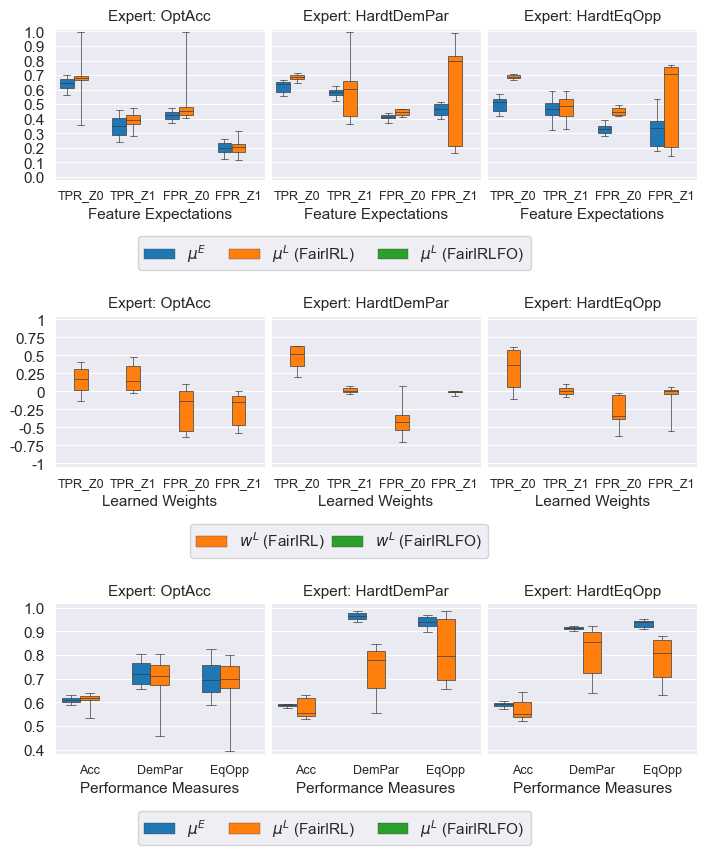

In [290]:
plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
    expert_algos=[
        'OptAcc',
        'HardtDemPar',
        'HardtEqOpp',
    ],
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    perf_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
#     min_mu_value=.25,
#     max_mu_value=1,
#     min_w_value=-1,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    perf_yticks=np.linspace(.4, 1, 7).round(1),
    mu_ylim=(-.02, 1.02),
    perf_ylim=(.38, 1.02),
    mu_whis=[1, 99],
    w_yticks = [-1, -.75, -.5, -.25, 0, .25, .5, .75, 1],
    w_ylim=(-1.05, 1.05),
    w_whis=[5, 95]
)

# Compare results with target domain

KeyError: 'OBJECTIVE_NAMES'

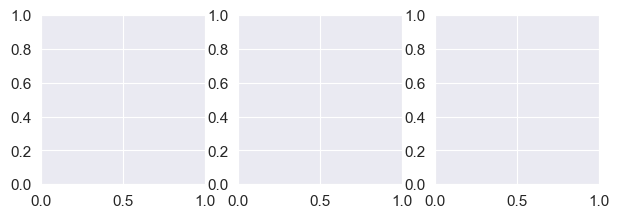

In [746]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=10.5)    # legend fontsize
plt.rc('figure', titlesize=11)  # fontsize of the figure title

mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    source_dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.05,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=.5,
#     mu_yticks=[.6, .7, .8, .9, 1],
    mu_yticks=[.4, .5, .6, .7, .8, .9, 1],
    mu_ylim=(.45, 1.02),
    mu_whis=[5, 95],
)

# Scratch

In [111]:
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
#     'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
#     'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
    'EqOpp',
]

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
df = X_train.copy()
df['y'] = y_train
del X, y
del X_test, y_test


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

wi = [1]
reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

clf_pol = compute_optimal_policy(
    clf_df=df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))


subproblem: EqOpp Split1
reward: -0.0

subproblem: EqOpp Split2
reward: 0.288155
		 muL = [1.]


yhat                  
    count      mean     sum
z y                        
0 0  4622  0.999567  4620.0
  1  4715  0.999152  4711.0
1 0  2661  0.997745  2655.0
  1  1998  0.998999  1996.0

yhat                  
  count      mean     sum
z                        
0  9337  0.999357  9331.0
1  4659  0.998283  4651.0

In [ ]:
x = demo[x_cols+['z']].iloc[0:1]
x

In [418]:
clf_pol.clf.predict(x)

array([0])

In [419]:
clf_pol.pi_df_.query('a != 1')[0:5]

,gender,age_cat,score_text,v_score_text,z,y,a
24,Female,25 - 45,Low,Low,0,0,0.0
26,Female,25 - 45,Low,Low,0,1,0.0
28,Female,25 - 45,Low,Low,1,0,0.0
30,Female,25 - 45,Low,Low,1,1,0.0
32,Female,25 - 45,Low,Medium,0,0,0.0


In [404]:
clf_pol.predict(x)

97

array([1.])

array([1.])

In [313]:
demo.query("""
    gender == 'Male' and \
    age_cat == '25 - 45' and \
    score_text == 'Medium' and \
    v_score_text == 'Medium' \
    and z == 0
""")[['y', 'yhat']]

,y,yhat
4911,0,1.0
14774,0,1.0
5122,0,1.0
16380,1,1.0
10168,1,1.0
...,...,...
14262,0,1.0
4912,0,1.0
8887,0,1.0
8089,1,1.0
